# Cerebro Test Case  ( 20.08.2019 )

**Id:** the primary key of the data <br/>
**trivago_id:** unique id of the hotel <br/>
**hotel_impr:** impression count of the hotel in the specified date <br/>
**avg_cpc:** bid amount of clicks which will be paid for per click <br/>
**booking_value_index:** level of hotness 1 to 5 <br/>
**stars:** how many stars which specified hotel has <br/>
**rating:** user rating score <br/>
**weekday:** the day of the week for the specified date. <br/>
**log_date:** specified date <br/>
**hotel_types:** it indicates that the hotel is near the coast or not. <br/>
**my_min_position:** in which rank OTA's offer is displayed in Trivago. <br/>
**my_price:** OTA's price for the specified hotel. <br/>
**top_4_min_price:** a minimum price which is displayed in the first slot of Trivago. <br/>
**total_min_price:** the minimum price for that hotel. <br/>
**rival1_price:** the most important rival's price in that hotel. <br/>
**rival1_min_position:** the most important rival's offer's position in that hotel. <br/>
**rival2_price:** the second most important rival's price in that hotel. <br/>
**rival2_min_position:** the second most important rival's offer's position in that hotel. <br/>
**profit:** revenue - cost <br/>
**total_night:** how many nights in total the specified hotel got a reservation in the specified date. <br/>
**total_rooms:** how many rooms in total the specified hotel got a reservation in the specified date.  <br/>
**bolge:** the region info for the hotel. <br/>
**holiday_diff:** the day difference to closest holiday. <br/>
**days of holiday:** the duration of the holiday (daily based) <br/>
**status:** it indicates the weather status <br/>
**kur:** it indicates the currency  <br/>
**opp_cpc:** it indicates the amount of avg_cpc which will be got more clicks. <br/>

In [2]:
# Load Libraries 
import pandas as pd
import seaborn as sns

# For visualization
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np

# 1. Data Analysis
- Read Data
- Explore Data
- Visualize Data

## a. Read Data

In [3]:
data = pd.read_excel("click_pred_data.xlsx")
df = data.copy()

In [4]:
df = data.copy()

In [5]:
df.head(5)

Id  trivago_id  hotel_impr  avg_cpc  clicks  booking_value_index  stars  \
0   1     3503572         113     0.06       0                    1      0   
1   2      921561         437     0.06       1                    1      3   
2   3     4928304         613     0.16      23                    4      0   
3   4      112719        4473     0.08      80                    1      4   
4   5     1625365         520     0.11       6                    1      0   

   rating   weekday                 log_date   ...                 profit  \
0   84.90  Thursday  2018-10-11 00:00:00.000   ...                  -1.11   
1   83.53  Thursday  2018-10-11 00:00:00.000   ...                   0.00   
2   78.87  Thursday  2018-10-11 00:00:00.000   ...    1981-11-01 00:00:00   
3   77.85    Sunday  2018-05-20 00:00:00.000   ...                  58.59   
4   74.97    Sunday  2018-06-03 00:00:00.000   ...                  20.67   

        revenue  total_night  total_rooms       bolge  holiday_diff  \
0  0.000000e+00          0.0          0.0  ic_anadolu            18   
1  0.000000e+00          0.0          0.0     marmara            18   
2  3.750000e+09          1.0          1.0     marmara            18   
3  5.920500e+09          2.0          2.0         ege            25   
4  3.425850e+09          1.0          1.0  ic_anadolu            11   

   days_of_holiday                       Status     kur opp_cpc  
0                3  Gök Gürültülü Sağnak Yağmur  6.9211    0.08  
1                3                     Yağmurlu  6.9211    0.17  
2                3                     Yağmurlu  6.9211    0.23  
3                4                      Güneşli  5.4015    0.08  
4                4               ParçalıBulutlu  5.4238    0.16  

[5 rows x 29 columns]

In [6]:
df.iloc[:,10:20 ].head(5)

hotel_types  my_min_position  my_price  top4_min_price  total_min_price  \
0       City               1.0     738.0           615.0              615   
1       City               3.0     490.0           395.0              380   
2       City               1.0     248.0           247.0              247   
3     Summer               2.0     200.0           200.0              200   
4       City               1.0     155.0           155.0              155   

   rival1_price  rival1_min_position  rival2_price  rival2_min_position  \
0         615.0                  2.0         629.0                  4.0   
1         572.0                  4.0         395.0                  1.0   
2         250.0                  2.0         284.0                  4.0   
3           NaN                  NaN         320.0                  4.0   
4         156.0                  2.0           NaN                  NaN   

                profit  
0                -1.11  
1                 0.00  
2  1981-11-01 00:00:00  
3                58.59  
4                20.67

In [7]:
df.shape

(800268, 29)

In [8]:
df.columns

Index(['Id', 'trivago_id', 'hotel_impr', 'avg_cpc', 'clicks',
       'booking_value_index', 'stars', 'rating', 'weekday', 'log_date',
       'hotel_types', 'my_min_position', 'my_price', 'top4_min_price',
       'total_min_price', 'rival1_price', 'rival1_min_position',
       'rival2_price', 'rival2_min_position', 'profit', 'revenue',
       'total_night', 'total_rooms', 'bolge', 'holiday_diff',
       'days_of_holiday', 'Status', 'kur', 'opp_cpc'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=800268, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800268 entries, 0 to 800267
Data columns (total 29 columns):
Id                     800268 non-null int64
trivago_id             800268 non-null int64
hotel_impr             800268 non-null int64
avg_cpc                791218 non-null float64
clicks                 800268 non-null int64
booking_value_index    800268 non-null int64
stars                  800268 non-null int64
rating                 800268 non-null float64
weekday                800268 non-null object
log_date               800268 non-null object
hotel_types            800268 non-null object
my_min_position        701182 non-null float64
my_price               701182 non-null float64
top4_min_price         799746 non-null float64
total_min_price        800268 non-null int64
rival1_price           550570 non-null float64
rival1_min_position    550570 non-null float64
rival2_price           458184 non-null float64
rival2_min_position    458184 non-null float64
profit       

**object** means categoric data. Object should be converted Categoric variable. Because it is faster <br/>
**int -->** discrete numeric <br/>
**float -->** ratio numeric <br/>

## b. Explore Data 

#### Variable Transformation

In [11]:
# object to date
df["log_date"] = pd.to_datetime(df["log_date"])

# object to categorical 
df["weekday"] = pd.Categorical(df["weekday"])
df["log_date"] = pd.Categorical(df["log_date"])
df["hotel_types"] = pd.Categorical(df["hotel_types"])
df["profit"] = pd.Categorical(df["profit"])
df["bolge"] = pd.Categorical(df["bolge"])
df["Status"] = pd.Categorical(df["Status"])

In [12]:
df.dtypes

Id                        int64
trivago_id                int64
hotel_impr                int64
avg_cpc                 float64
clicks                    int64
booking_value_index       int64
stars                     int64
rating                  float64
weekday                category
log_date               category
hotel_types            category
my_min_position         float64
my_price                float64
top4_min_price          float64
total_min_price           int64
rival1_price            float64
rival1_min_position     float64
rival2_price            float64
rival2_min_position     float64
profit                 category
revenue                 float64
total_night             float64
total_rooms             float64
bolge                  category
holiday_diff              int64
days_of_holiday           int64
Status                 category
kur                     float64
opp_cpc                 float64
dtype: object

In [13]:
df.iloc[:,10:20 ].head(20)

hotel_types  my_min_position  my_price  top4_min_price  total_min_price  \
0        City               1.0     738.0           615.0              615   
1        City               3.0     490.0           395.0              380   
2        City               1.0     248.0           247.0              247   
3      Summer               2.0     200.0           200.0              200   
4        City               1.0     155.0           155.0              155   
5      Summer               4.0     247.0           235.0              235   
6        City               3.0     236.0           236.0              236   
7        City               1.0     175.0           175.0              175   
8      Summer               2.0     330.0           334.0              334   
9      Summer               1.0     281.0           186.0              186   
10       City               1.0     270.0           270.0              270   
11       City               1.0     118.0           118.0              118   
12       City               2.0     186.0           186.0              185   
13       City               2.0     500.0           500.0              500   
14       City               2.0     266.0           266.0              266   
15     Summer               NaN       NaN           251.0              251   
16     Summer               2.0     133.0           133.0              133   
17     Summer               2.0     370.0           370.0              362   
18       City               2.0     346.0           346.0              346   
19       City               1.0     440.0           401.0              401   

    rival1_price  rival1_min_position  rival2_price  rival2_min_position  \
0          615.0                  2.0         629.0                  4.0   
1          572.0                  4.0         395.0                  1.0   
2          250.0                  2.0         284.0                  4.0   
3            NaN                  NaN         320.0                  4.0   
4          156.0                  2.0           NaN                  NaN   
5          240.0                  2.0         235.0                  3.0   
6          260.0                  1.0         247.0                  6.0   
7          309.0                  3.0         238.0                  9.0   
8          334.0                  1.0         335.0                  2.0   
9          186.0                  2.0           NaN                  NaN   
10           NaN                  NaN         287.0                  3.0   
11         201.0                  2.0           NaN                  NaN   
12         294.0                  1.0         254.0                  3.0   
13           NaN                  NaN         501.0                  1.0   
14         310.0                  3.0         267.0                  5.0   
15           NaN                  NaN         251.0                  1.0   
16         136.0                  1.0         149.0                  4.0   
17         417.0                  1.0           NaN                  NaN   
18         368.0                  1.0           NaN                  NaN   
19         401.0                  1.0           NaN                  NaN   

                 profit  
0                 -1.11  
1                  0.00  
2   1981-11-01 00:00:00  
3                 58.59  
4                 20.67  
5                  0.00  
6                  0.00  
7                 19.19  
8                  0.00  
9                 -8.40  
10               -14.63  
11                -6.05  
12                -0.25  
13                 0.00  
14                -0.74  
15                -0.62  
16                -6.48  
17                 0.00  
18                -0.25  
19                 0.00

#### Descriptive analysis for numeric variables

In [14]:
df.describe().T

count          mean           std       min  \
Id                   800268.0  4.004625e+05  2.315105e+05     1.000   
trivago_id           800268.0  3.931219e+06  2.963412e+06  9125.000   
hotel_impr           800268.0  7.188083e+02  1.350319e+03     1.000   
avg_cpc              791218.0  5.782388e-02  4.222478e-02     0.000   
clicks               800268.0  1.167355e+01  2.996538e+01     0.000   
booking_value_index  800268.0  2.317096e+00  1.578553e+00     1.000   
stars                800268.0  1.801150e+00  1.927448e+00     0.000   
rating               800268.0  6.106221e+01  3.391331e+01     0.000   
my_min_position      701182.0  2.396314e+00  4.105354e+00     1.000   
my_price             701182.0  2.872465e+02  3.583767e+02     0.000   
top4_min_price       799746.0  3.042543e+02  5.537991e+02     0.000   
total_min_price      800268.0  2.959955e+02  5.320805e+02     0.000   
rival1_price         550570.0  3.784539e+02  6.595392e+02     0.000   
rival1_min_position  550570.0  2.734415e+00  4.615098e+00     1.000   
rival2_price         458184.0  3.072764e+02  3.503403e+02     0.000   
rival2_min_position  458184.0  3.352891e+00  5.691424e+00     1.000   
revenue              771507.0  1.027061e+09  5.978201e+09     0.000   
total_night          771507.0  2.476426e-01  1.242149e+00     0.000   
total_rooms          771507.0  1.738183e-01  8.629811e-01     0.000   
holiday_diff         800268.0  3.182478e+01  2.898352e+01     1.000   
days_of_holiday      800268.0  4.108281e+00  2.053155e+00     2.000   
kur                  663298.0  6.148209e+00  7.500831e-01     4.992   
opp_cpc              787785.0  8.990939e-02  4.947222e-02     0.000   

                              25%           50%          75%           max  
Id                   2.000678e+05  4.001345e+05   600201.250  8.027110e+05  
trivago_id           1.672771e+06  3.160466e+06  5822542.000  1.228660e+07  
hotel_impr           9.700000e+01  2.720000e+02      723.000  2.664500e+04  
avg_cpc              3.000000e-02  5.000000e-02        0.070  2.000000e+00  
clicks               0.000000e+00  2.000000e+00       11.000  1.252000e+03  
booking_value_index  1.000000e+00  2.000000e+00        4.000  5.000000e+00  
stars                0.000000e+00  0.000000e+00        4.000  5.000000e+00  
rating               6.672000e+01  7.832000e+01       82.090  9.617000e+01  
my_min_position      1.000000e+00  2.000000e+00        2.000  1.790000e+02  
my_price             1.650000e+02  2.230000e+02      321.000  5.425200e+04  
top4_min_price       1.640000e+02  2.230000e+02      323.000  3.696500e+04  
total_min_price      1.610000e+02  2.200000e+02      317.000  3.689800e+04  
rival1_price         1.980000e+02  2.730000e+02      393.000  3.924300e+04  
rival1_min_position  1.000000e+00  2.000000e+00        3.000  1.840000e+02  
rival2_price         1.790000e+02  2.420000e+02      345.000  3.688000e+04  
rival2_min_position  1.000000e+00  2.000000e+00        3.000  1.640000e+02  
revenue              0.000000e+00  0.000000e+00        0.000  3.595593e+11  
total_night          0.000000e+00  0.000000e+00        0.000  6.400000e+01  
total_rooms          0.000000e+00  0.000000e+00        0.000  4.200000e+01  
holiday_diff         1.000000e+01  2.300000e+01       44.000  1.120000e+02  
days_of_holiday      3.000000e+00  4.000000e+00        4.000  9.000000e+00  
kur                  5.478300e+00  6.066600e+00        6.799  7.860400e+00  
opp_cpc              6.000000e-02  8.000000e-02        0.100  9.200000e-01

####  Descriptive analysis for categorical variables

In [15]:
df.groupby("weekday").aggregate({"clicks":"mean","revenue":"sum","holiday_diff":"mean"}).sort_values(by = "clicks",ascending = False)

clicks       revenue  holiday_diff
weekday                                         
Thursday   12.286176  1.252479e+14     32.487729
Wednesday  12.200963  1.128863e+14     31.506833
Friday     12.108239  1.235768e+14     30.627688
Monday     11.774177  9.346988e+13     31.617264
Tuesday    11.408569  1.103799e+14     33.764128
Saturday   10.930630  1.188363e+14     31.697682
Sunday     10.896520  1.079876e+14     31.015298

In [56]:
df.groupby("log_date").aggregate({"clicks":"count","booking_value_index":"mean","revenue":"sum"}).sort_values(by = ["log_date","clicks"],ascending = False)

clicks  booking_value_index       revenue
log_date                                             
2019-01-31    3265             2.171516  3.195193e+12
2019-01-30    3487             2.120447  2.834815e+12
2019-01-29    3501             2.120823  2.783067e+12
2019-01-28    3548             2.120631  2.634578e+12
2019-01-27    3566             2.110208  4.053659e+12
2019-01-26    3479             2.118425  3.533618e+12
2019-01-25    3591             2.142579  3.900109e+12
2019-01-24    3471             2.133967  3.483458e+12
2019-01-23    3353             2.133015  2.926332e+12
2019-01-22    3427             2.130143  2.508642e+12
2019-01-21    3465             2.133045  2.624216e+12
2019-01-20    3476             2.140967  3.719774e+12
2019-01-19    3384             2.130615  3.930680e+12
2019-01-18    3184             2.015704  3.109203e+12
2019-01-17    3279             1.958219  3.028968e+12
2019-01-16    3095             1.979645  3.310961e+12
2019-01-15    3190             1.989655  3.096667e+12
2019-01-14    3038             2.003292  2.586976e+12
2019-01-13    3156             1.986375  2.556676e+12
2019-01-12    3152             1.980964  3.068159e+12
2019-01-11    3181             2.024206  2.734193e+12
2019-01-10    2680             1.984328  2.275262e+12
2019-01-09    2919             2.065433  2.447324e+12
2019-01-08    3014             2.069011  2.965254e+12
2019-01-07    3108             2.045367  2.363100e+12
2019-01-06    3109             2.053715  3.088235e+12
2019-01-05    2551             2.091729  3.262121e+12
2019-01-04    2801             1.927526  2.276826e+12
2019-01-03    2969             1.936679  2.752304e+12
2019-01-02    3048             1.952756  2.332440e+12
...            ...                  ...           ...
2018-06-01    2958             2.554429  3.331741e+12
2018-05-31    3091             2.508250  2.856390e+12
2018-05-30     723             2.399723  4.174434e+11
2018-05-29    2944             2.556046  2.902562e+12
2018-05-28    3261             2.490034  1.791042e+12
2018-05-27    3275             2.516031  2.230288e+12
2018-05-26    2739             2.531946  2.262206e+12
2018-05-25    2659             2.200827  2.079895e+12
2018-05-24    3294             2.189435  2.085620e+12
2018-05-23    3326             2.189717  2.297898e+12
2018-05-22    3364             2.166766  2.446404e+12
2018-05-21    3312             2.177838  1.379842e+12
2018-05-20    3022             2.169093  1.735741e+12
2018-05-19    3017             2.195227  1.998800e+12
2018-05-18    3165             2.353239  2.022889e+12
2018-05-17    3280             2.364634  1.700296e+12
2018-05-16    3191             2.348793  1.689135e+12
2018-05-15    3181             2.339830  2.193752e+12
2018-05-14    3086             2.354828  1.788345e+12
2018-05-13    3104             2.347294  2.161766e+12
2018-05-12    2347             2.372816  2.002981e+12
2018-05-11    2616             2.287080  2.090979e+12
2018-05-10    2251             2.225677  1.754288e+12
2018-05-09    2729             2.232320  2.561561e+12
2018-05-08    2425             2.256082  2.159297e+12
2018-05-07    2772             2.325758  1.662971e+12
2018-05-06    2929             2.296005  2.460593e+12
2018-05-04    2543             2.367676  2.331587e+12
2018-05-03    2440             2.422131  2.403163e+12
2018-05-02    2660             2.404511  1.928363e+12

[268 rows x 3 columns]

In [49]:
df.groupby("hotel_types").aggregate({"clicks":"count","booking_value_index":"mean","rating":"mean","my_price":"mean"}).sort_values(by = "clicks",ascending = False)

clicks  booking_value_index     rating    my_price
hotel_types                                                    
City         541296             2.461400  61.660106  281.072296
Summer       234007             1.975454  62.591412  301.508201
Summer        24965             2.390627  33.764619  306.738889

**<font color=red>Warning ! hotel_types has  redundant Summer value</font>**

In [51]:
df.groupby("profit").count()#aggregate({"clicks":"count","booking_value_index":"mean","rating":"mean","my_price":"mean"}).sort_values(by = "clicks",ascending = False)

Id  trivago_id  hotel_impr  avg_cpc  clicks  \
profit                                                             
1930-02-01 00:00:00   4           4           4        4       4   
1930-03-01 00:00:00   4           4           4        4       4   
1930-04-01 00:00:00   5           5           5        5       5   
1930-05-01 00:00:00   5           5           5        5       5   
1930-06-01 00:00:00   3           3           3        3       3   
1930-07-01 00:00:00   7           7           7        7       7   
1930-08-01 00:00:00   4           4           4        4       4   
1930-09-01 00:00:00   5           5           5        5       5   
1930-10-01 00:00:00   2           2           2        2       2   
1930-11-01 00:00:00  14          14          14       14      14   
1930-12-01 00:00:00   8           8           8        8       8   
1931-01-01 00:00:00   4           4           4        4       4   
1931-02-01 00:00:00   5           5           5        5       5   
1931-03-01 00:00:00   5           5           5        5       5   
1931-04-01 00:00:00   7           7           7        7       7   
1931-05-01 00:00:00   4           4           4        4       4   
1931-06-01 00:00:00   3           3           3        3       3   
1931-07-01 00:00:00   6           6           6        6       6   
1931-08-01 00:00:00   8           8           8        8       8   
1931-09-01 00:00:00   5           5           5        5       5   
1931-10-01 00:00:00   3           3           3        3       3   
1931-11-01 00:00:00   5           5           5        5       5   
1931-12-01 00:00:00  13          13          13       13      13   
1932-01-01 00:00:00   3           3           3        3       3   
1932-02-01 00:00:00   4           4           4        4       4   
1932-03-01 00:00:00   3           3           3        3       3   
1932-04-01 00:00:00   3           3           3        3       3   
1932-05-01 00:00:00   6           6           6        6       6   
1932-06-01 00:00:00   2           2           2        2       2   
1932-07-01 00:00:00   4           4           4        4       4   
...                  ..         ...         ...      ...     ...   
99.66                 3           3           3        3       3   
99.67                 2           2           2        2       2   
99.68                 3           3           3        3       3   
99.69                 1           1           1        1       1   
99.70                 1           1           1        1       1   
99.71                 3           3           3        3       3   
99.74                 1           1           1        1       1   
99.75                 1           1           1        1       1   
99.76                 3           3           3        3       3   
99.77                 5           5           5        5       5   
99.78                 1           1           1        1       1   
99.79                 2           2           2        2       2   
99.80                 3           3           3        3       3   
99.81                 2           2           2        2       2   
99.82                 1           1           1        1       1   
99.83                 1           1           1        1       1   
99.84                 2           2           2        2       2   
99.85                 3           3           3        3       3   
99.86                 3           3           3        3       3   
99.87                 2           2           2        2       2   
99.88                 2           2           2        2       2   
99.92                 2           2           2        2       2   
99.97                 4           4           4        4       4   
99.98                 2           2           2        2       2   
99.99                 2           2           2        2       2   
995.68                1           1           1        1       1   
996.04   

**<font color=red>Warning ! profit has data issue. Has date and numeric values</font>**

In [53]:
df.groupby("bolge").mean()#aggregate({"hotel_impr":"mean","click":"mean","booking_value_index":"mean","my_price":"mean","revenue":"revenue"}).sort_values(by = "clicks",ascending = False)

Id    trivago_id   hotel_impr   avg_cpc  \
bolge                                                                   
Marmara            381388.148925  3.829058e+06   769.922542  0.055297   
akdeniz            383742.910142  3.334518e+06  1134.389864  0.047182   
dogu_anadolu       438383.354009  4.447009e+06   172.538970  0.055075   
ege                383750.237185  3.818742e+06  1092.808287  0.047562   
guneydogu_anadolu  421475.480085  3.685642e+06   312.870287  0.063914   
ic_anadolu         409597.184777  3.913212e+06   565.523158  0.062512   
karadeniz          416347.568871  5.114163e+06   341.508844  0.048841   
marmara            410121.618132  3.948900e+06   519.626461  0.069728   

                      clicks  booking_value_index     stars     rating  \
bolge                                                                    
Marmara            14.250484             2.691467  2.081911  65.275811   
akdeniz            12.879134             1.822683  1.861829  63.790270   
dogu_anadolu        7.056724             2.125616  2.311014  46.460206   
ege                12.697827             2.098944  1.540286  60.109594   
guneydogu_anadolu   7.955109             2.205071  2.303811  58.083199   
ic_anadolu         11.511856             2.330039  1.919653  63.401821   
karadeniz           9.197605             1.720779  1.329266  47.008629   
marmara            11.328996             2.782250  1.900573  63.808843   

                   my_min_position    my_price    ...     rival1_min_position  \
bolge                                             ...                           
Marmara                   2.759525  341.202442    ...                2.701094   
akdeniz                   2.353636  262.874860    ...                2.709085   
dogu_anadolu              1.637635  196.559908    ...                2.323197   
ege                       2.411367  289.342169    ...                2.524766   
guneydogu_anadolu         1.801457  208.954508    ...                2.609709   
ic_anadolu                2.123494  240.450987    ...                2.566328   
karadeniz                 1.810652  249.816771    ...                2.472431   
marmara                   2.692559  324.707669    ...                3.010499   

                   rival2_price  rival2_min_position       revenue  \
bolge                                                                
Marmara              366.309699             4.400719  1.501224e+09   
akdeniz              294.369420             2.634493  7.363543e+08   
dogu_anadolu         217.085433             2.088755  5.103645e+08   
ege                  303.140650             2.670688  8.797896e+08   
guneydogu_anadolu    229.544410             2.557737  6.515895e+08   
ic_anadolu           268.127917             3.005632  9.556619e+08   
karadeniz            259.112047             2.333665  4.718444e+08   
marmara              348.970644             4.570241  1.400341e+09   

                   total_night  total_rooms  holiday_diff  days_of_holiday  \
bolge                                                                        
Marmara               0.322087     0.214454     26.661175         4.695082   
akdeniz               0.158220     0.088607     29.789479         4.062031   
dogu_anadolu          0.146370     0.105474     35.106521         4.147395   
ege                   0.199682     0.118962     30.658084         4.028998   
guneydogu_anadolu     0.192483     0.155215     33.813351         4.200769   
ic_anadolu            0.298627     0.227890     33.129126         4.121767   
karadeniz             0.119095     0.092645     33.228865         4.117141   
marmara               0.330687     0.246306     33.209095         4.049557   

                        kur   opp_cpc  
bolge                                  
Marmara            6.732241  0.088066  
akdeniz            6.095006  0.077295  
dogu_anadolu       6.121296  0.083212  
ege                6.079110  0.080364  
guneydogu_anadolu  6.1391

In [62]:
df.groupby("bolge").aggregate({"hotel_impr":"mean","clicks":"mean","booking_value_index":"mean","my_price":"mean","revenue":"sum"}).sort_values(by = "clicks",ascending = False)

hotel_impr     clicks  booking_value_index    my_price  \
bolge                                                                        
Marmara             769.922542  14.250484             2.691467  341.202442   
akdeniz            1134.389864  12.879134             1.822683  262.874860   
ege                1092.808287  12.697827             2.098944  289.342169   
ic_anadolu          565.523158  11.511856             2.330039  240.450987   
marmara             519.626461  11.328996             2.782250  324.707669   
karadeniz           341.508844   9.197605             1.720779  249.816771   
guneydogu_anadolu   312.870287   7.955109             2.205071  208.954508   
dogu_anadolu        172.538970   7.056724             2.125616  196.559908   

                        revenue  
bolge                            
Marmara            7.017020e+13  
akdeniz            8.377650e+13  
ege                1.374390e+14  
ic_anadolu         8.928845e+13  
marmara            3.577297e+14  
karadeniz          3.368025e+13  
guneydogu_anadolu  1.241343e+13  
dogu_anadolu       7.887173e+12

**<font color=red>Warning ! bolge name has data issue. Has redundant marmara value and text typing error</font>**

In [63]:
# df["Status"] = pd.Categorical(df["Status"])
df.groupby("Status").aggregate({"clicks":"mean","revenue":"mean","my_price":"mean"}).sort_values(by = "clicks",ascending = False)

clicks       revenue    my_price
Status                                                                 
ParçalıGüneşliSağanakYağış          19.797395  1.380462e+09  307.107760
AzBulutlu                           18.270742  1.131412e+09  293.918960
GökGürültülüSağnakYağmur            17.180491  1.222539e+09  312.098653
Bulutlu                             16.968855  9.937569e+08  296.406827
Güneşli                             15.576036  1.088708e+09  306.779964
YoğunBulutlu                        15.386364  1.560170e+08  228.300000
ÇoğunluklaBulutluSağanakYağışlı     15.203390  5.738996e+08  221.792746
ParçalıBulutlu                      14.338228  1.062402e+09  282.626229
ÇoğunluklaBulutlu                   11.566430  1.137726e+09  291.618553
SağanakYağış                        11.212662  4.831353e+08  265.286242
Kar Yağışlı                         11.120651  1.281829e+09  268.119357
Yağmurlu                            10.819204  1.069503e+09  277.846789
Gök Gürültülü Sağnak Yağmur         10.433140  1.006803e+09  325.909645
Sisli                               10.240384  1.209363e+09  262.107409
Parçalı Güneşli Sağanak Yağış        9.370635  1.040960e+09  291.179184
Karla Karışık Yağmur                 9.275197  1.222624e+09  273.579581
Çoğunlukla Bulutlu                   8.255302  1.015001e+09  272.612400
Parçalı Bulutlu                      8.145722  9.068527e+08  294.567049
Az Bulutlu                           8.126795  8.619494e+08  280.551842
Sağanak Yağış                        7.384180  7.769077e+08  258.279350
Çoğunlukla Bulutlu Kar Yağışlı       6.807843  4.514841e+08  204.367769
Çoğunlukla Bulutlu Sağanak Yağışlı   6.084874  7.743972e+08  258.331616
Parçalı Güneşli Kar Fırtınası        5.575342  4.546556e+08  247.817416
Yoğun Bulutlu                        5.067818  4.702374e+08  233.711631
Rüzgarlı                             5.015564  2.283751e+08  223.914414
Yoğun Soğuk                          4.164179  4.091706e+08  203.030303
Yoğun Kar Fırtınası                  3.969905  3.037641e+08  229.063111
Ara Ara Dolu Yağışı                  3.532609  3.034595e+08  217.000000
Buzlanma                             0.750000  0.000000e+00  168.000000

In [64]:
df.groupby(["Status","bolge"]).aggregate({"clicks":"mean","revenue":"mean","my_price":"mean"}).sort_values(by = "clicks",ascending = False)

clicks       revenue  \
Status                             bolge                                        
Sisli                              Marmara            57.315315  4.231860e+09   
SağanakYağış                       akdeniz            29.017699  1.873511e+09   
AzBulutlu                          ege                24.413484  1.360882e+09   
                                   akdeniz            23.339997  1.024290e+09   
GökGürültülüSağnakYağmur           akdeniz            22.863010  1.160813e+09   
ParçalıGüneşliSağanakYağış         ege                22.558216  1.432274e+09   
Bulutlu                            ege                22.266824  1.198251e+09   
GökGürültülüSağnakYağmur           ege                21.206558  1.250355e+09   
ParçalıGüneşliSağanakYağış         Marmara            21.065104  1.323222e+09   
SağanakYağış                       Marmara            21.041667  1.114350e+08   
Bulutlu                            akdeniz            20.961838  8.787024e+08   
ParçalıGüneşliSağanakYağış         akdeniz            20.228261  2.884091e+08   
Güneşli                            ege                19.129719  1.350812e+09   
Sisli                              karadeniz          18.708621  1.339891e+09   
ParçalıGüneşliSağanakYağış         karadeniz          17.856275  1.048286e+09   
ParçalıBulutlu                     akdeniz            17.685000  8.045121e+08   
Güneşli                            akdeniz            17.373256  1.045855e+09   
ÇoğunluklaBulutluSağanakYağışlı    karadeniz          17.299465  5.892130e+08   
YoğunBulutlu                       karadeniz          16.794872  1.760192e+08   
GökGürültülüSağnakYağmur           Marmara            16.750704  1.517474e+09   
ParçalıGüneşliSağanakYağış         marmara            16.713520  1.416745e+09   
                                   ic_anadolu         16.686275  2.096278e+09   
ParçalıBulutlu                     Marmara            16.598187  1.730484e+09   
AzBulutlu                          karadeniz          16.438695  5.691949e+08   
                                   marmara            16.152820  1.447971e+09   
Kar Yağışlı                        karadeniz          16.133886  1.819992e+09   
GökGürültülüSağnakYağmur           marmara            16.114187  1.560402e+09   
AzBulutlu                          Marmara            16.075546  1.429837e+09   
Güneşli                            marmara            15.133836  1.478480e+09   
Parçalı Güneşli Kar Fırtınası      Marmara            15.000000  0.000000e+00   
...                                                         ...           ...   
Çoğunlukla Bulutlu Kar Yağışlı     marmara             4.421053  9.993917e+08   
YoğunBulutlu                       marmara             4.400000  0.000000e+00   
Yoğun Bulutlu                      akdeniz             4.000000  0.000000e+00   
Yoğun Soğuk                        ege                 3.935484  3.531034e+07   
ParçalıGüneşliSağanakYağış         dogu_anadolu        3.857143  6.000000e+08   
Yoğun Bulutlu                      karadeniz           3.835196  1.636262e+08   
Yoğun Kar Fırtınası                dogu_anadolu        3.730088  3.267648e+08   
Ara Ara Dolu Yağışı                ege                 3.576923  1.842938e+08   
Parçalı Güneşli Kar Fırtınası      dogu_anadolu        3.257143  1.246029e+08   
SağanakYağış                       dogu_anadolu        3.245283  0.000000e+00   
Yoğun Bulutlu                      dogu_anadolu        3.202703  6.179783e+08   
Buzlanma                           marmara             3.000000  0.000000e+00   
Yoğun Kar Fırtınası                karadeniz           2.962138  1.595710e+08   
                                   akdeniz             2.800000  0.000000e+00   
                                   guneydogu_anadolu   2.750000  0.000000e+00   
Çoğunlukla Bulutlu Sağanak Yağışlı guneydogu_anadolu   2.590909  5.780714e+08   
Ara Ara Dolu Yağışı                ic_anadolu          2.000000  0.000000e+00   
Yoğun S

In [40]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

### Null Values Check

In [41]:
# Is there any null values or not ?
df.isnull().values.any()

True

In [43]:
# how many null value for each variable
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [45]:
df["orbital_period"].fillna(0,inplace=True)

In [46]:
df.isnull().any()

method            False
number            False
orbital_period    False
mass               True
distance           True
year              False
dtype: bool

In [51]:
import numpy as np

df["distance"].fillna(np.mean(df.distance),inplace=True)
df["mass"].fillna(np.mean(df.mass),inplace=True)

In [52]:
df.isnull().any()

method            False
number            False
orbital_period    False
mass              False
distance          False
year              False
dtype: bool

## c. Visualization

### Categorical Variables

In [72]:
# Let's get categorical variables with cat_df table
cat_df =df.select_dtypes(include= ["category"])
cat_df.head(5)

weekday   log_date hotel_types               profit       bolge  \
0  Thursday 2018-10-11       City                 -1.11  ic_anadolu   
1  Thursday 2018-10-11       City                  0.00     marmara   
2  Thursday 2018-10-11       City   1981-11-01 00:00:00     marmara   
3    Sunday 2018-05-20     Summer                 58.59         ege   
4    Sunday 2018-06-03       City                 20.67  ic_anadolu   

                        Status  
0  Gök Gürültülü Sağnak Yağmur  
1                     Yağmurlu  
2                     Yağmurlu  
3                      Güneşli  
4               ParçalıBulutlu

##### Weekday

In [73]:
cat_df["weekday"].unique()

[Thursday, Sunday, Wednesday, Tuesday, Saturday, Monday, Friday]
Categories (7, object): [Thursday, Sunday, Wednesday, Tuesday, Saturday, Monday, Friday]

In [74]:
cat_df["weekday"].nunique()

7

In [75]:
cat_df["weekday"].value_counts()

Thursday     120321
Wednesday    117295
Monday       115905
Tuesday      114808
Friday       113499
Sunday       113481
Saturday     104959
Name: weekday, dtype: int64

<Figure size 800x800 with 0 Axes>

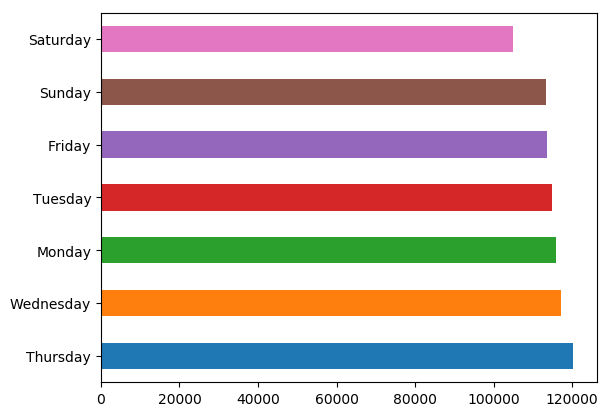

<Figure size 800x800 with 0 Axes>

In [78]:
# Frequency of each observation
cat_df["weekday"].value_counts().plot.barh()
plt.figure(figsize=(8,8))

##### log_date

In [80]:
cat_df["log_date"].unique()

[2018-10-11, 2018-05-20, 2018-06-03, 2018-06-07, 2018-10-24, ..., 2019-01-27, 2019-01-28, 2019-01-29, 2019-01-30, 2019-01-31]
Length: 268
Categories (268, datetime64[ns]): [2018-10-11, 2018-05-20, 2018-06-03, 2018-06-07, ..., 2019-01-28, 2019-01-29, 2019-01-30, 2019-01-31]

In [81]:
cat_df["log_date"].nunique()

268

In [116]:
log_date_df = pd.DataFrame(cat_df["log_date"].value_counts())
log_date_df = log_date_df.reset_index()
log_date_df = log_date_df.sort_values(by = ["index"],ascending = True)

log_date_ts = log_date_df.set_index('index')
log_date_ts.head()

log_date
index               
2018-05-02      2660
2018-05-03      2440
2018-05-04      2543
2018-05-06      2929
2018-05-07      2772

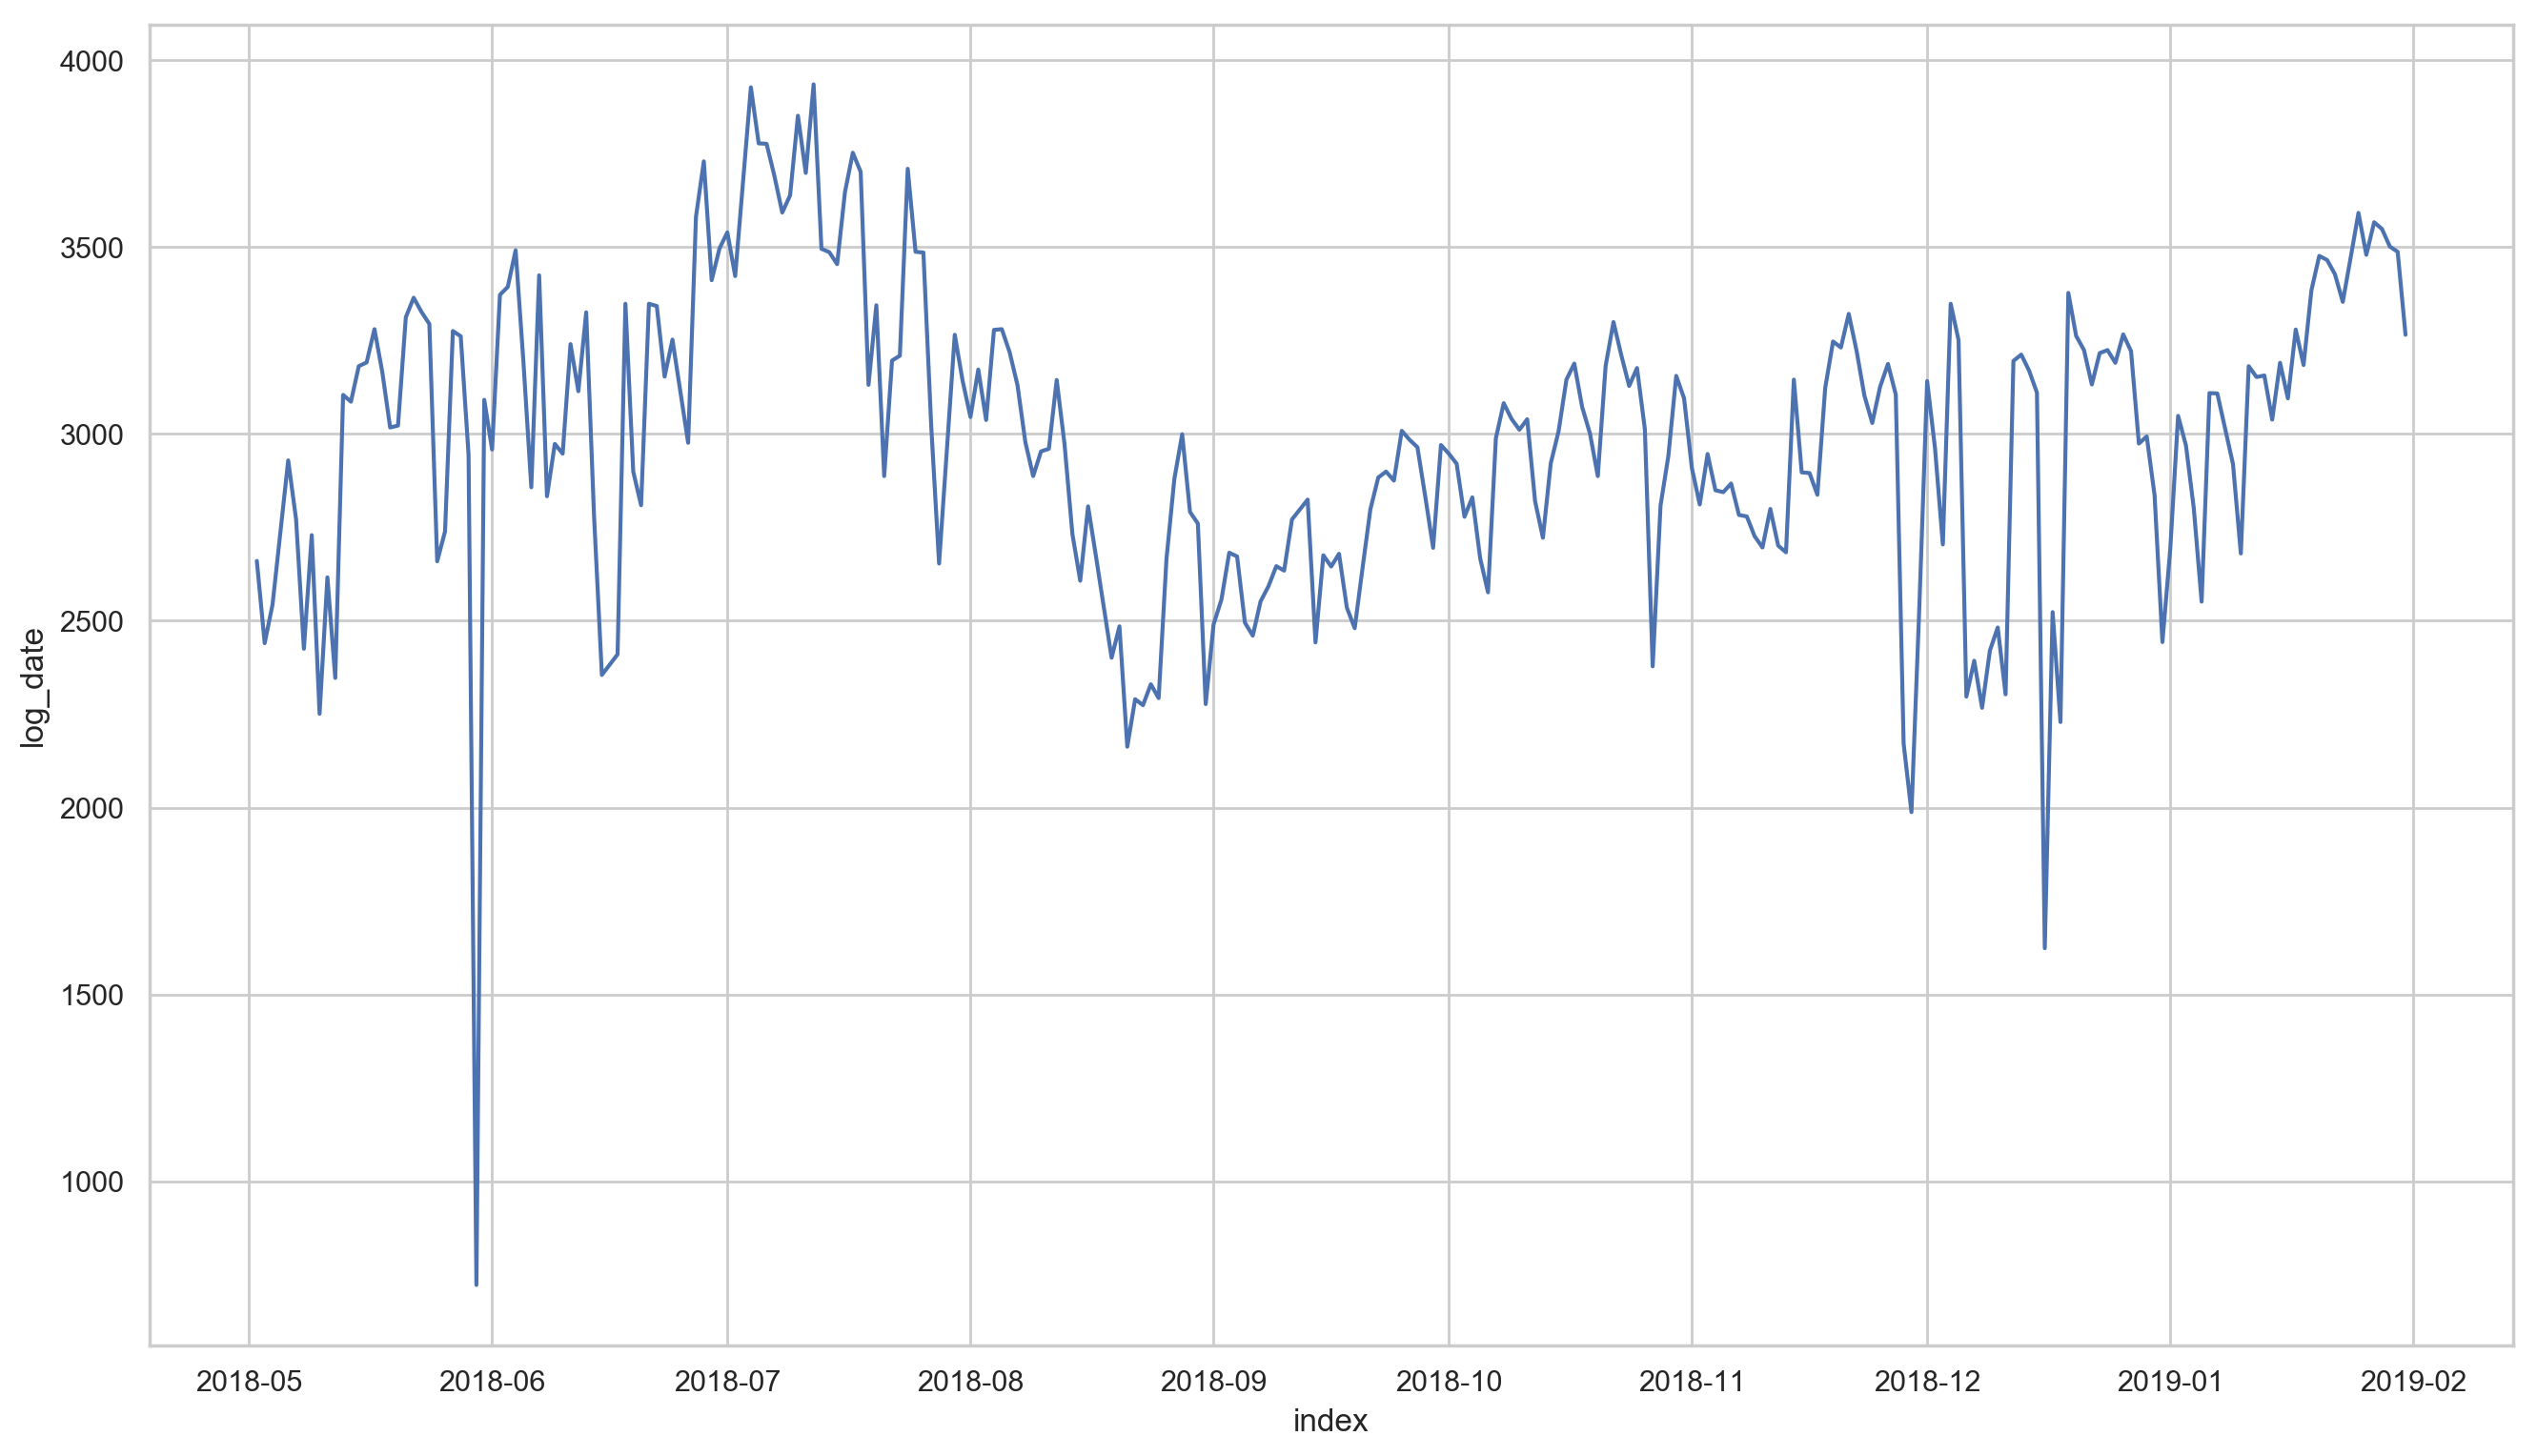

In [120]:
%config InlineBackend.figure_format = "retina"  # grafik görüntüsünü netleştirri
import seaborn as sns

sns.set_context("poster")  # set_context : poster,paper gibi parametreler alır.
sns.set(rc={"figure.figsize": (16,9.)})
sns.set_style("whitegrid")

sns.lineplot(x=log_date_ts.index,y="log_date", data= log_date_ts)

##### hotel_types

In [122]:
cat_df["hotel_types"].unique()

[City, Summer, Summer]
Categories (3, object): [City, Summer, Summer]

In [123]:
cat_df["hotel_types"].nunique()

3

<Figure size 100x100 with 0 Axes>

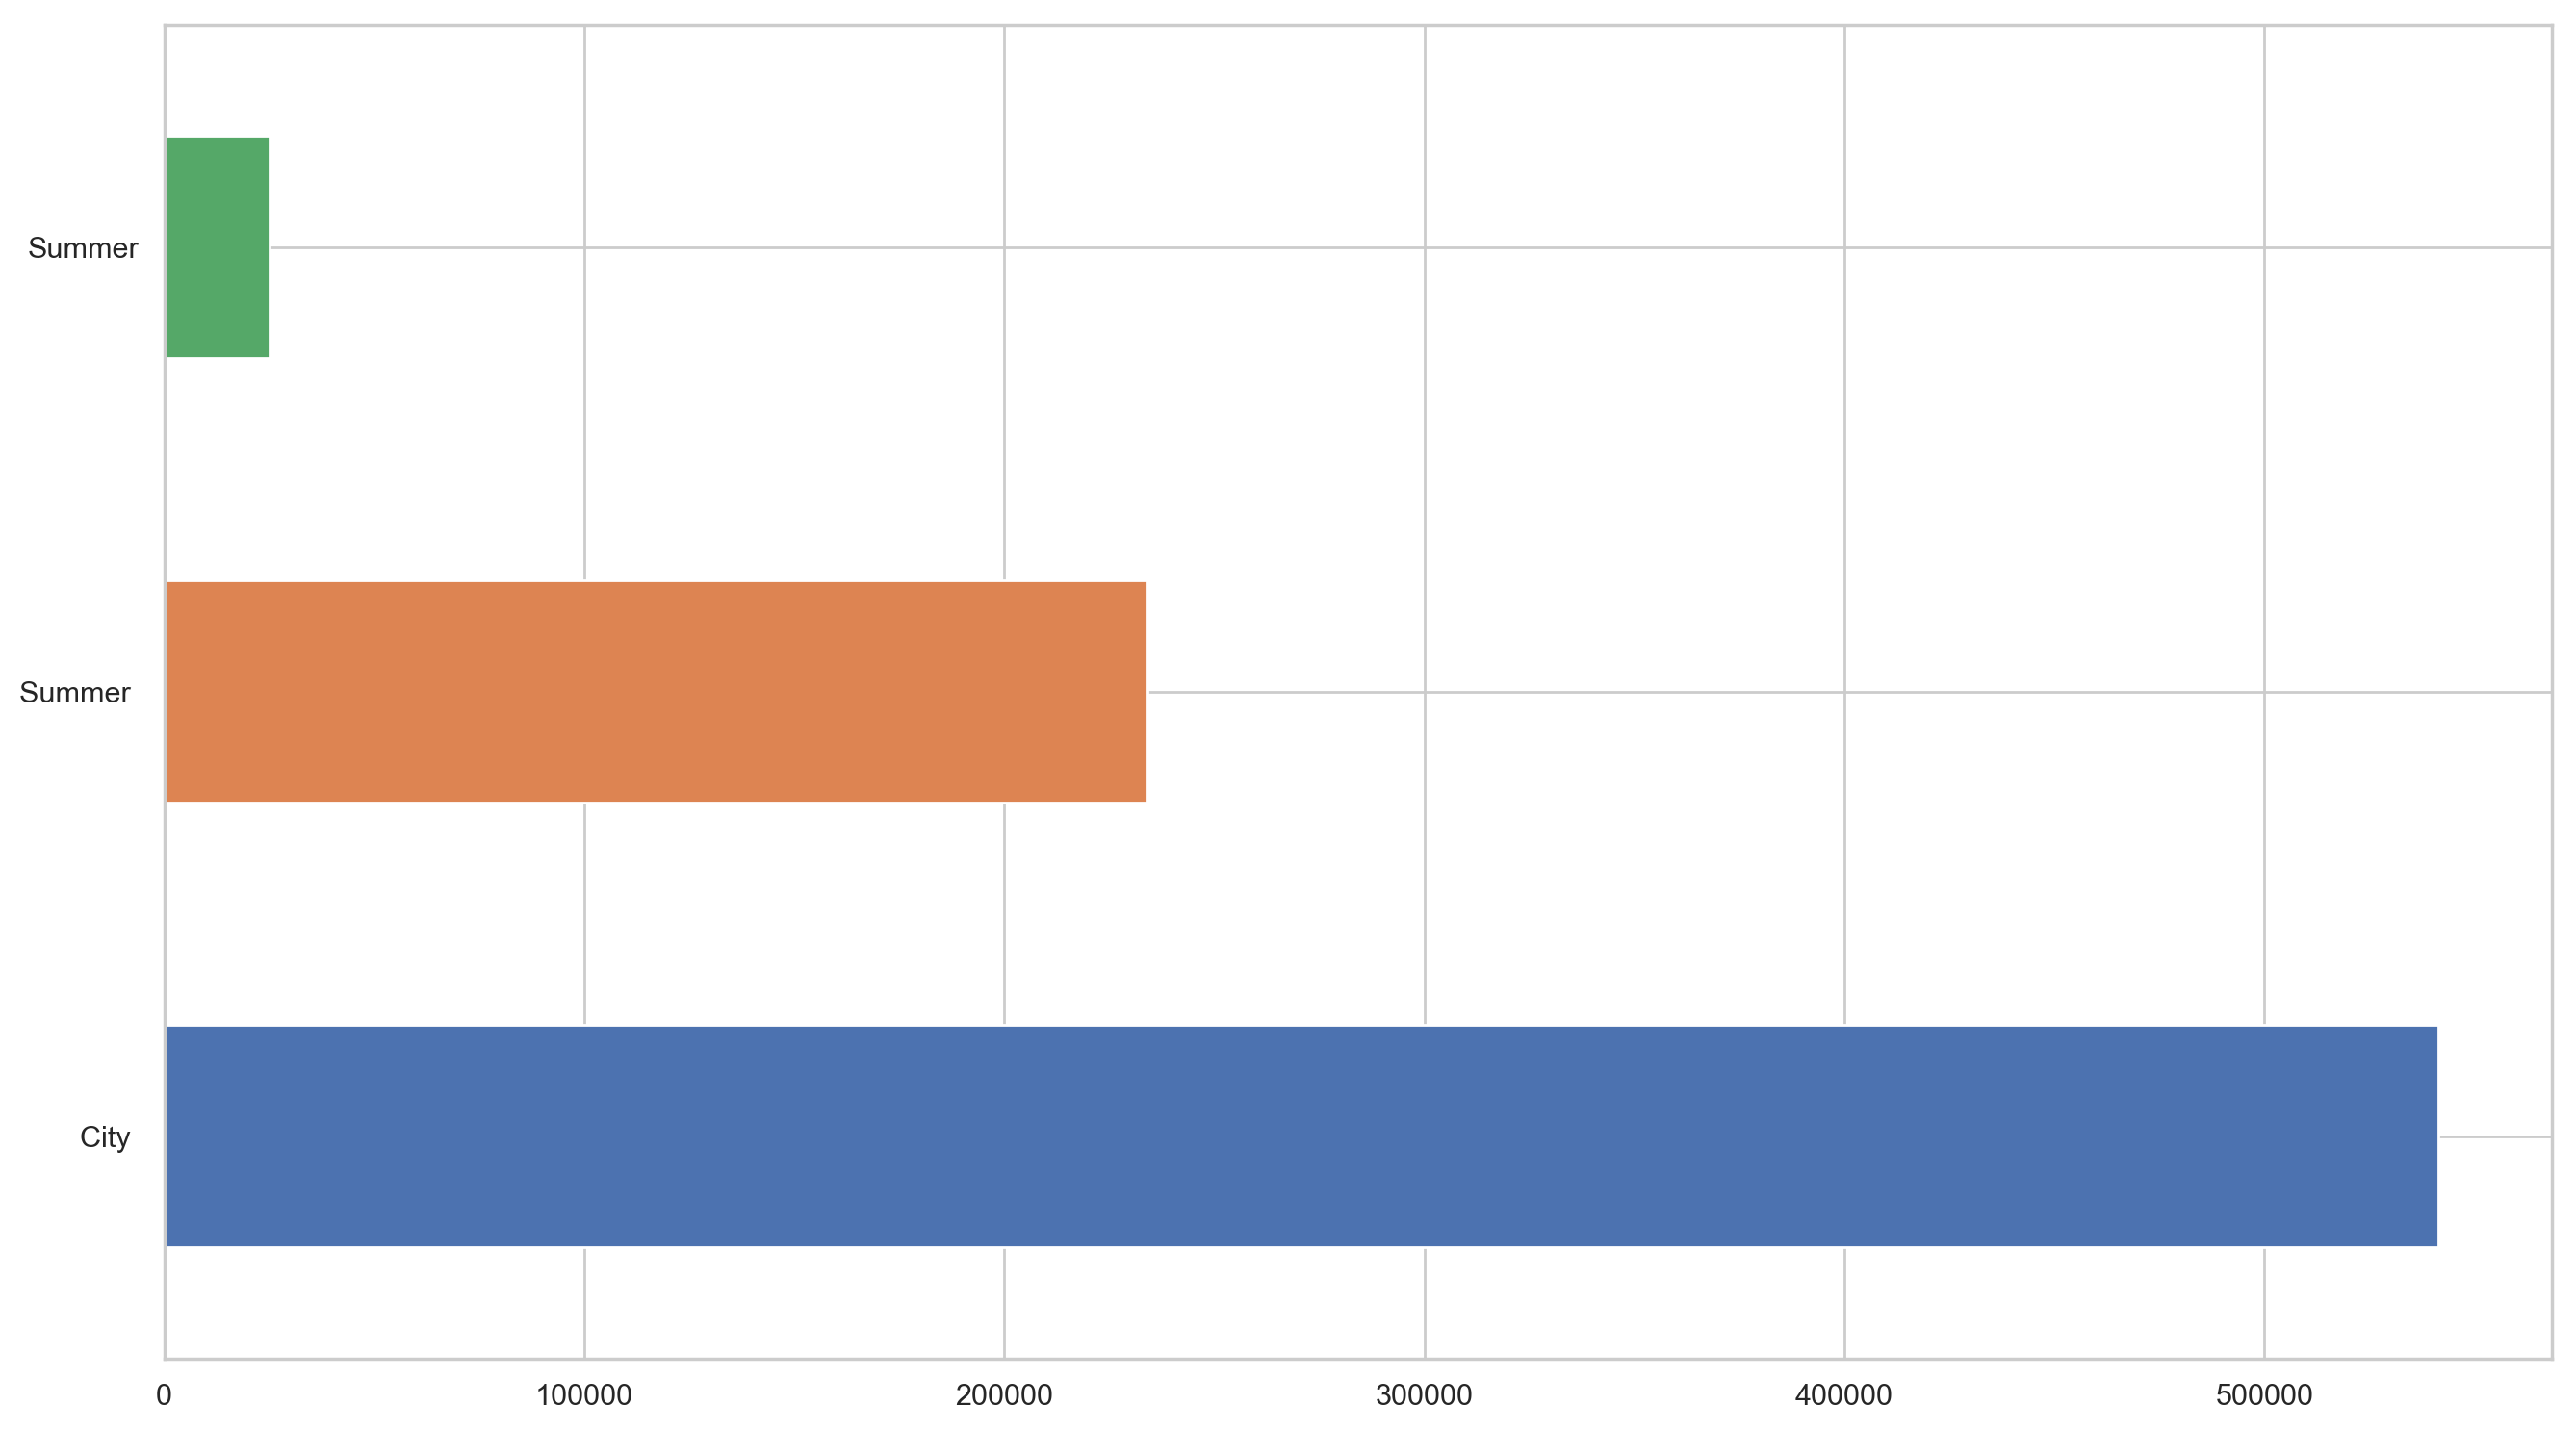

<Figure size 100x100 with 0 Axes>

In [128]:
# Frequency of each observation
cat_df["hotel_types"].value_counts().plot.barh()
plt.figure(figsize=(1,1))

##### bolge

In [130]:
cat_df["bolge"].unique()

[ic_anadolu, marmara, ege, karadeniz, guneydogu_anadolu, akdeniz, dogu_anadolu, Marmara]
Categories (8, object): [ic_anadolu, marmara, ege, karadeniz, guneydogu_anadolu, akdeniz, dogu_anadolu, Marmara]

In [131]:
cat_df["bolge"].nunique()

8

<Figure size 800x800 with 0 Axes>

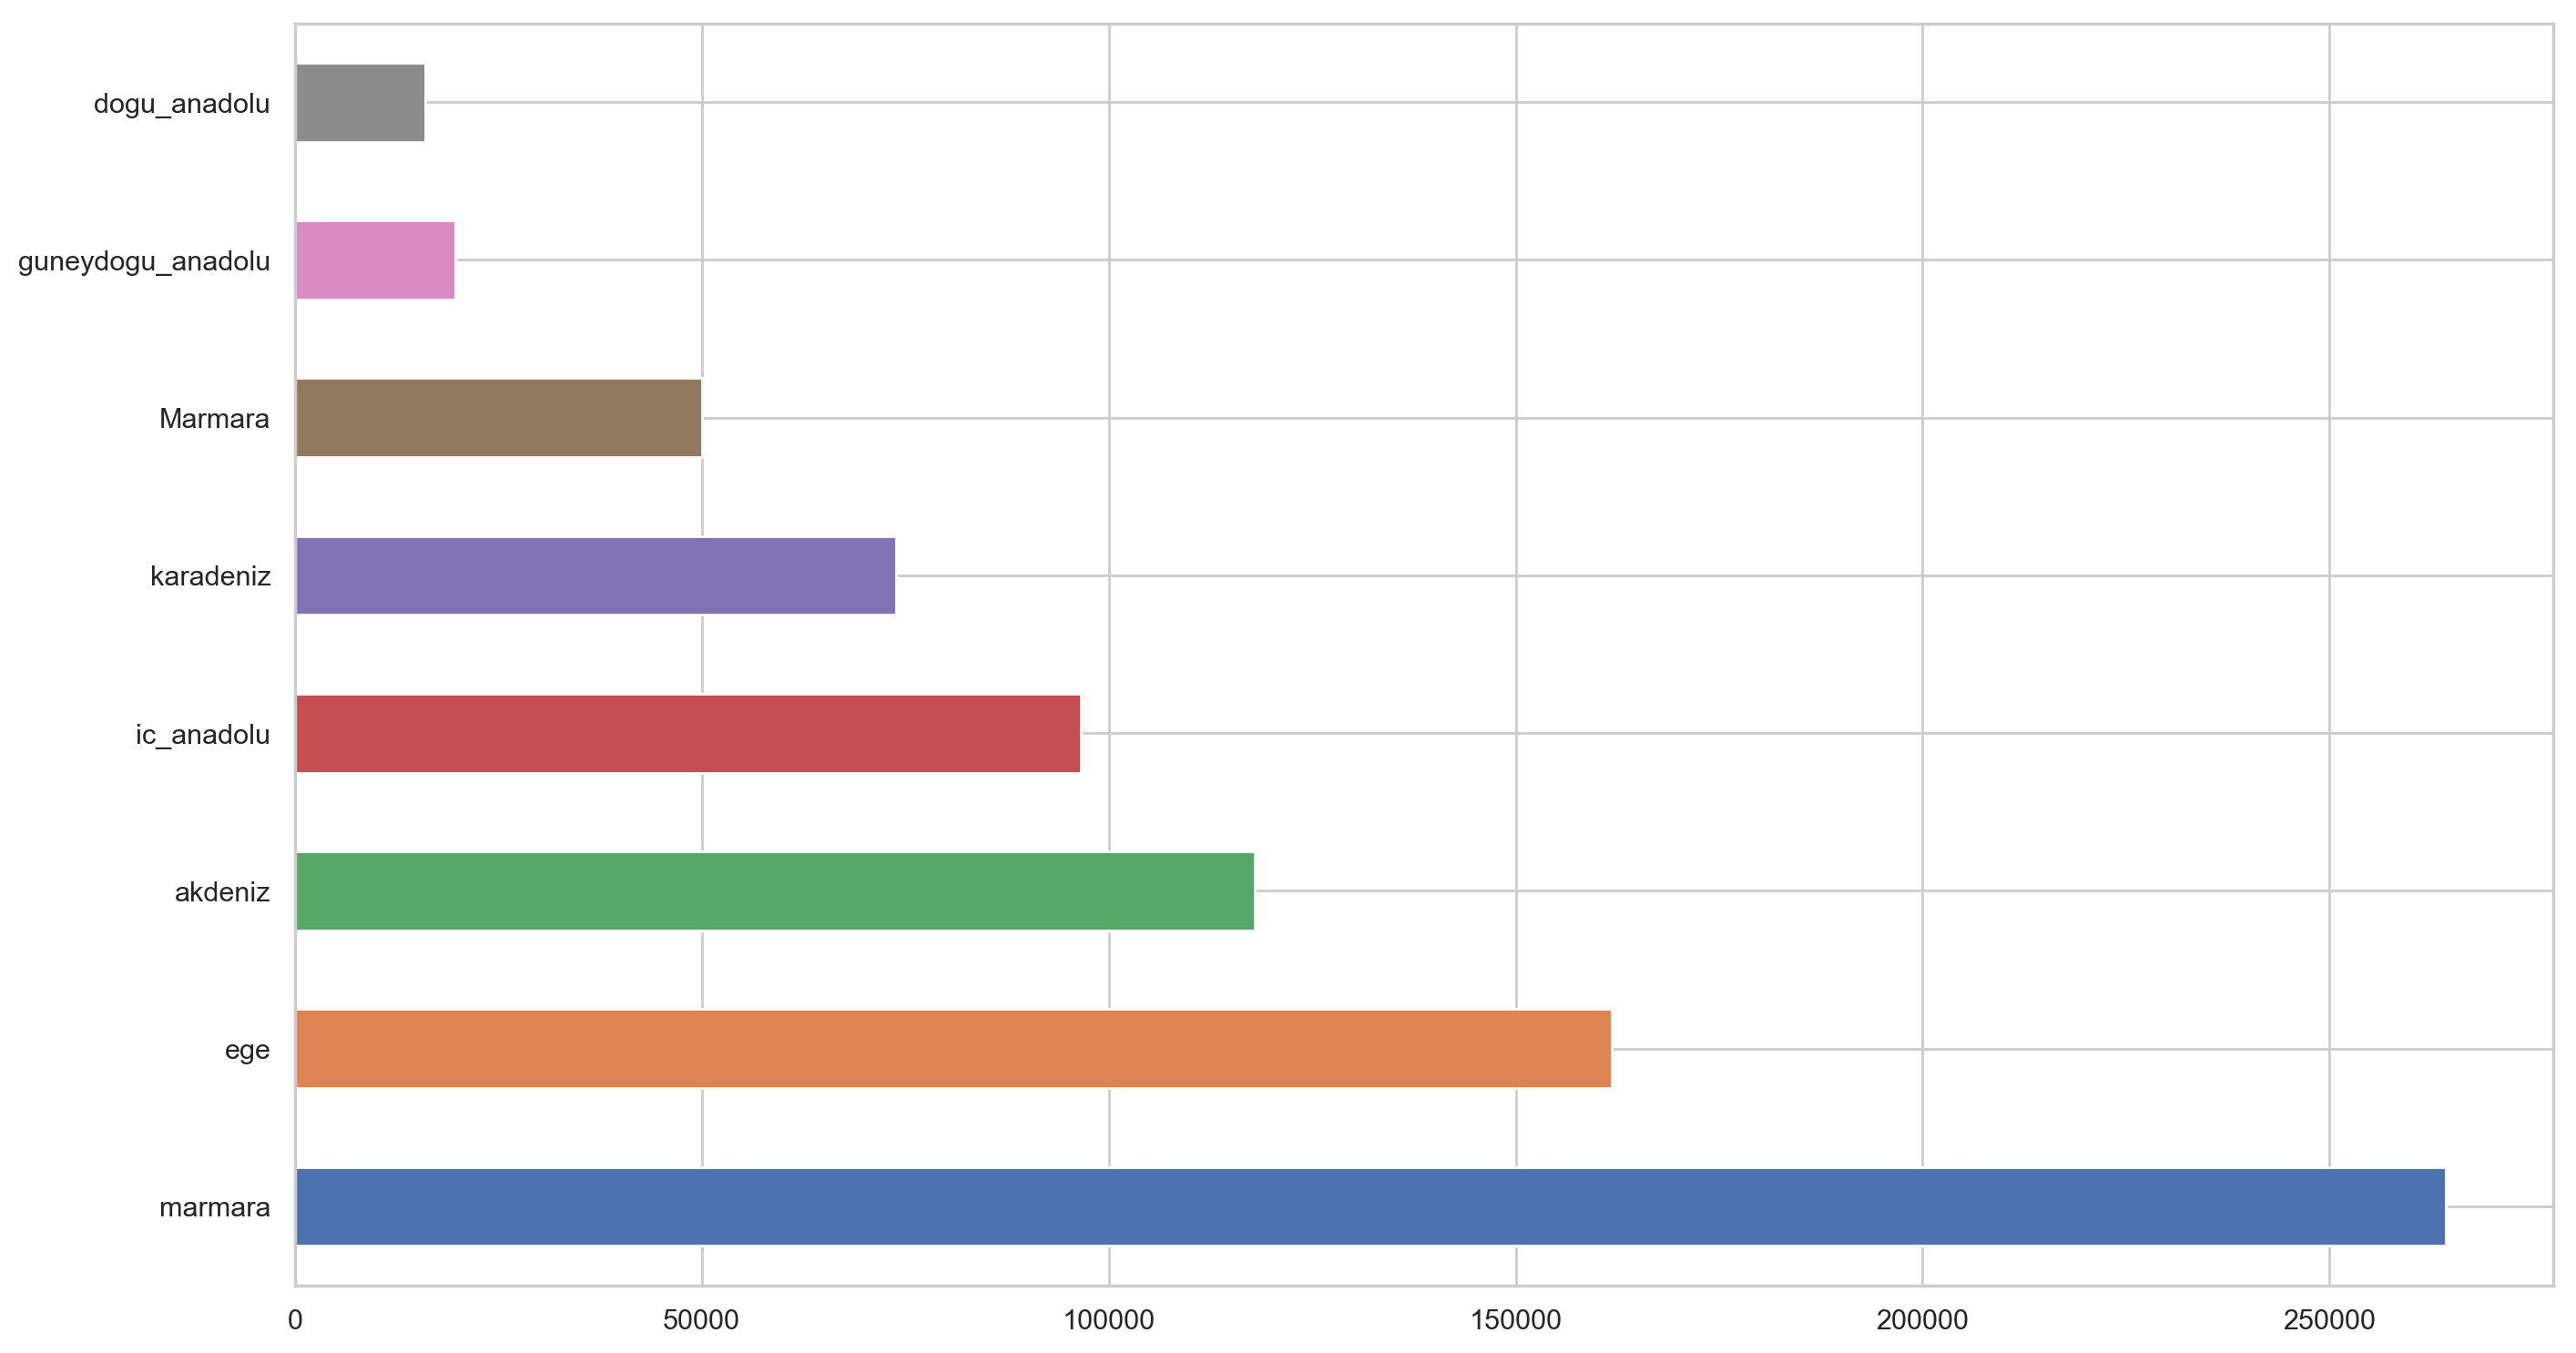

<Figure size 800x800 with 0 Axes>

In [140]:
# Frequency of each observation
cat_df["bolge"].value_counts().plot.barh()
plt.figure(figsize=(8,8))

##### Status

In [144]:
cat_df["Status"].unique()

[Gök Gürültülü Sağnak Yağmur, Yağmurlu, Güneşli, ParçalıBulutlu, Parçalı Bulutlu, ..., Çoğunlukla Bulutlu Kar Yağışlı, Ara Ara Dolu Yağışı, Buzlanma, Yoğun Soğuk, Rüzgarlı]
Length: 30
Categories (29, object): [Gök Gürültülü Sağnak Yağmur, Yağmurlu, Güneşli, ParçalıBulutlu, ..., Ara Ara Dolu Yağışı, Buzlanma, Yoğun Soğuk, Rüzgarlı]

In [145]:
cat_df["Status"].nunique()

29

<Figure size 800x800 with 0 Axes>

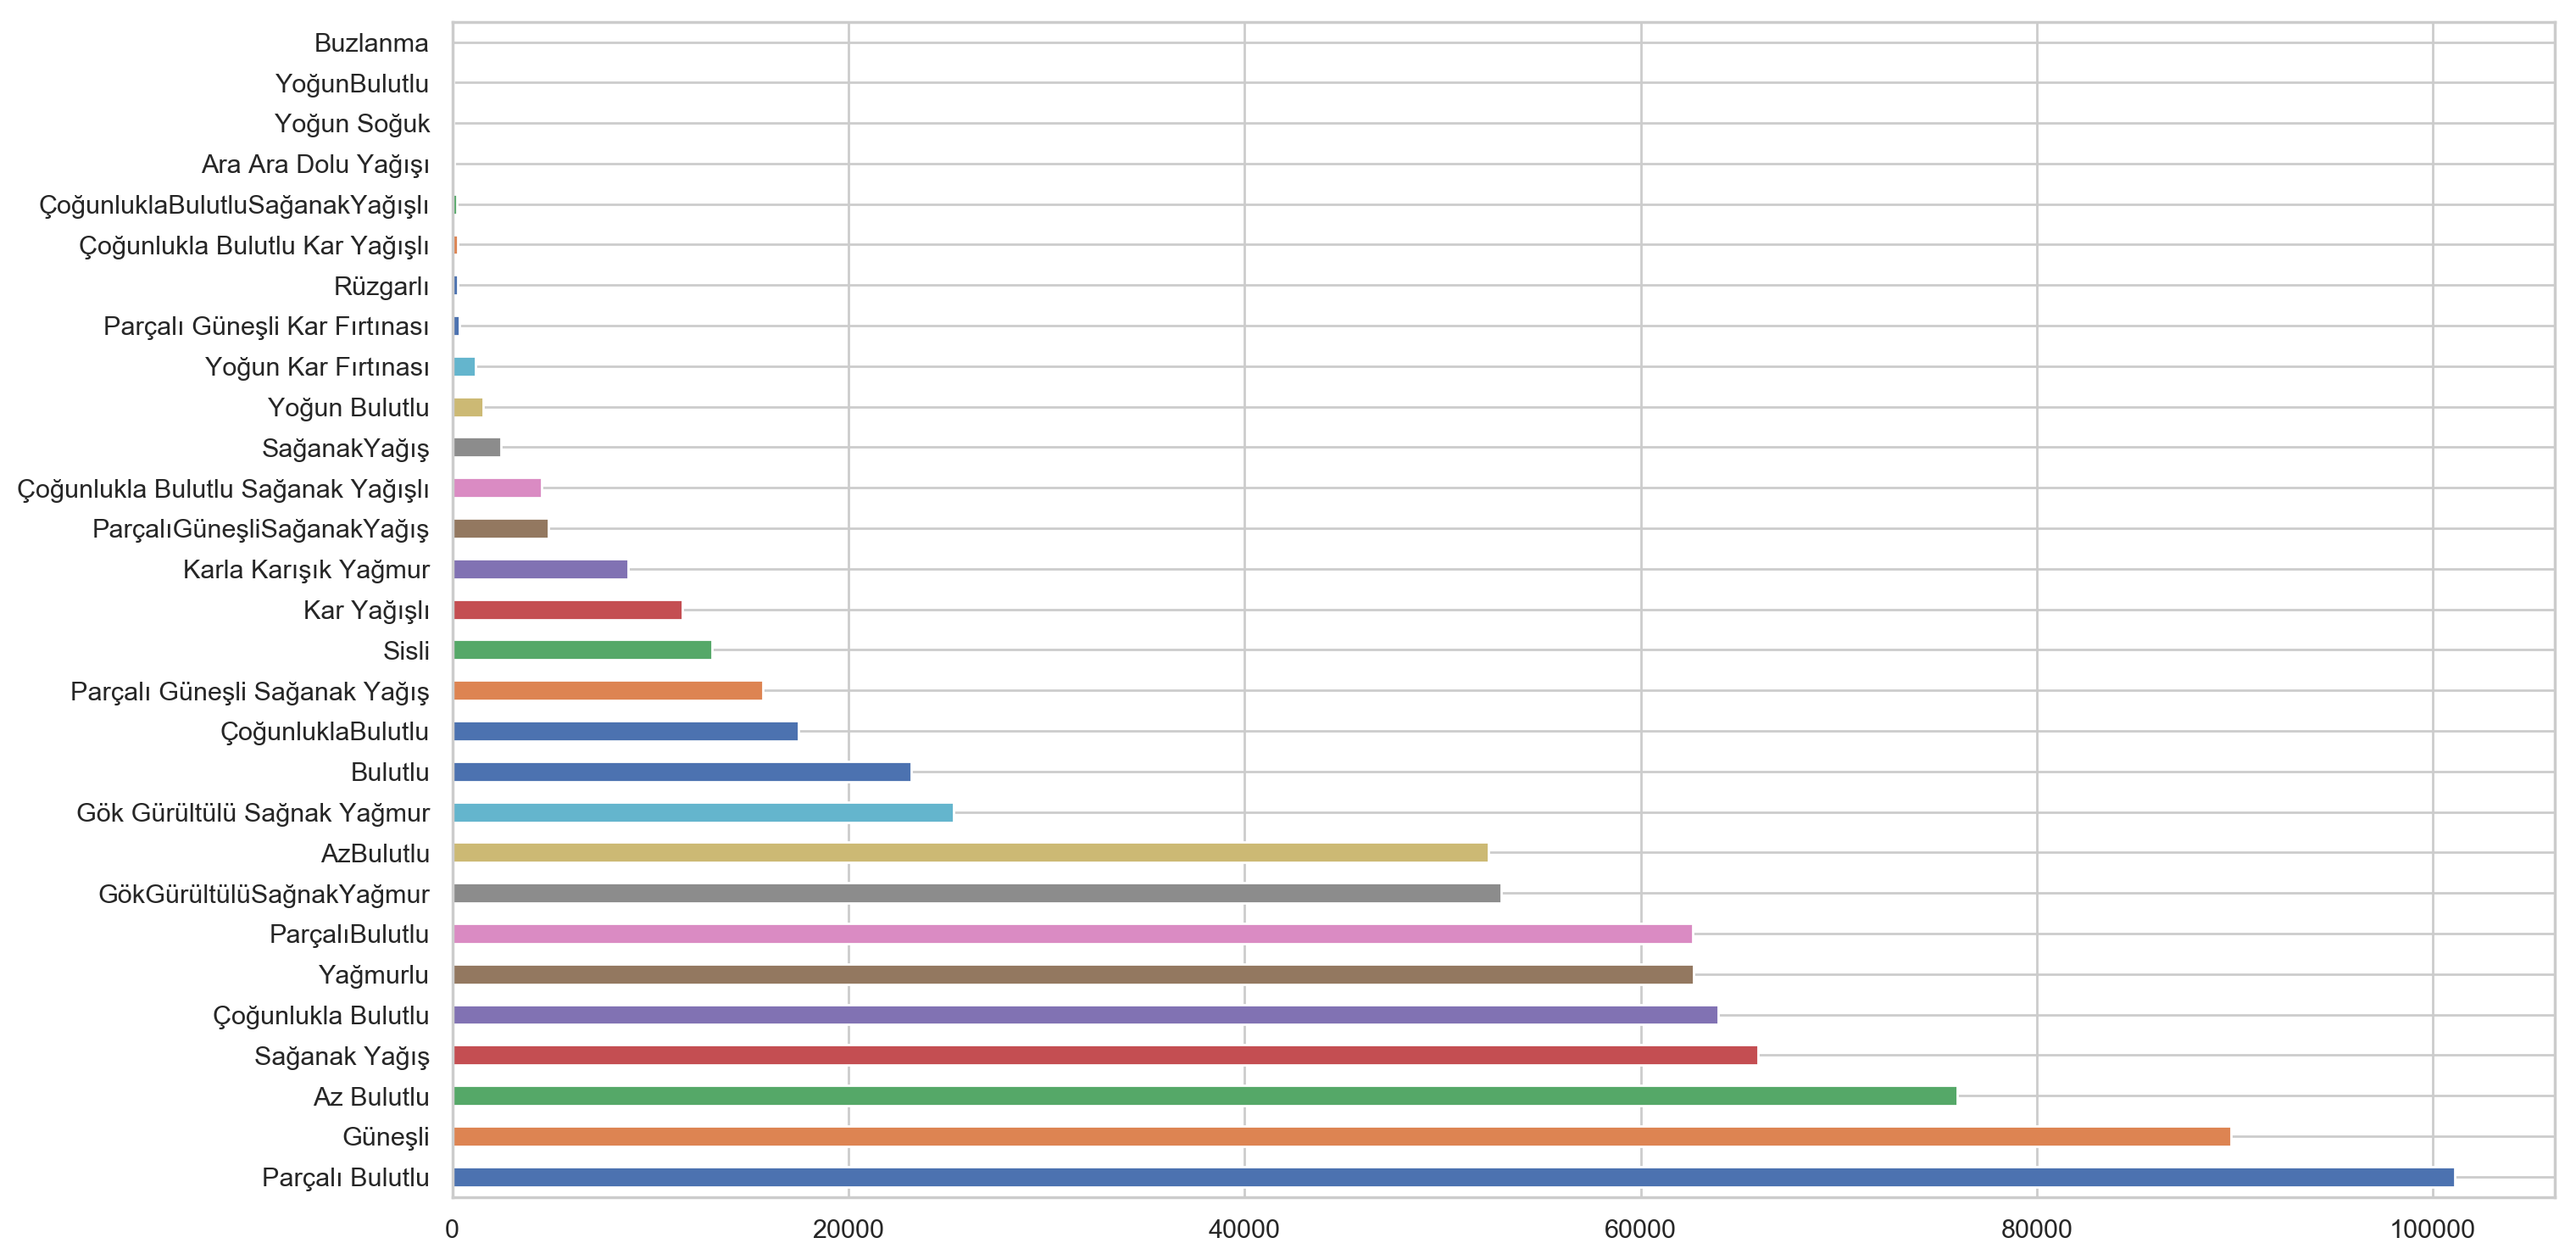

<Figure size 800x800 with 0 Axes>

In [147]:
# Frequency of each observation
cat_df["Status"].value_counts().plot.barh()
plt.figure(figsize=(8,8))

### Continuous Variable 

In [148]:
# Get only continuous variable with df_num
df_num = df.select_dtypes(include=["float64","int64"])
df_num.head()

Id  trivago_id  hotel_impr  avg_cpc  clicks  booking_value_index  stars  \
0   1     3503572         113     0.06       0                    1      0   
1   2      921561         437     0.06       1                    1      3   
2   3     4928304         613     0.16      23                    4      0   
3   4      112719        4473     0.08      80                    1      4   
4   5     1625365         520     0.11       6                    1      0   

   rating  my_min_position  my_price   ...     rival1_min_position  \
0   84.90              1.0     738.0   ...                     2.0   
1   83.53              3.0     490.0   ...                     4.0   
2   78.87              1.0     248.0   ...                     2.0   
3   77.85              2.0     200.0   ...                     NaN   
4   74.97              1.0     155.0   ...                     2.0   

   rival2_price  rival2_min_position       revenue  total_night  total_rooms  \
0         629.0                  4.0  0.000000e+00          0.0          0.0   
1         395.0                  1.0  0.000000e+00          0.0          0.0   
2         284.0                  4.0  3.750000e+09          1.0          1.0   
3         320.0                  4.0  5.920500e+09          2.0          2.0   
4           NaN                  NaN  3.425850e+09          1.0          1.0   

   holiday_diff  days_of_holiday     kur  opp_cpc  
0            18                3  6.9211     0.08  
1            18                3  6.9211     0.17  
2            18                3  6.9211     0.23  
3            25                4  5.4015     0.08  
4            11                4  5.4238     0.16  

[5 rows x 23 columns]

In [ ]:
## Histograms ##

Text(0.5, 1.0, 'hotel_impr Histogram')

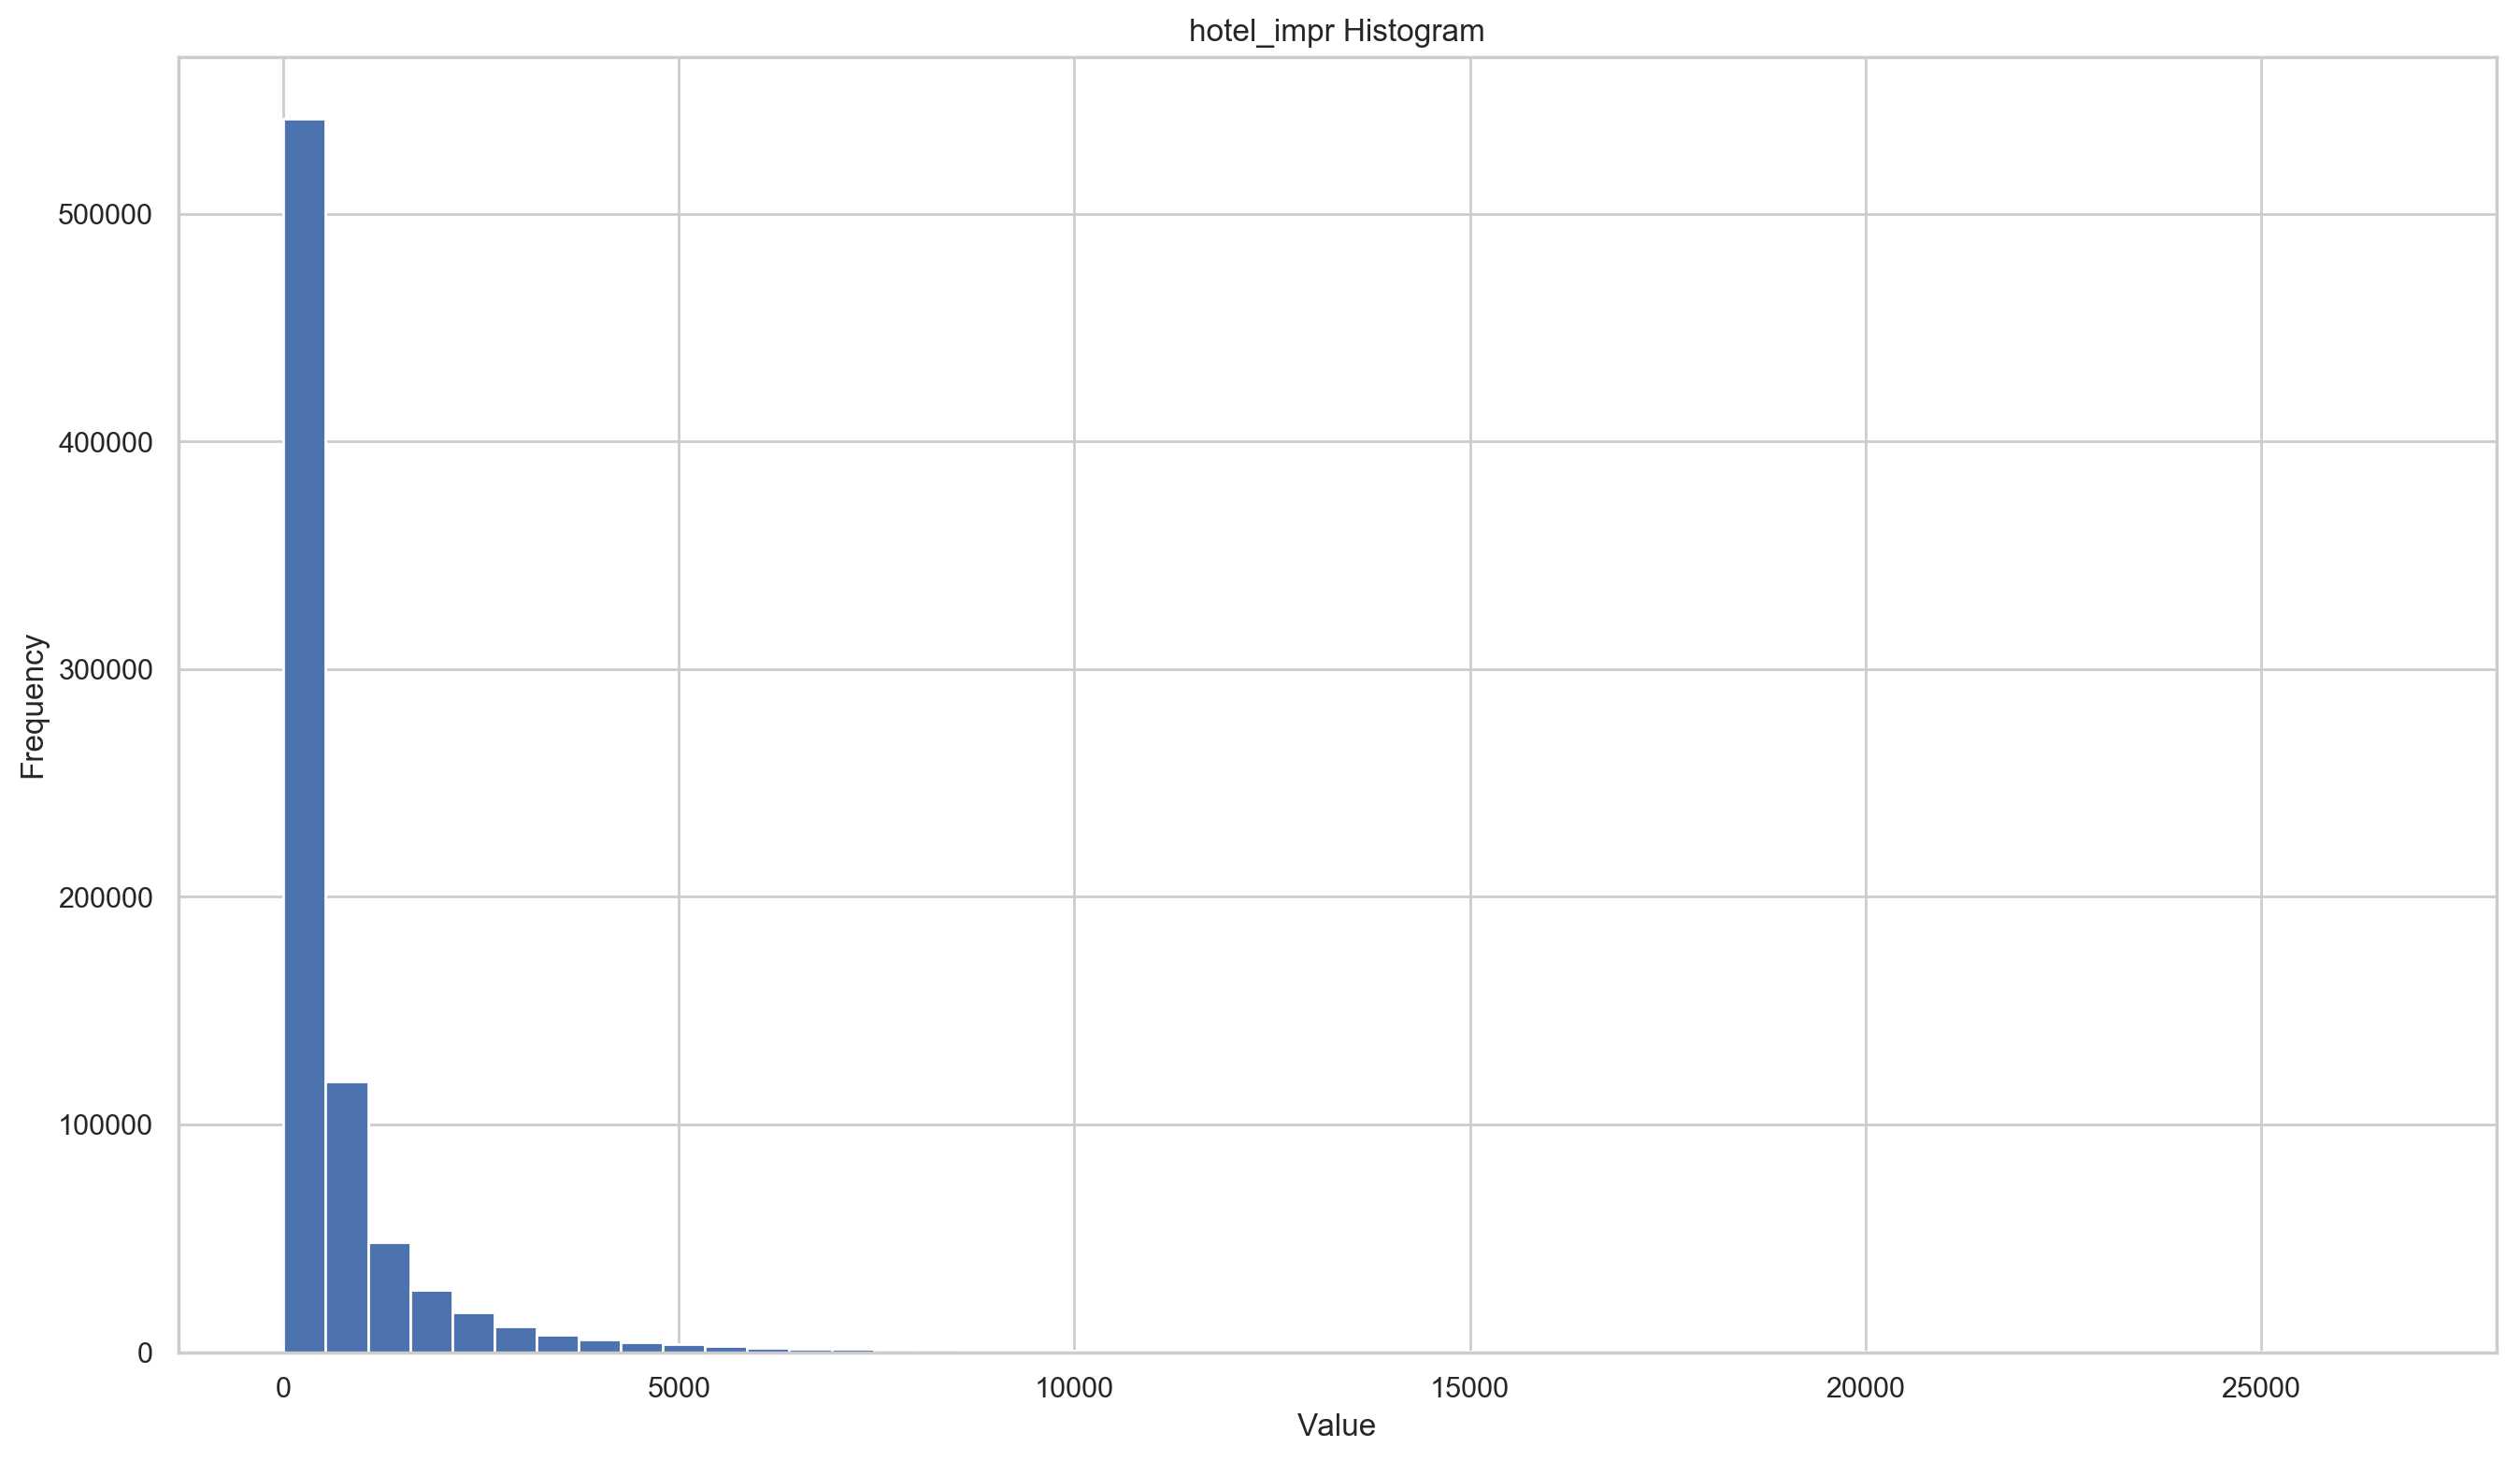

In [182]:
# Positive skewness
n, bins, patches = plt.hist(x=df["hotel_impr"], bins=50)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('hotel_impr Histogram')

Text(0.5, 1.0, 'hotel_impr Histogram')

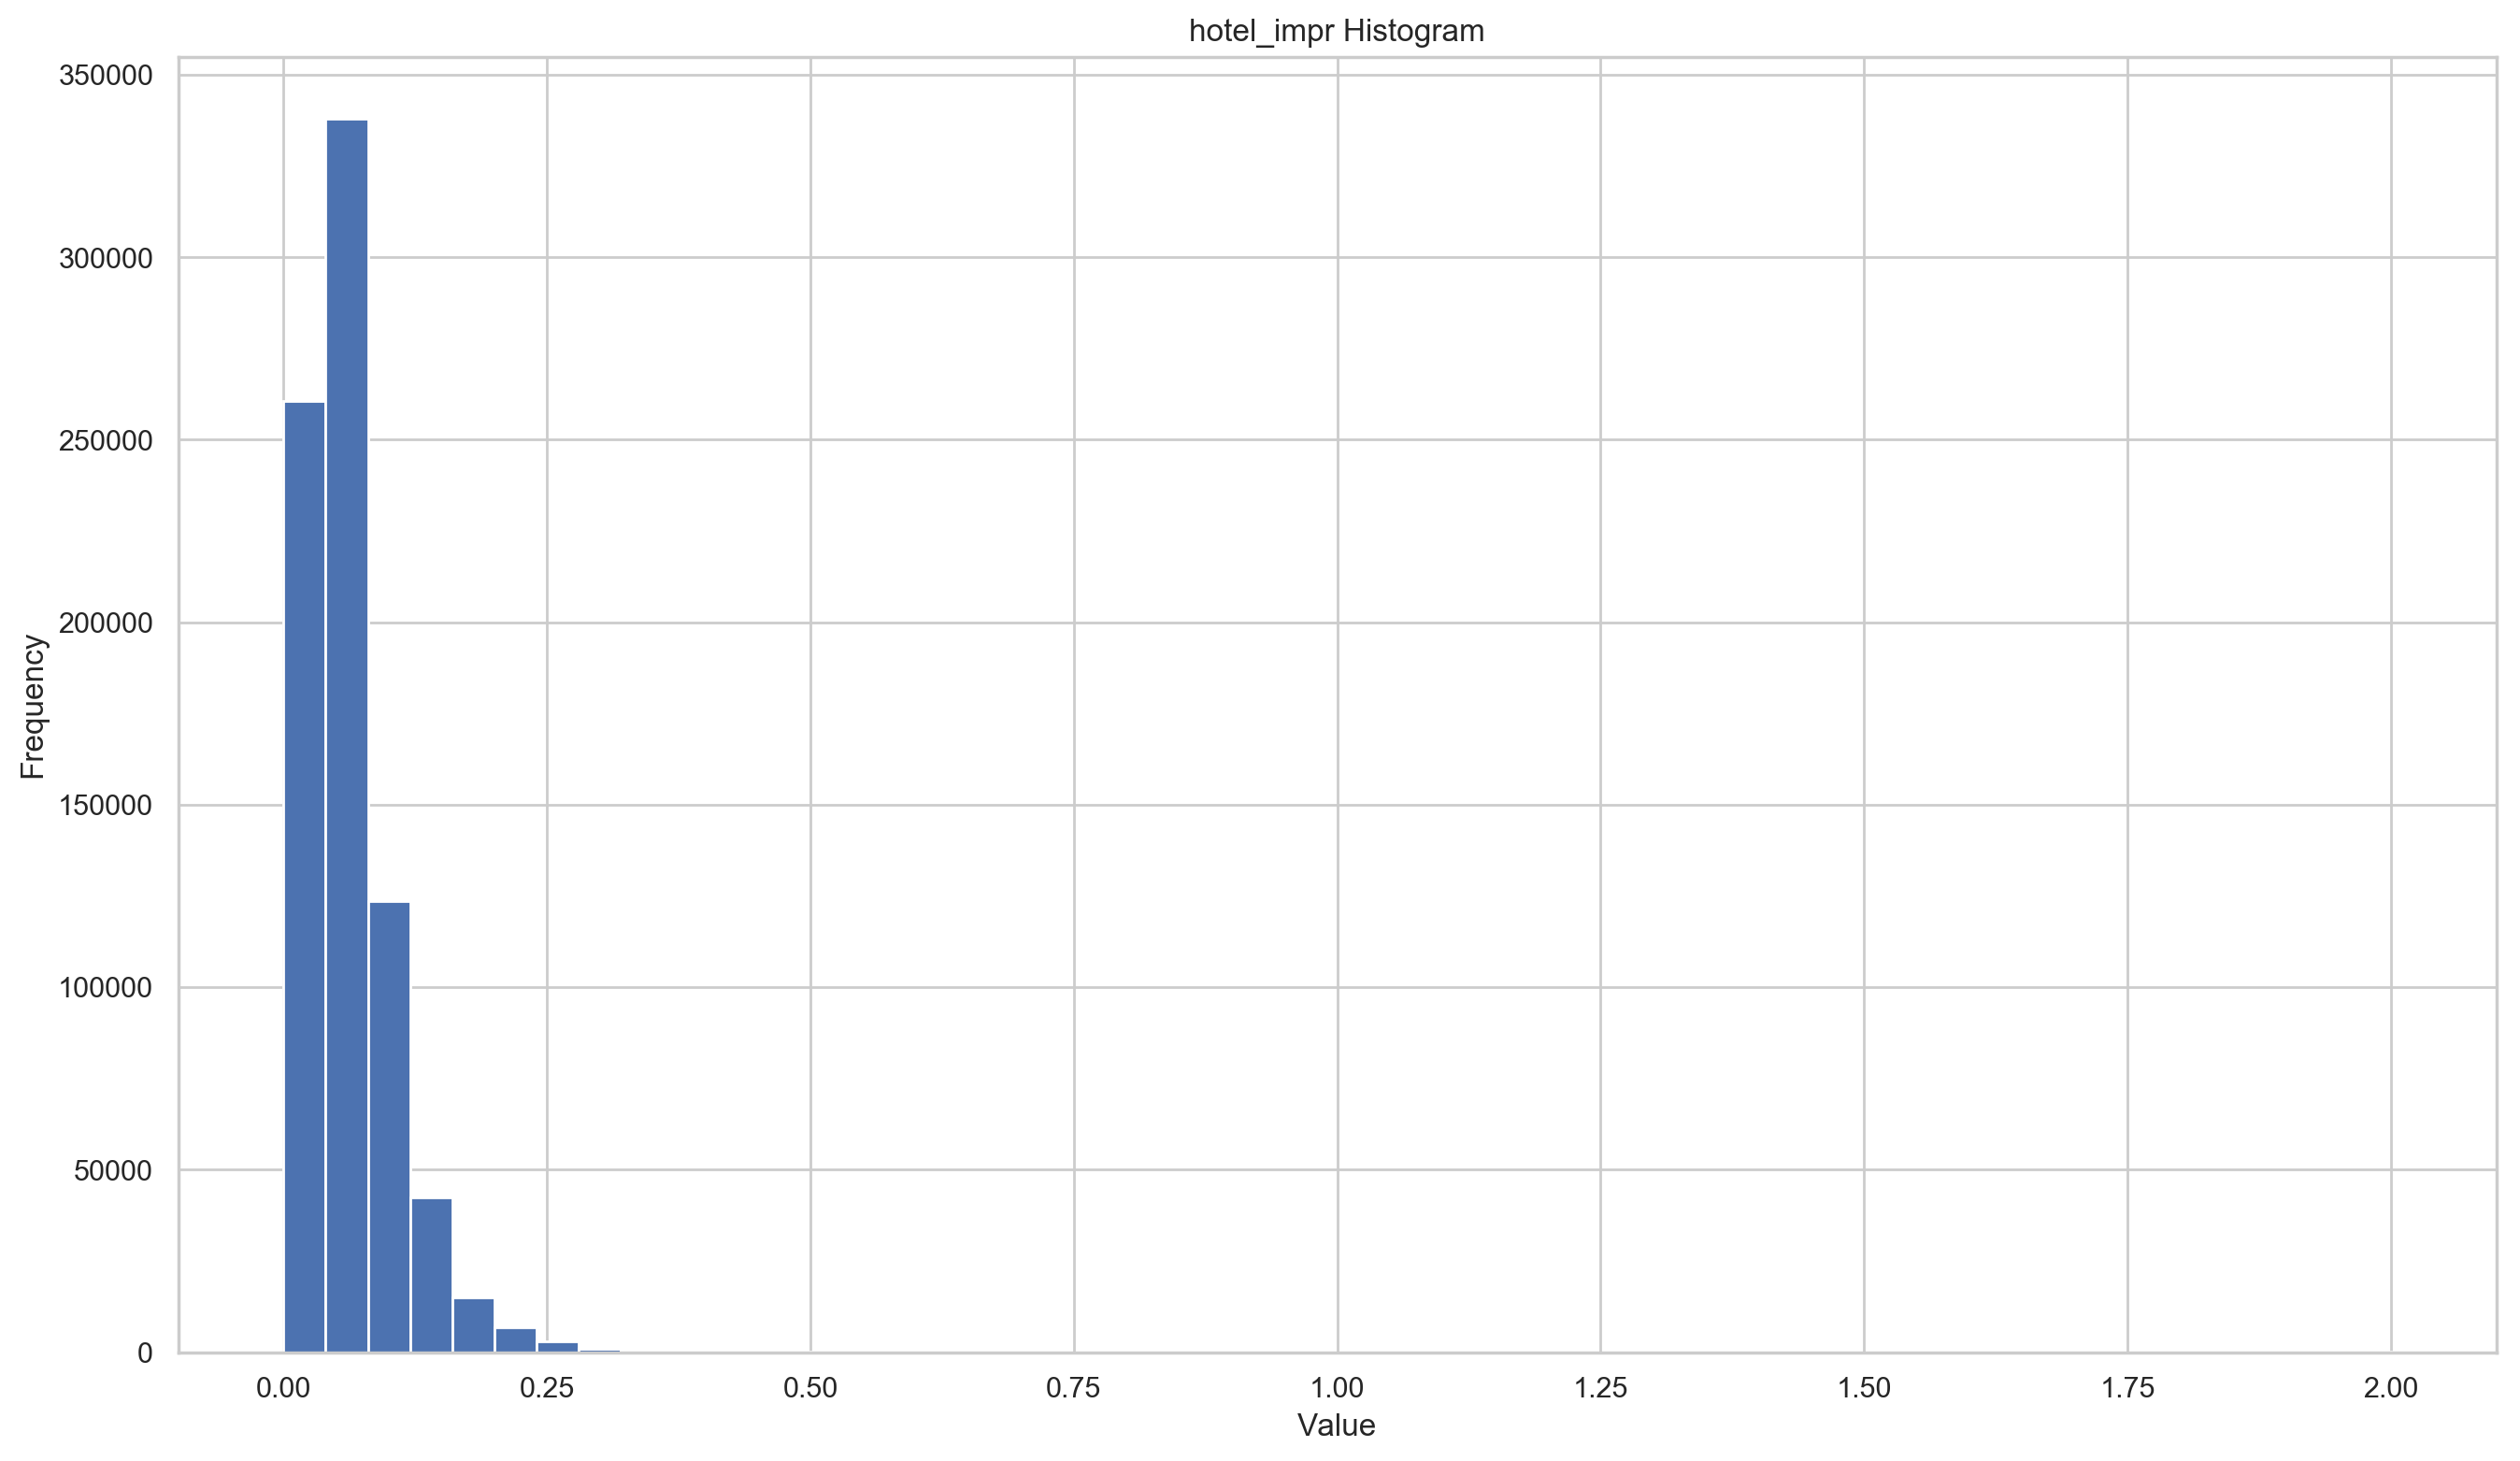

In [184]:
# Positive skewness
n, bins, patches = plt.hist(x=df["avg_cpc"], bins=50)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('avg_cpc Histogram')

Text(0.5, 1.0, 'clicks Histogram')

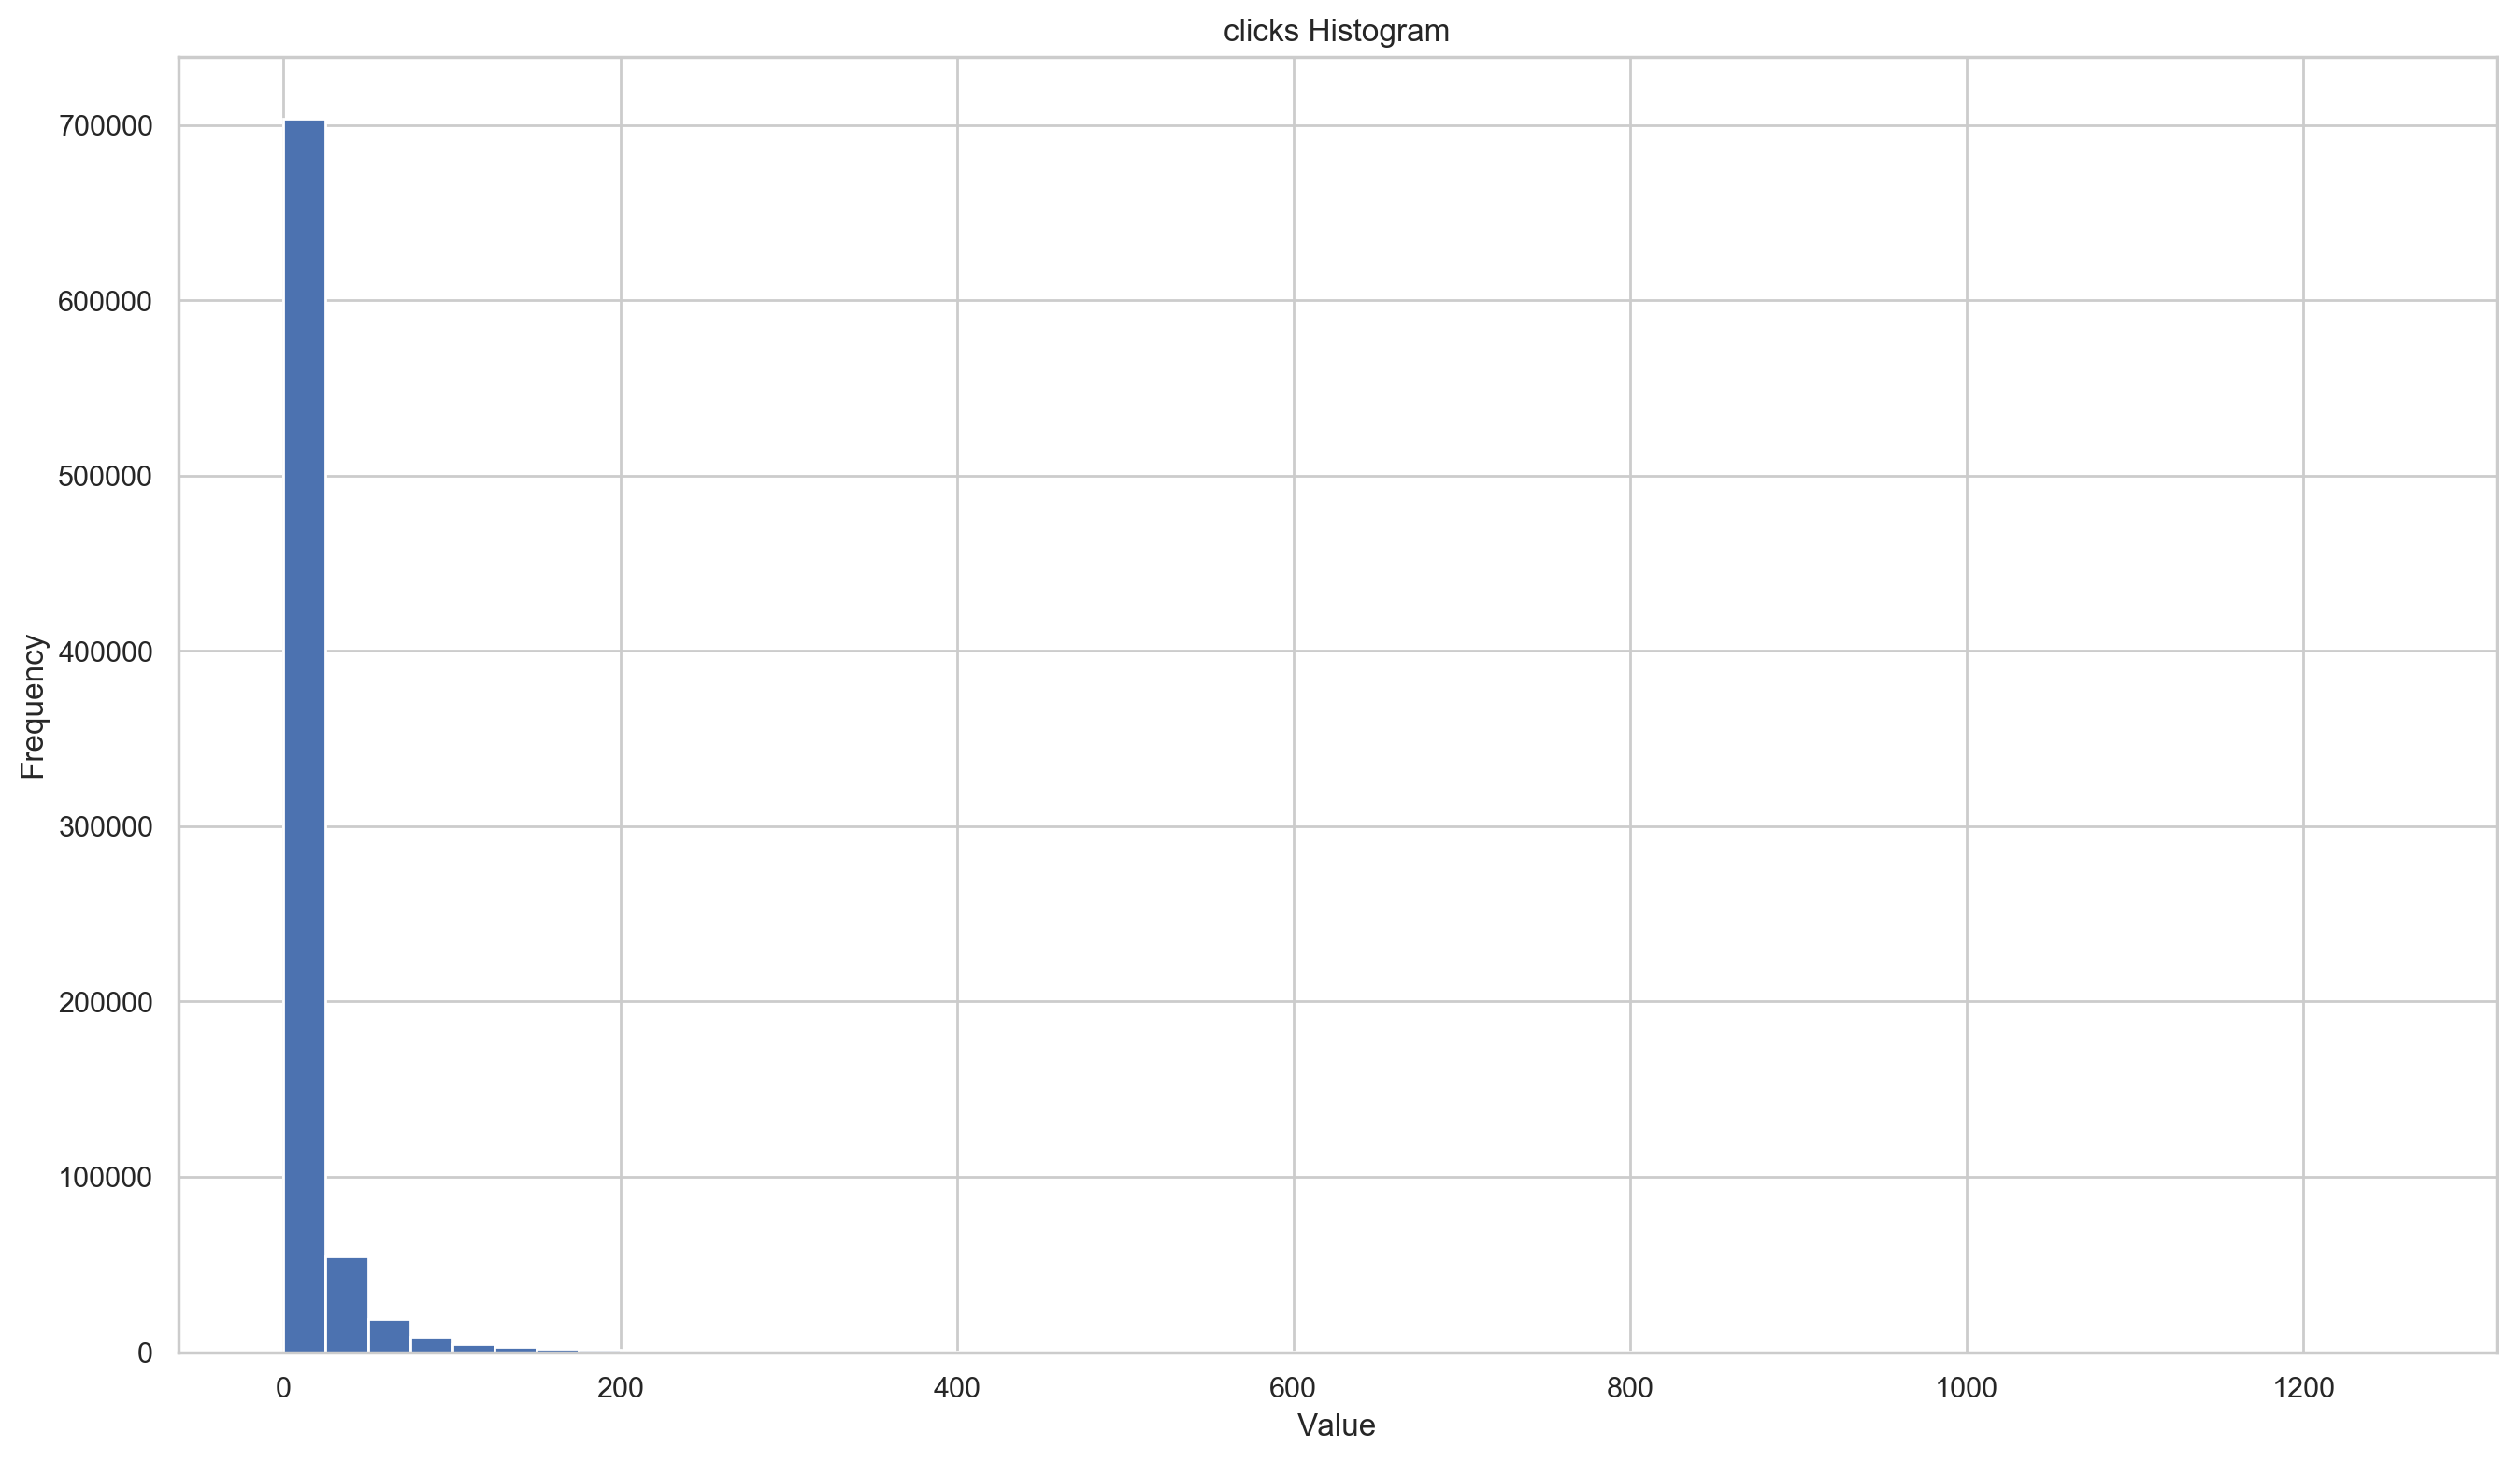

In [186]:
# Positive skewness
n, bins, patches = plt.hist(x=df["clicks"], bins=50)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('clicks Histogram')

Text(0.5, 1.0, 'rating Histogram')

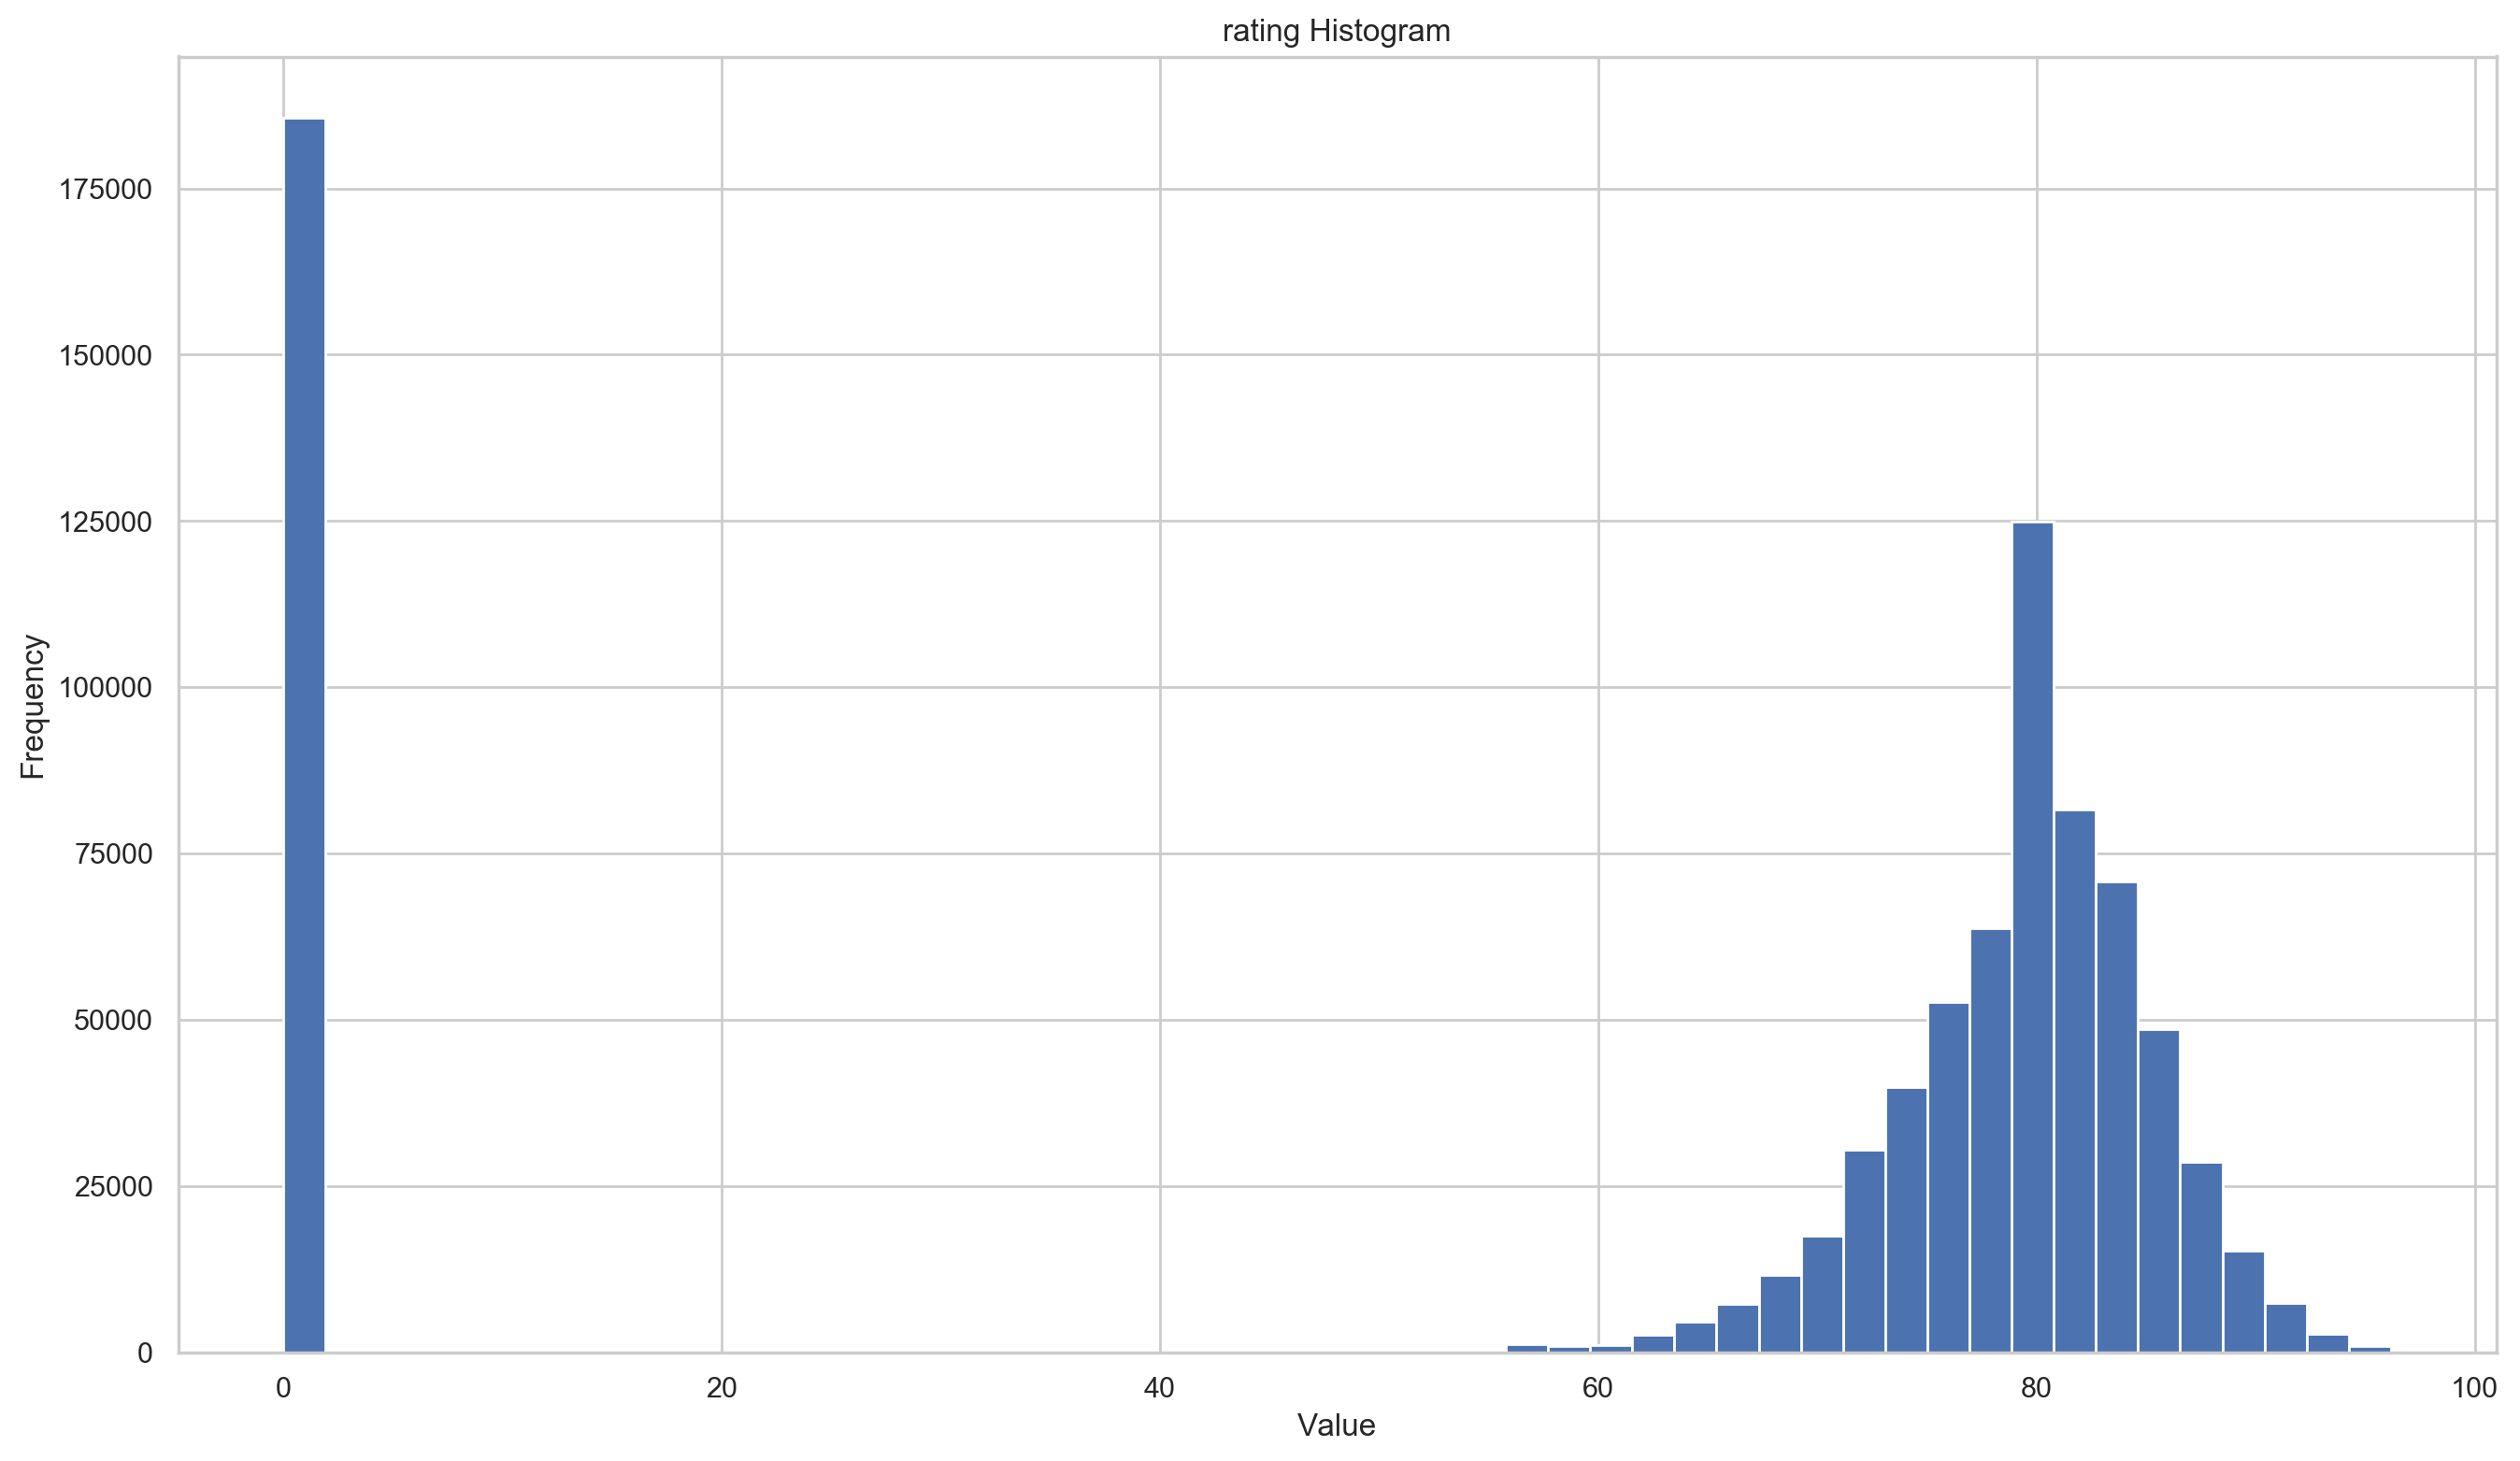

In [187]:
# Positive skewness
n, bins, patches = plt.hist(x=df["rating"], bins=50)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('rating Histogram')

Text(0.5, 1.0, 'my_price Histogram')

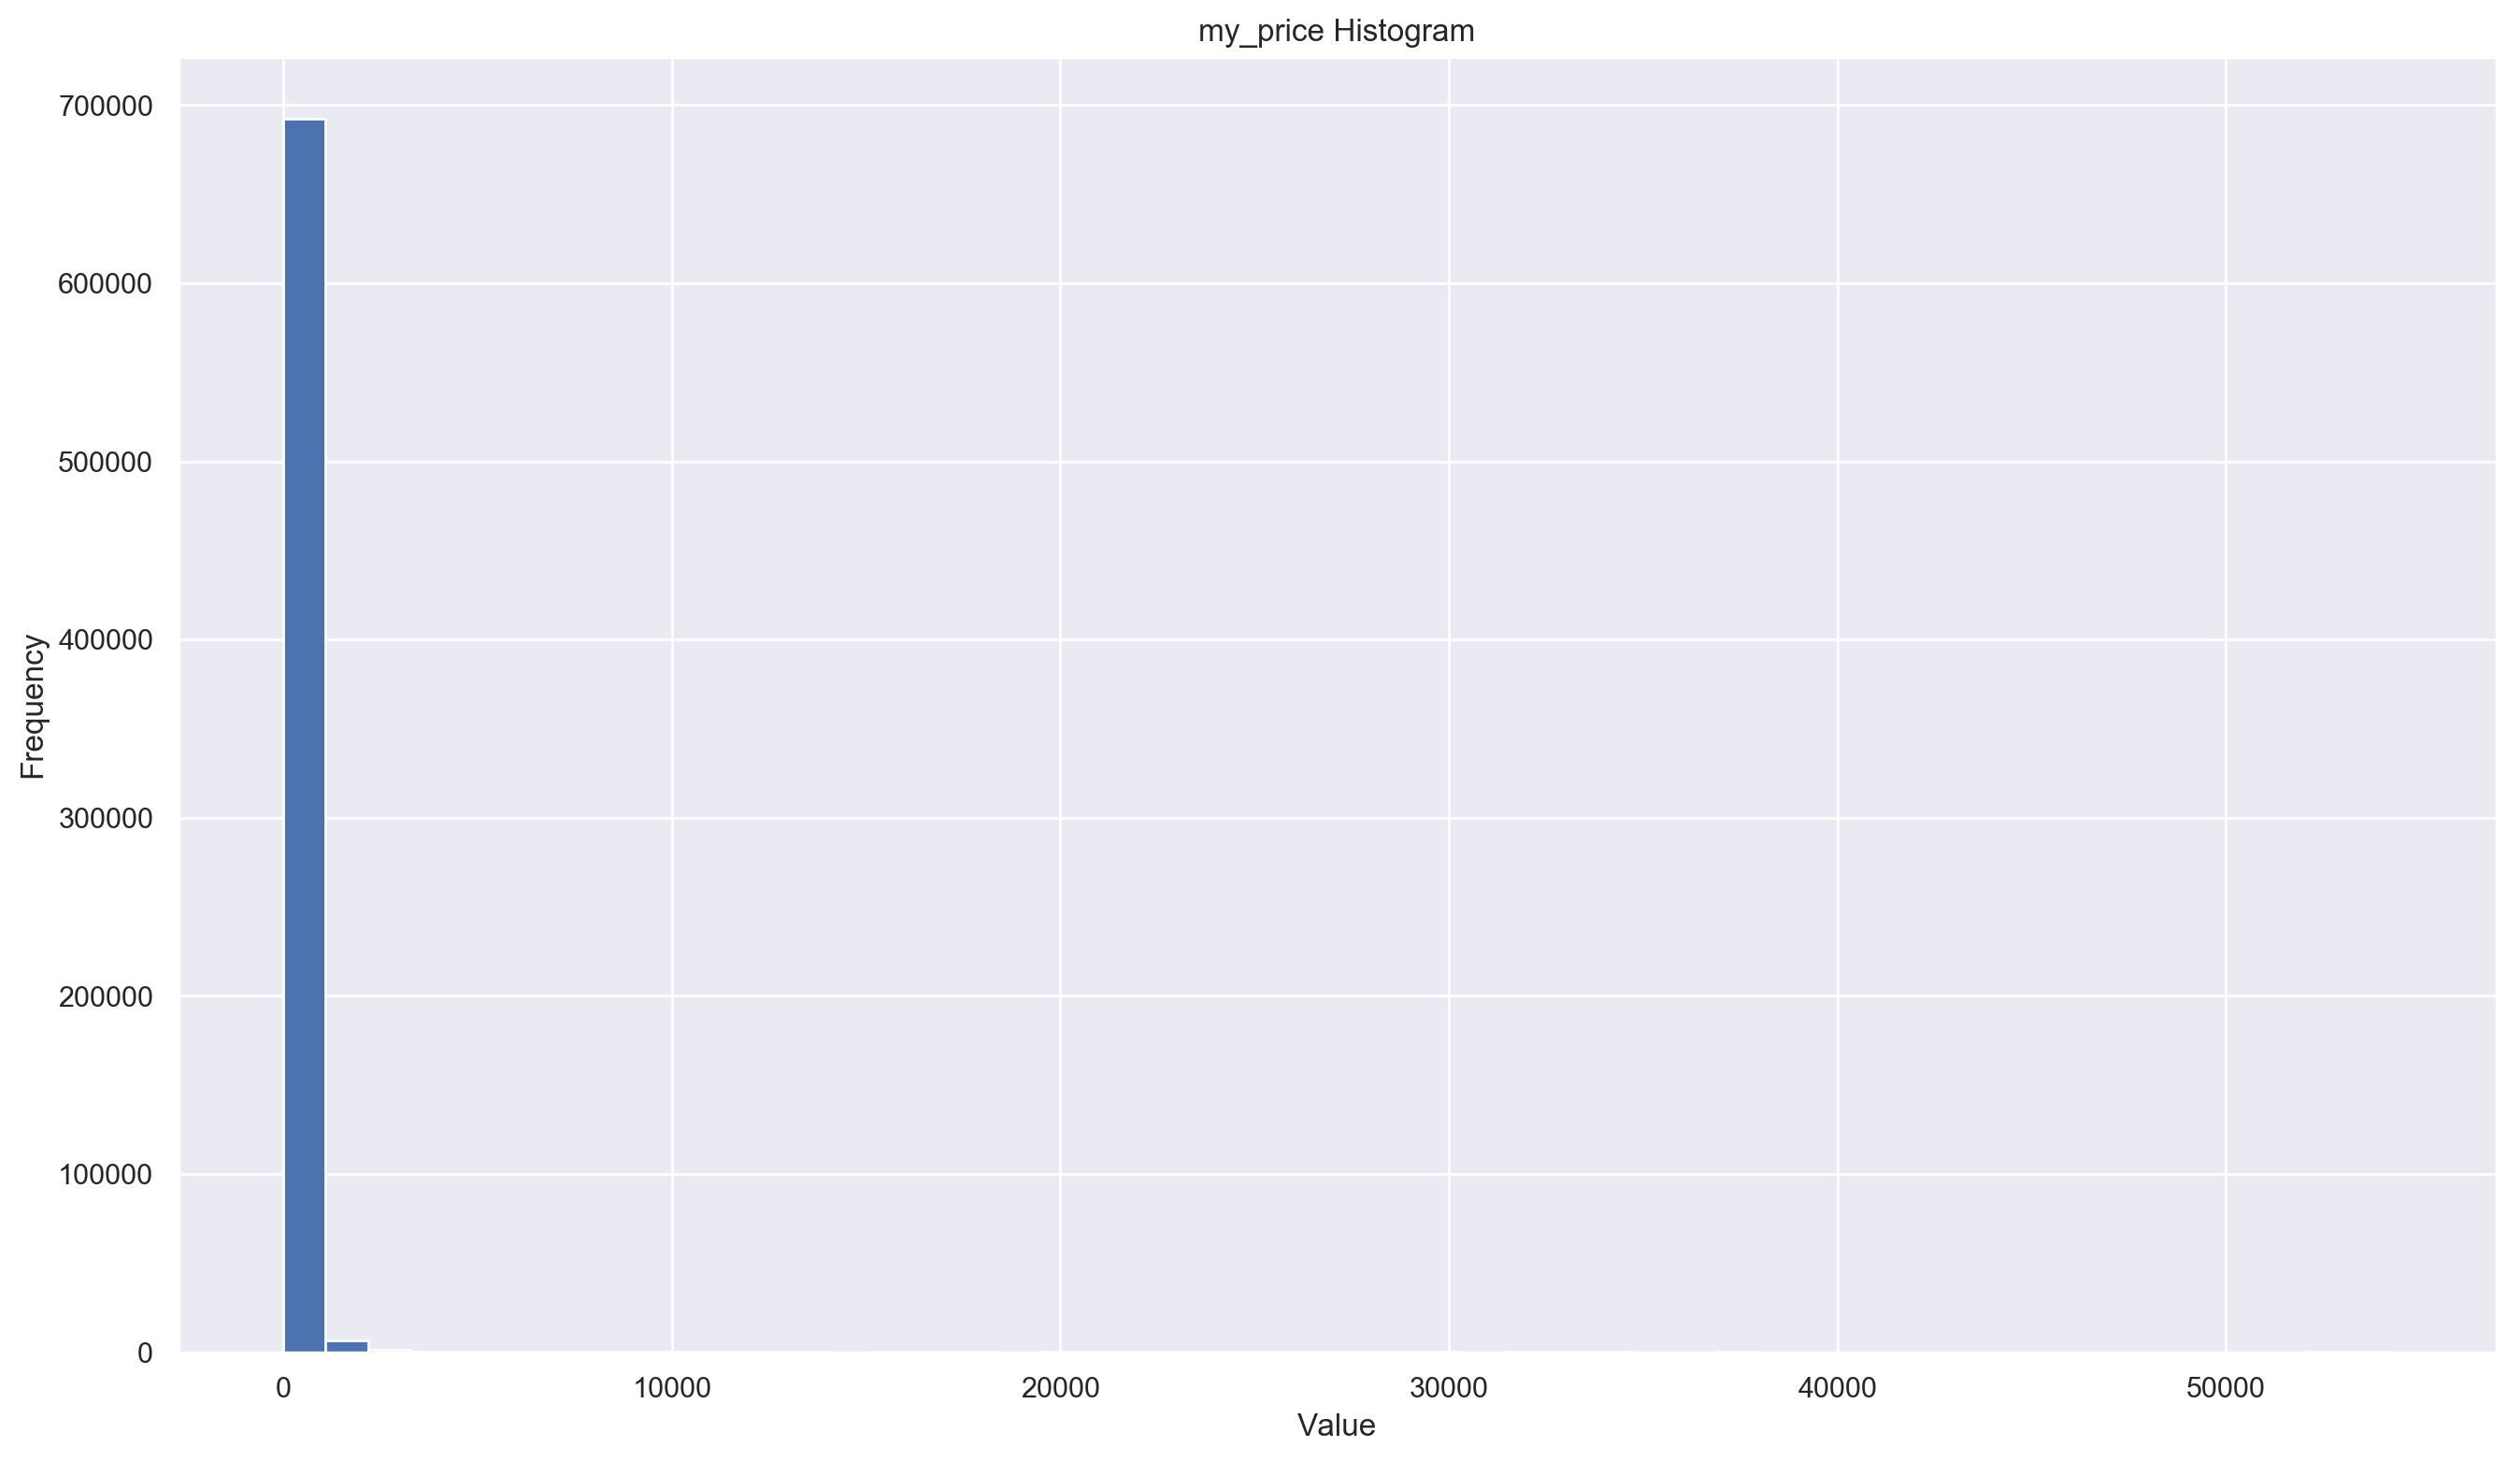

In [196]:
# Positive skewness

n, bins, patches = plt.hist(x=df["my_price"], bins=50)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('my_price Histogram')

Text(0.5, 1.0, 'revenue Histogram')

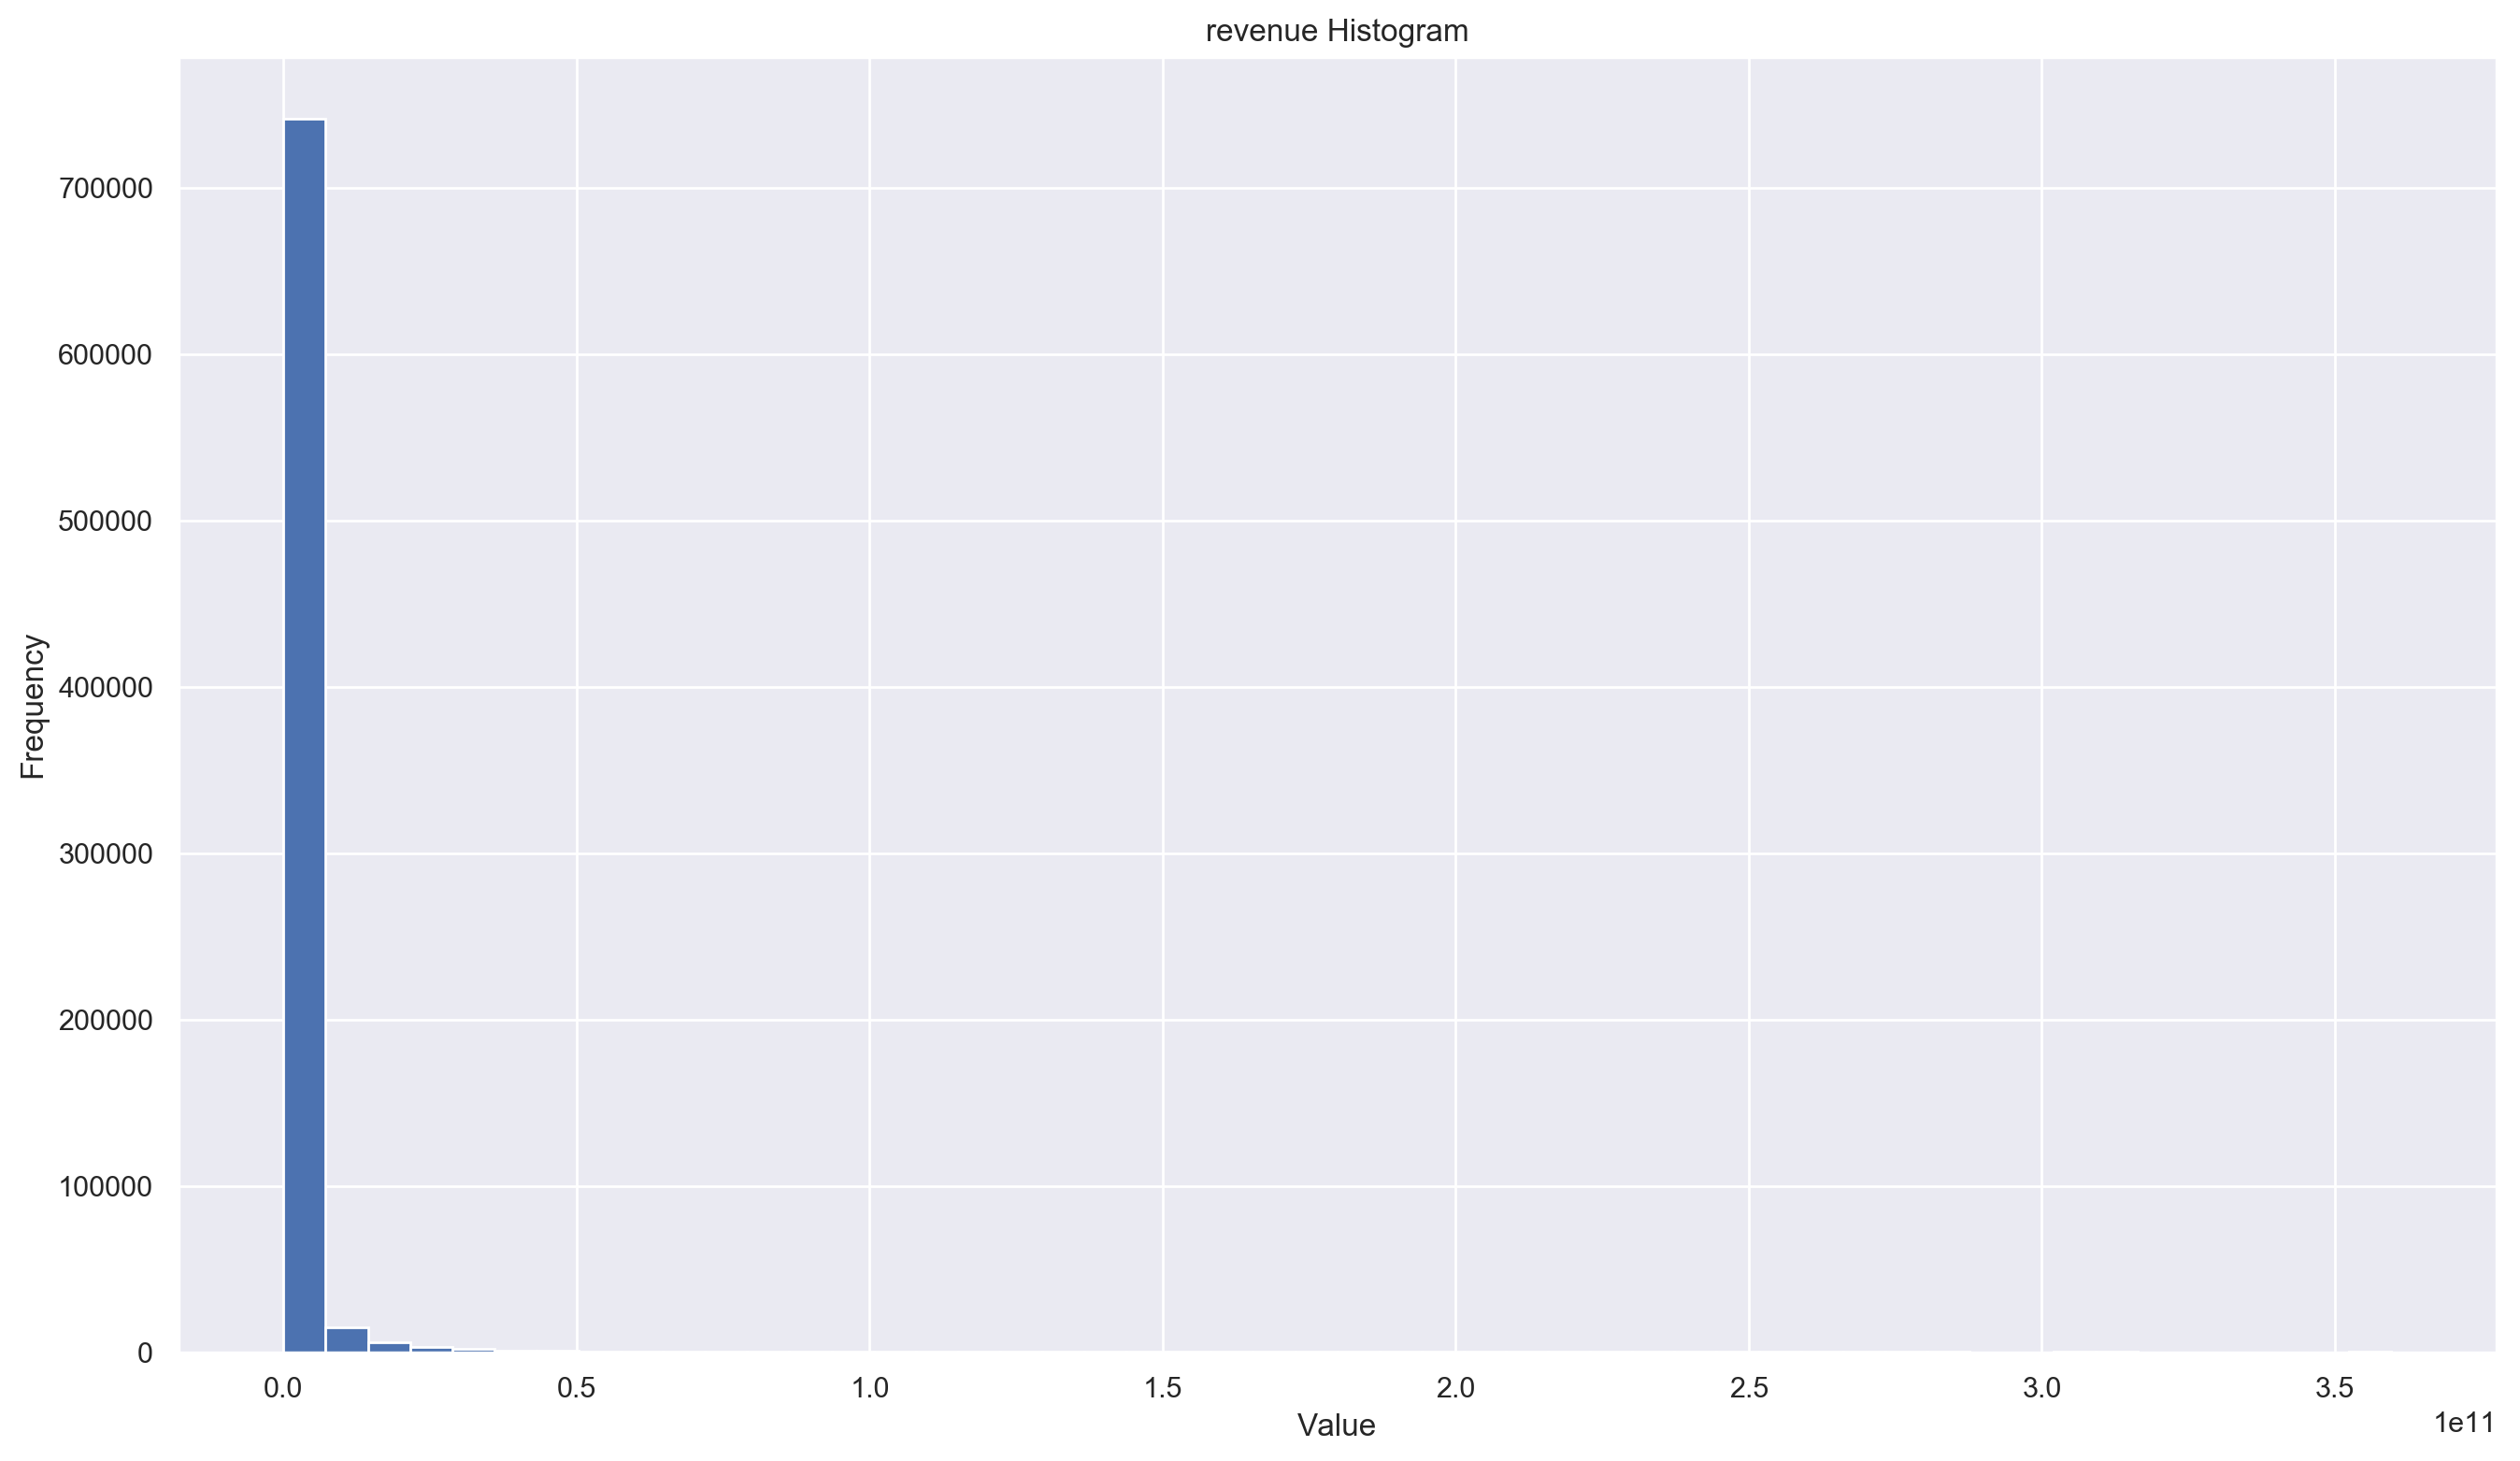

In [197]:
# Positive skewness

n, bins, patches = plt.hist(x=df["revenue"], bins=50)
plt.grid(axis='y', alpha=1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('revenue Histogram')

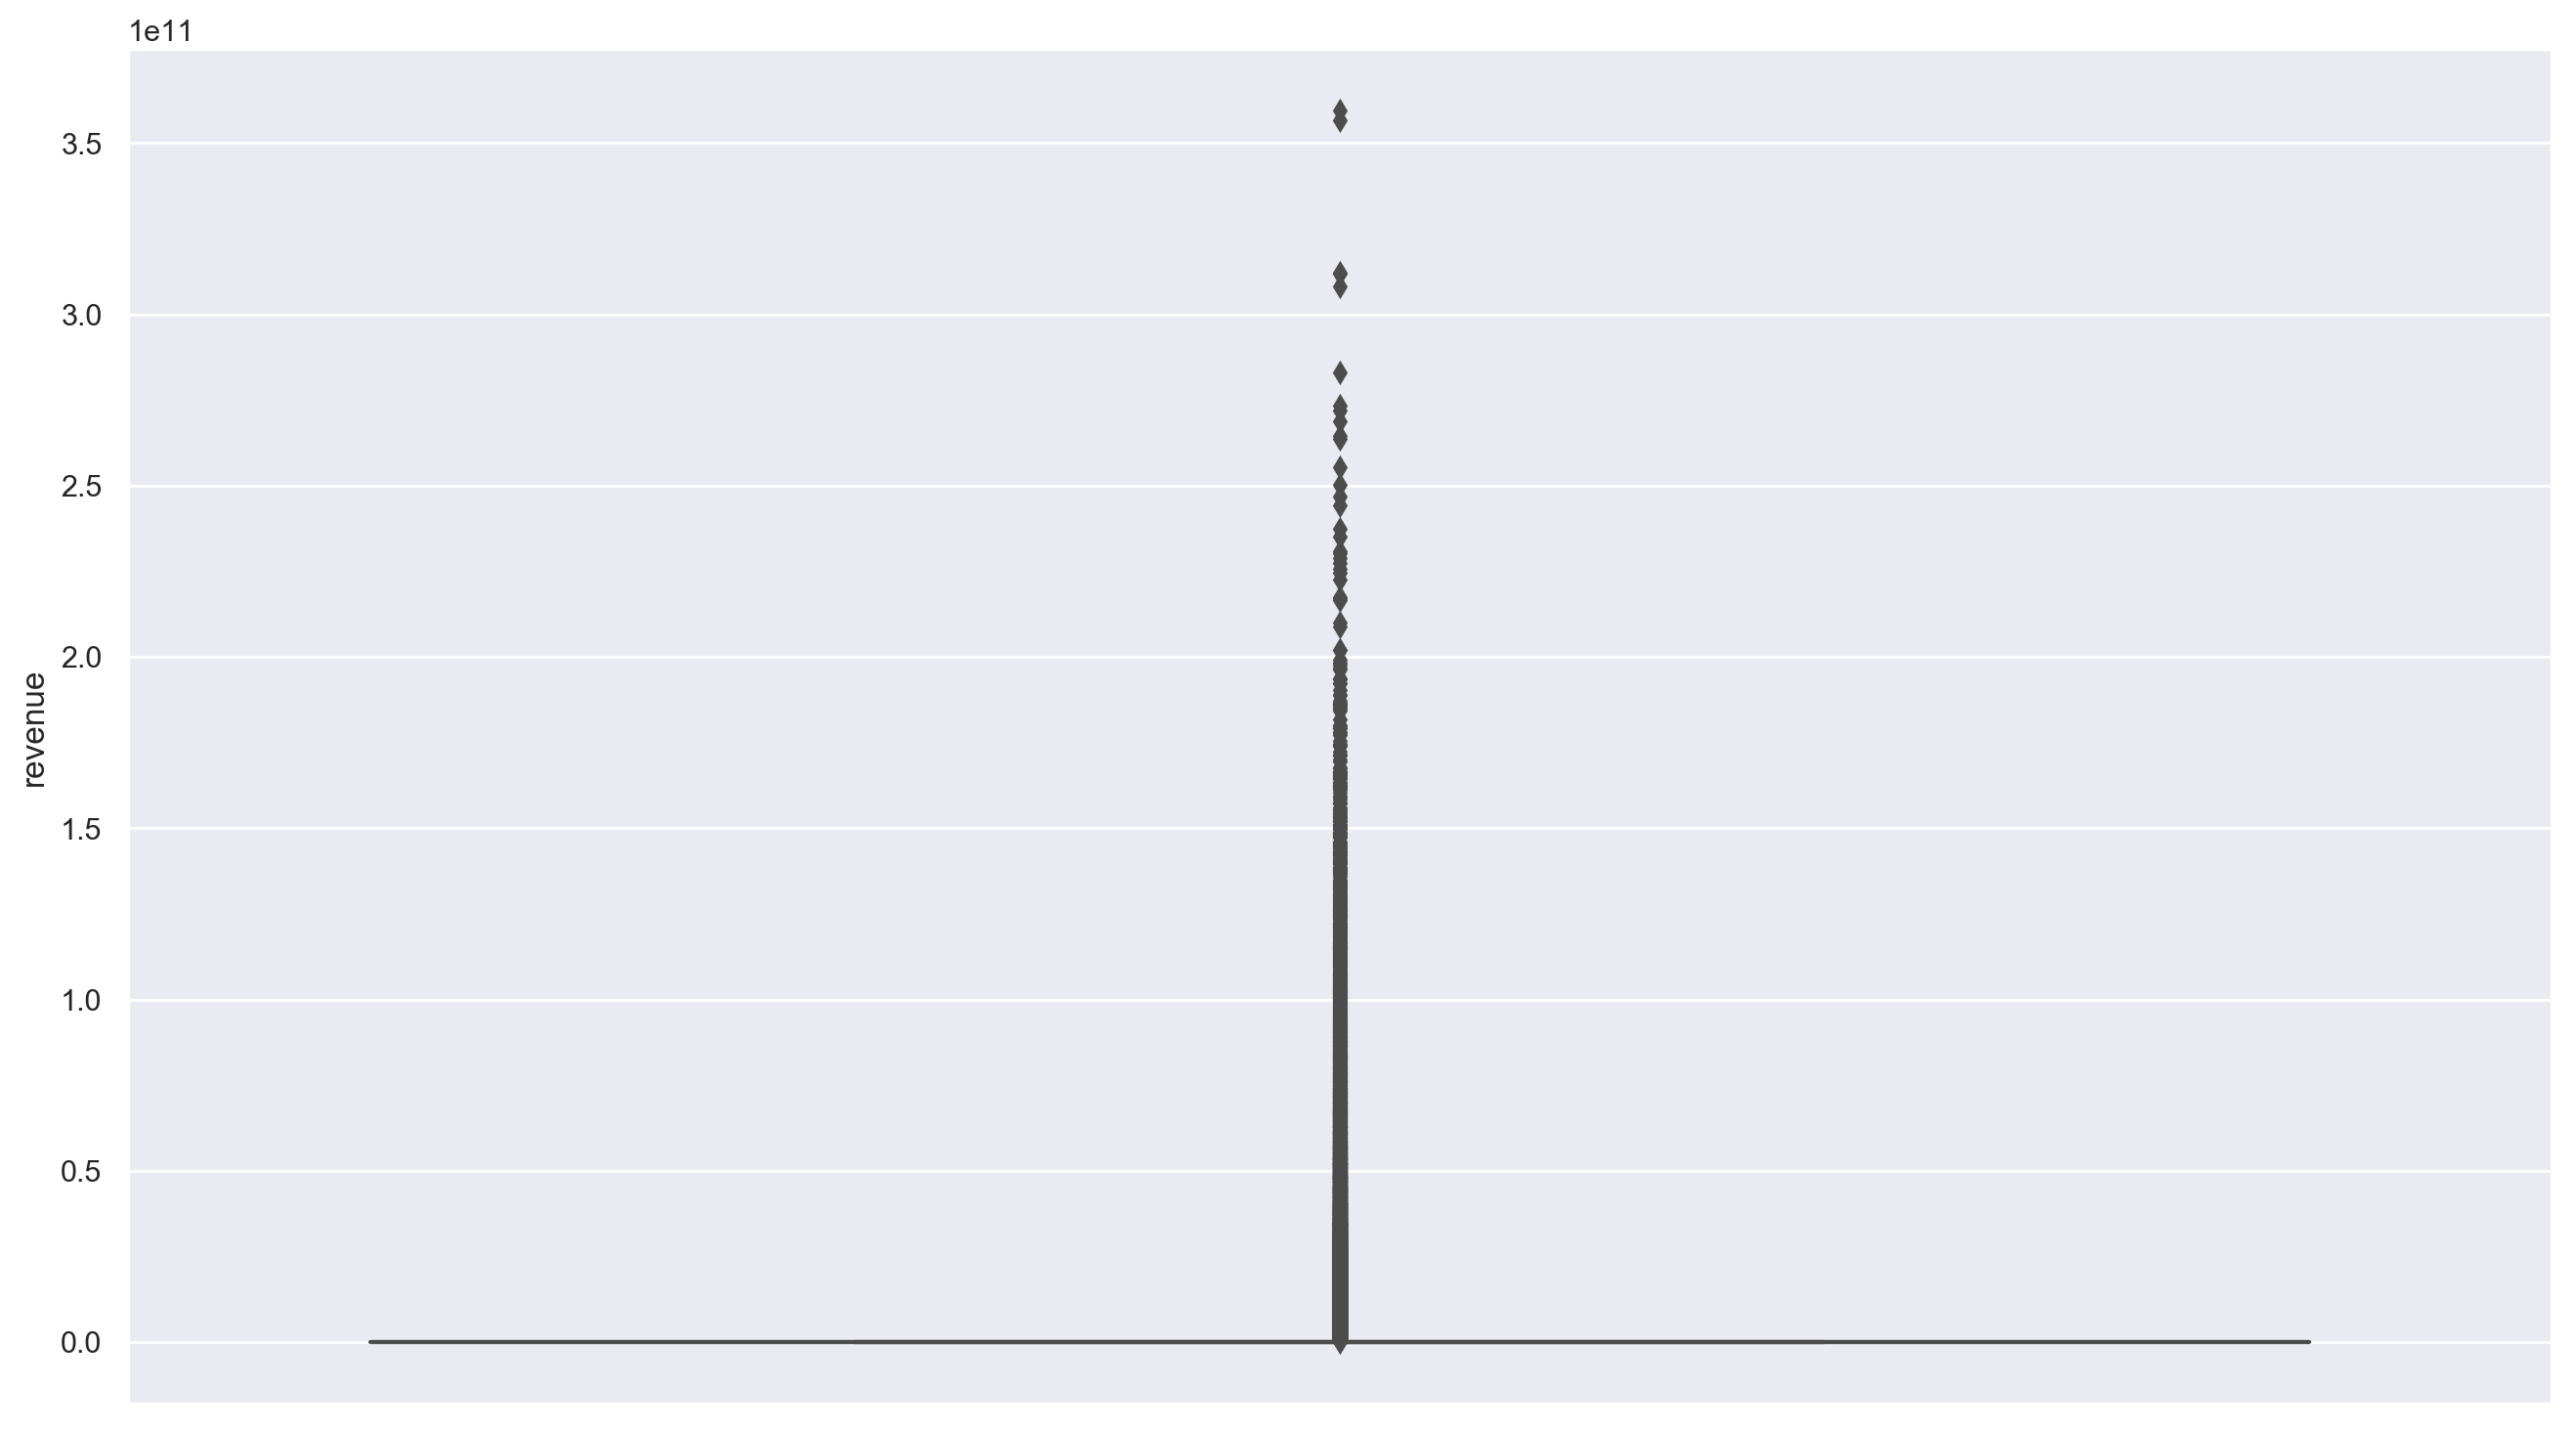

In [204]:
# üst sınır belirledigi cizginin üstünde outliers var
sns.boxplot(x=df["revenue"],orient="v");

In [ ]:
## Boxplots ##

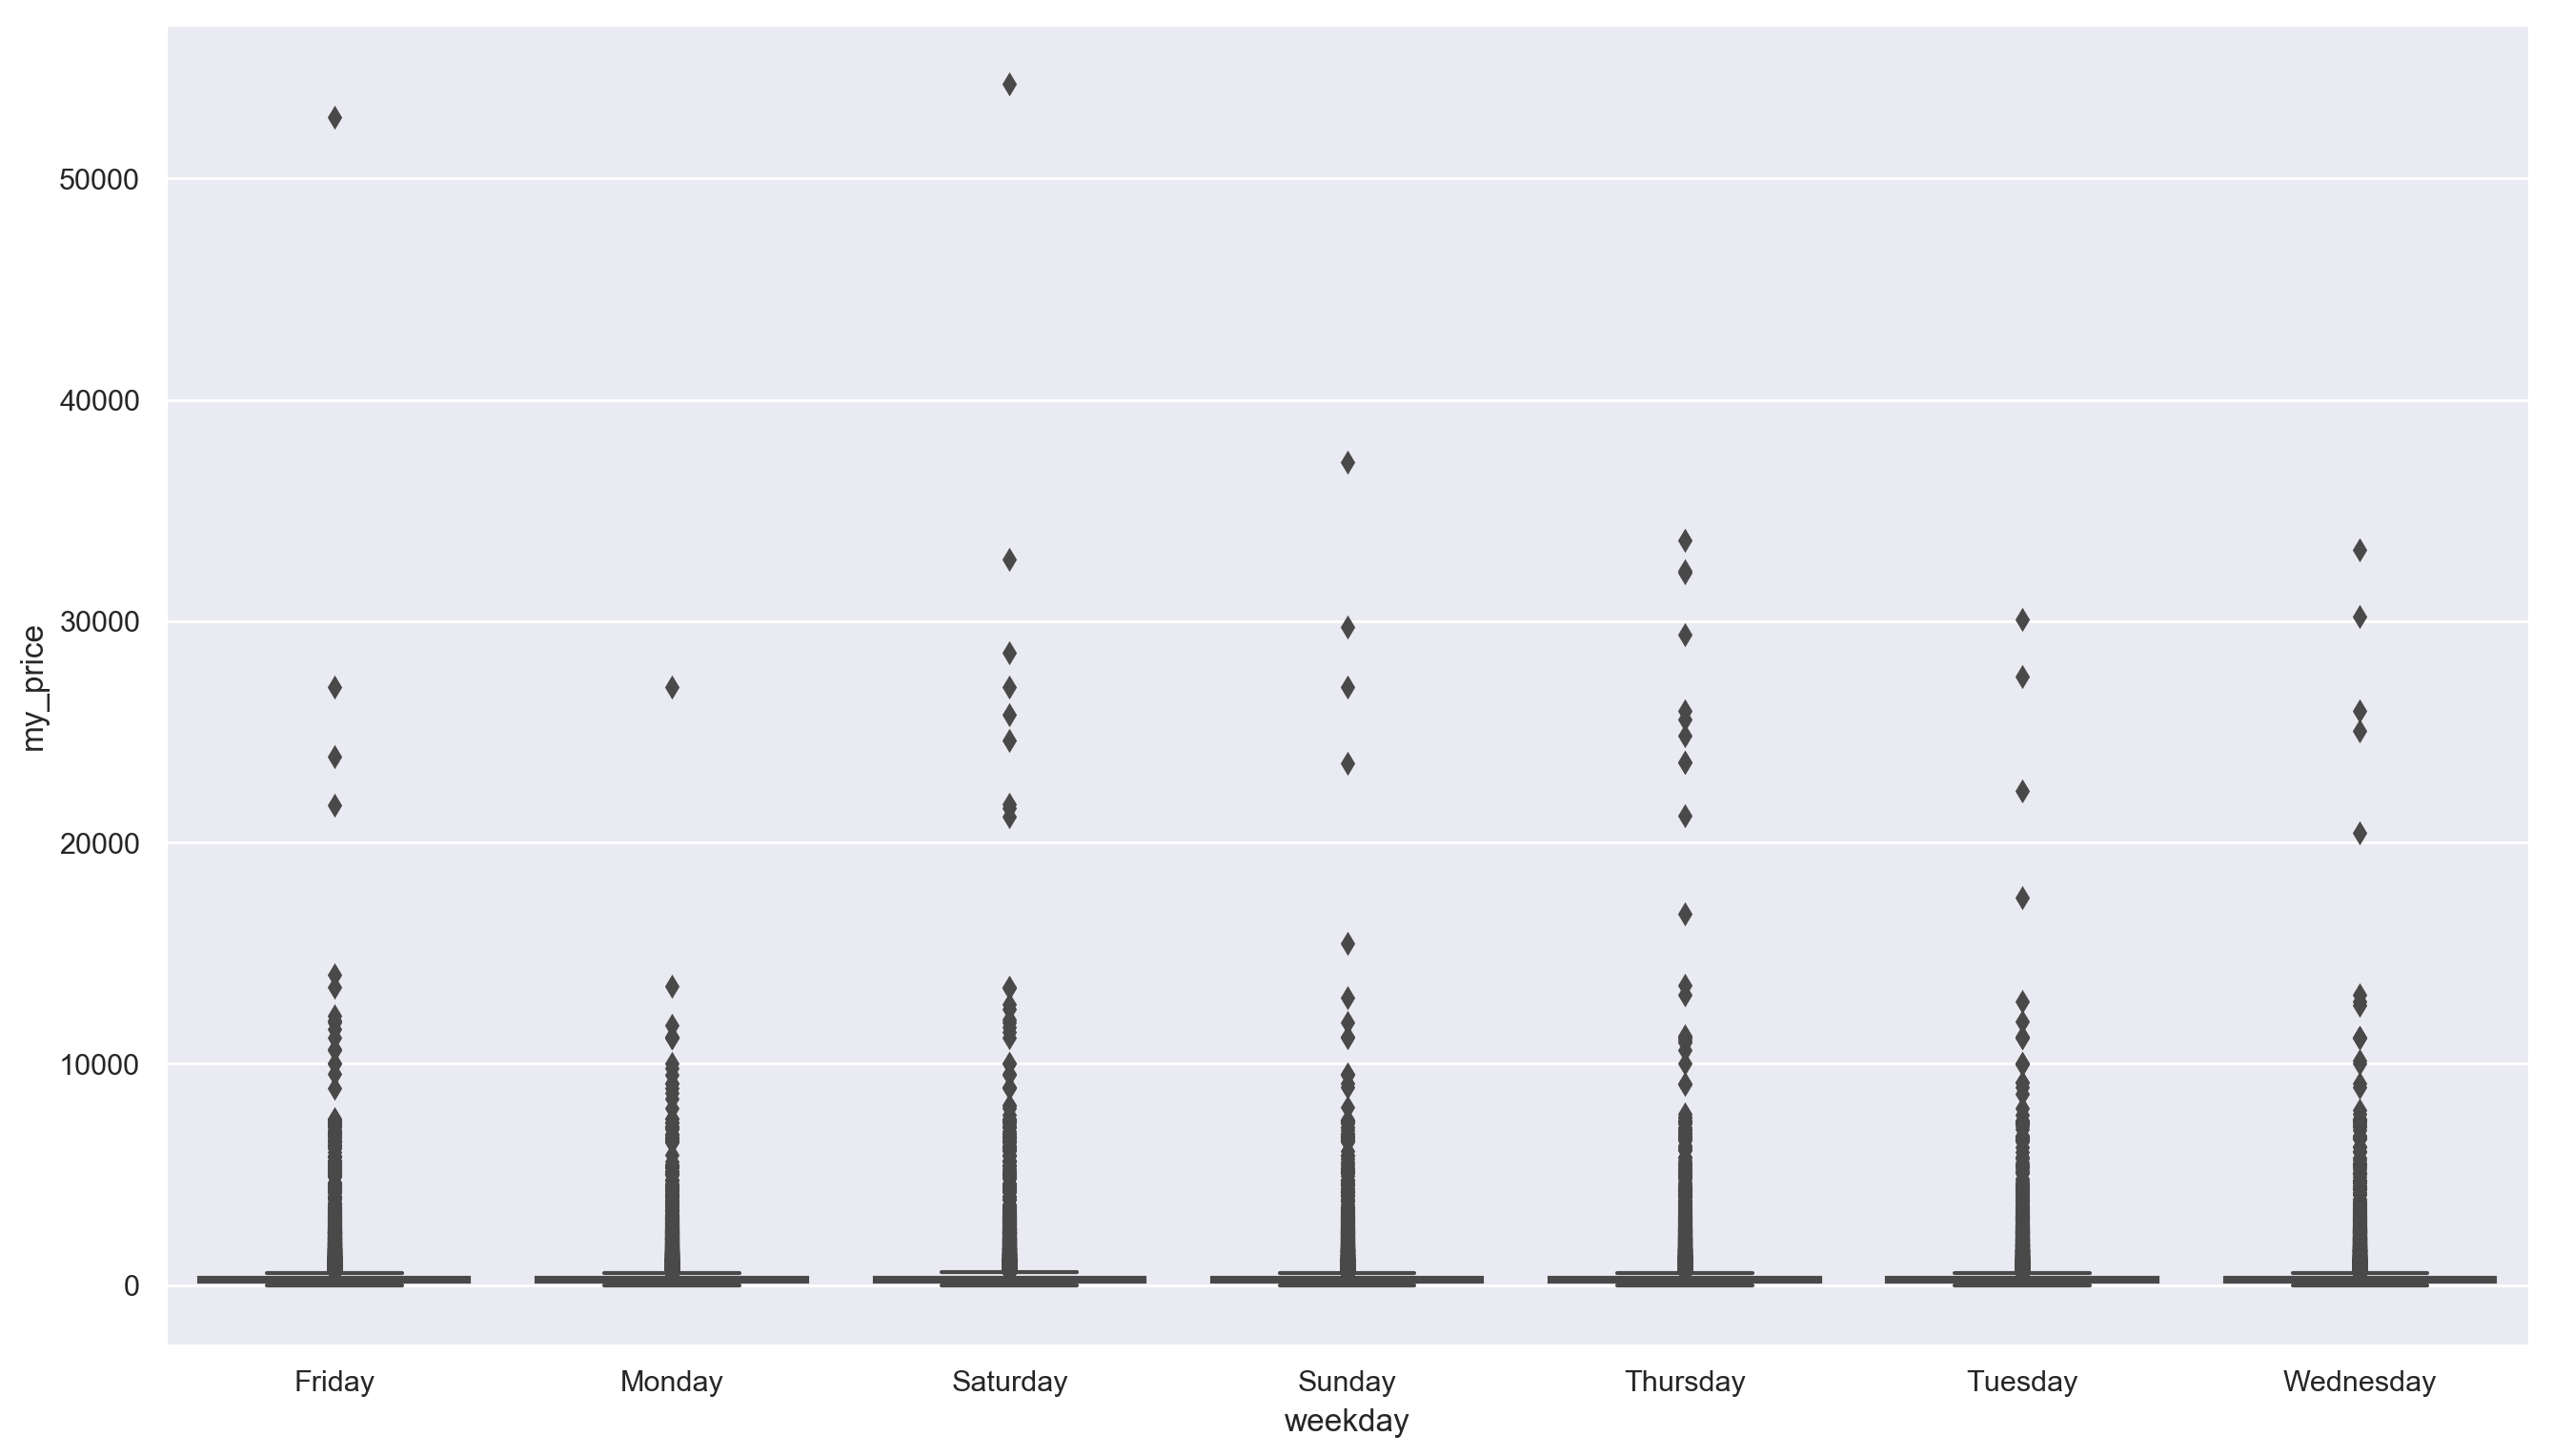

In [207]:
# Which days got more price
sns.boxplot(x="weekday", y="my_price", data=df)

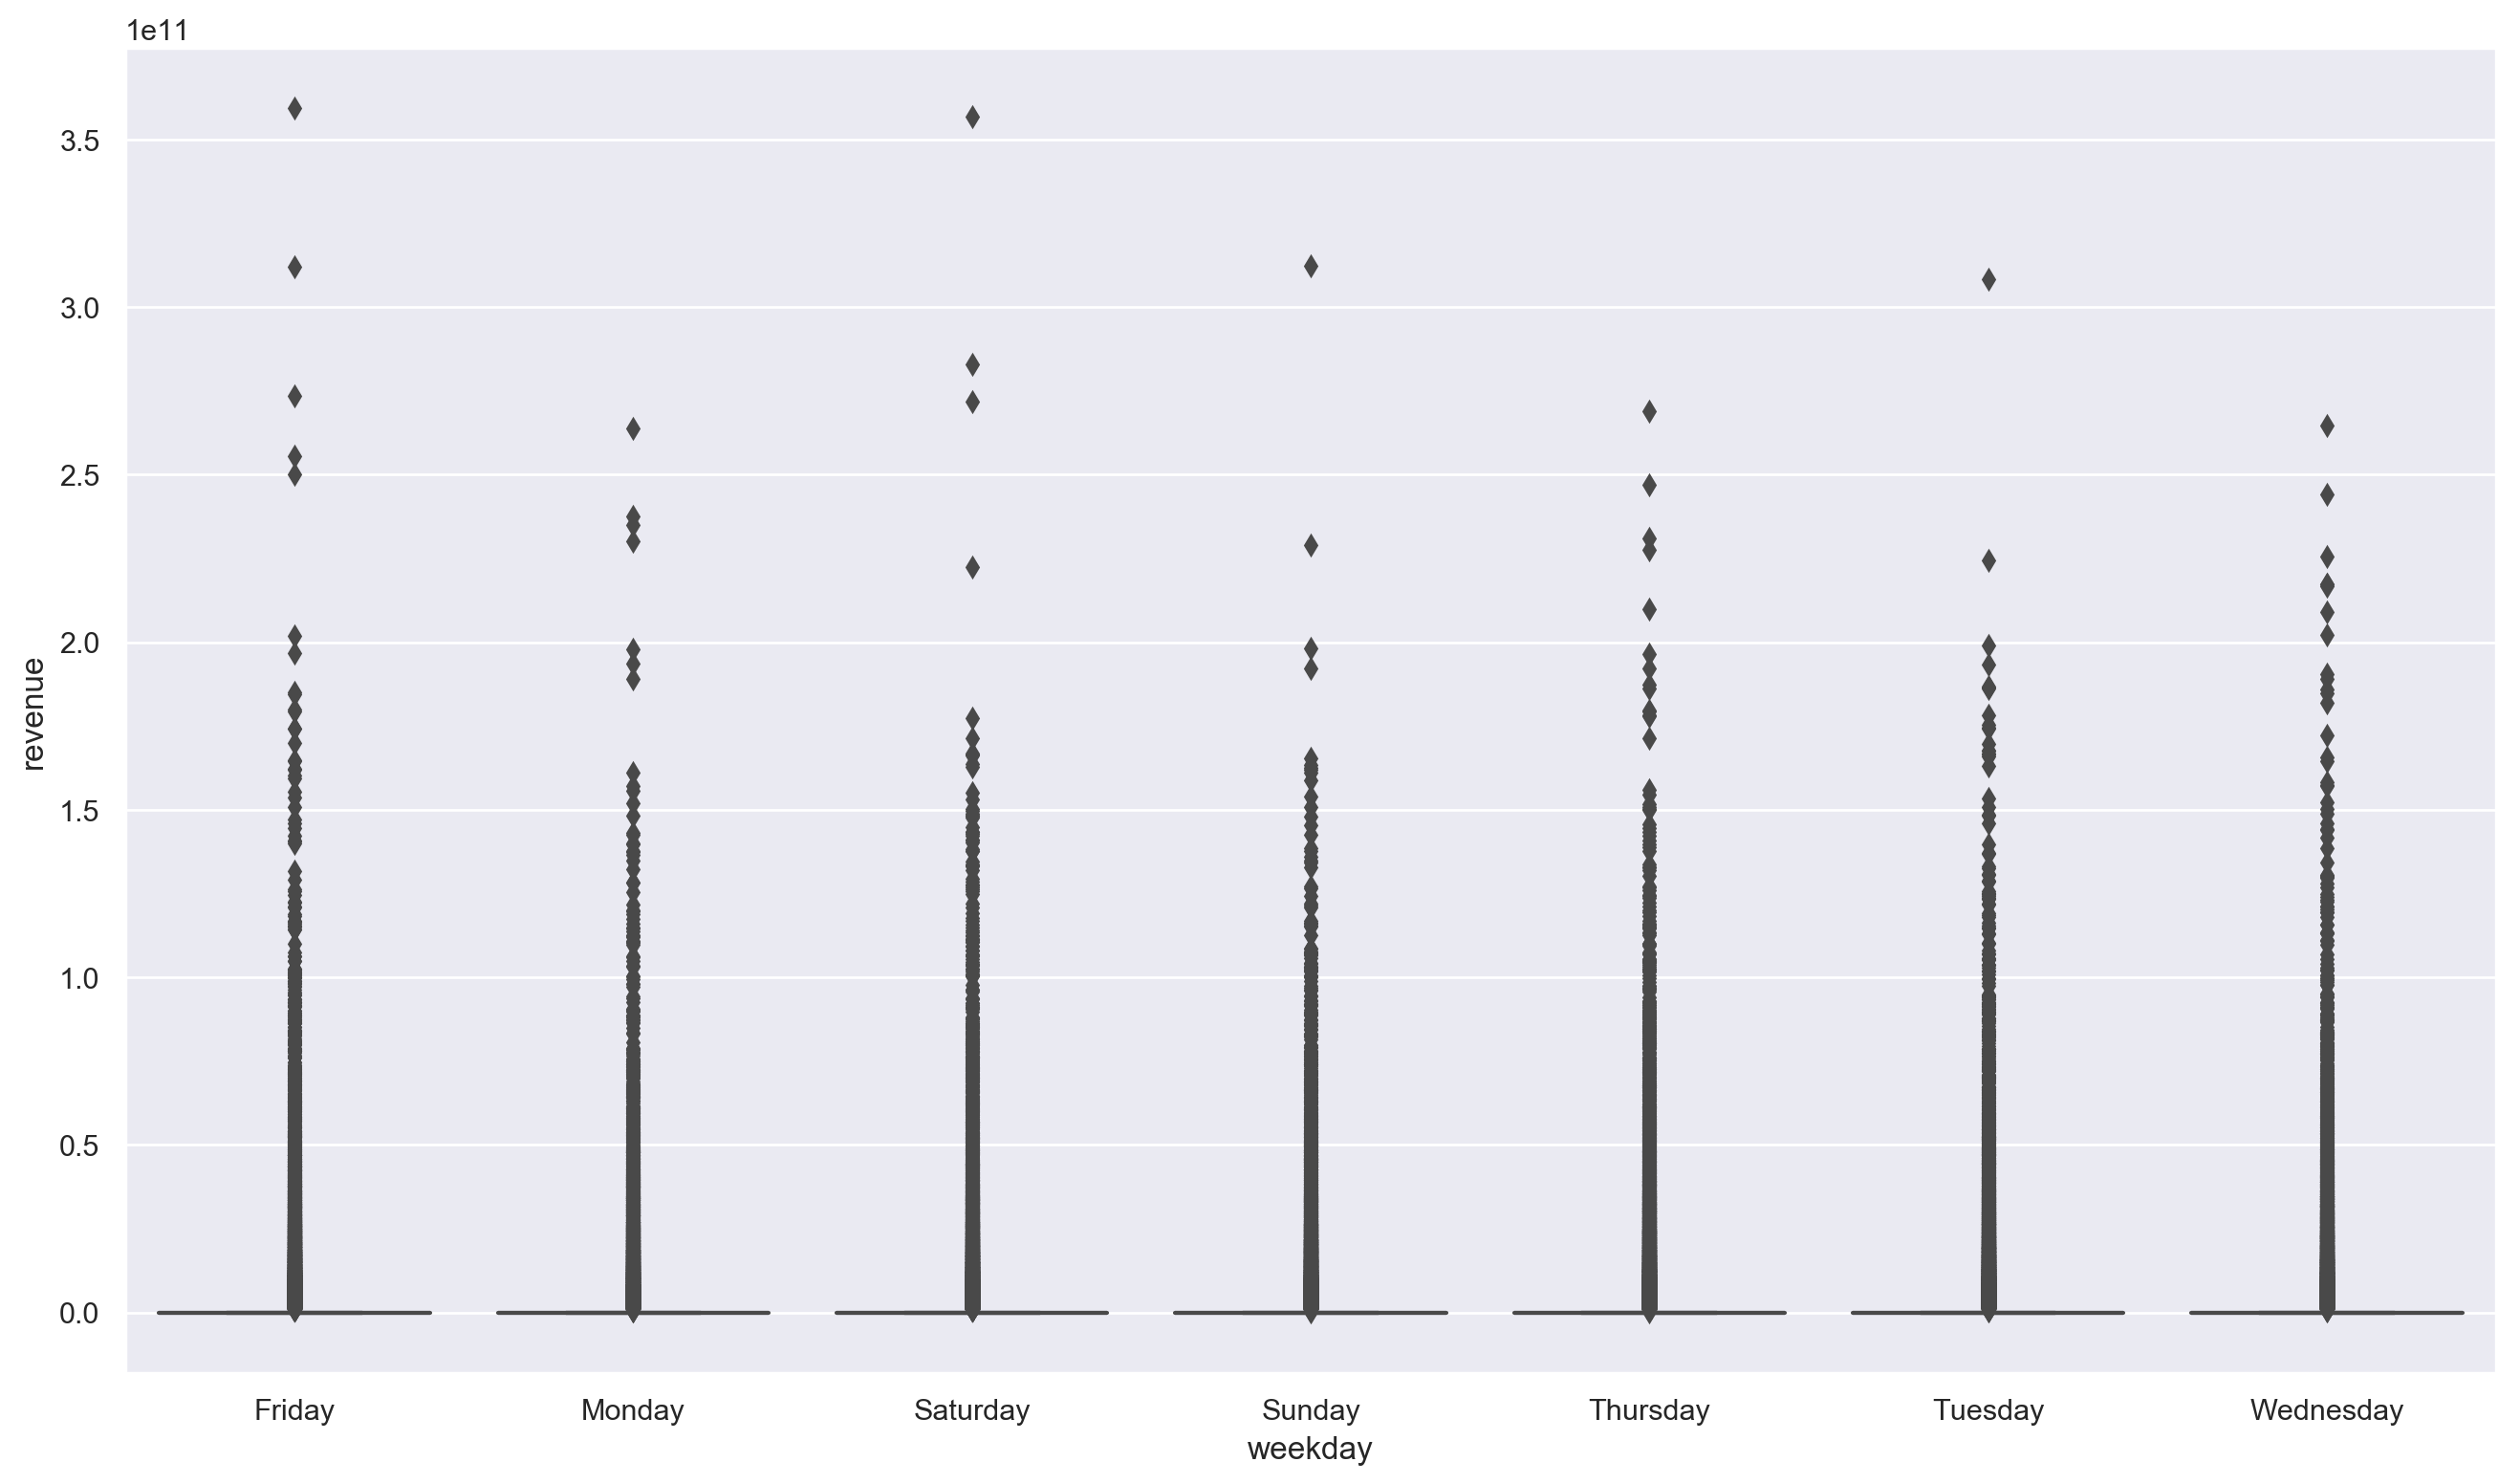

In [208]:
# Which days got more revenue
sns.boxplot(x="weekday", y="revenue", data=df)

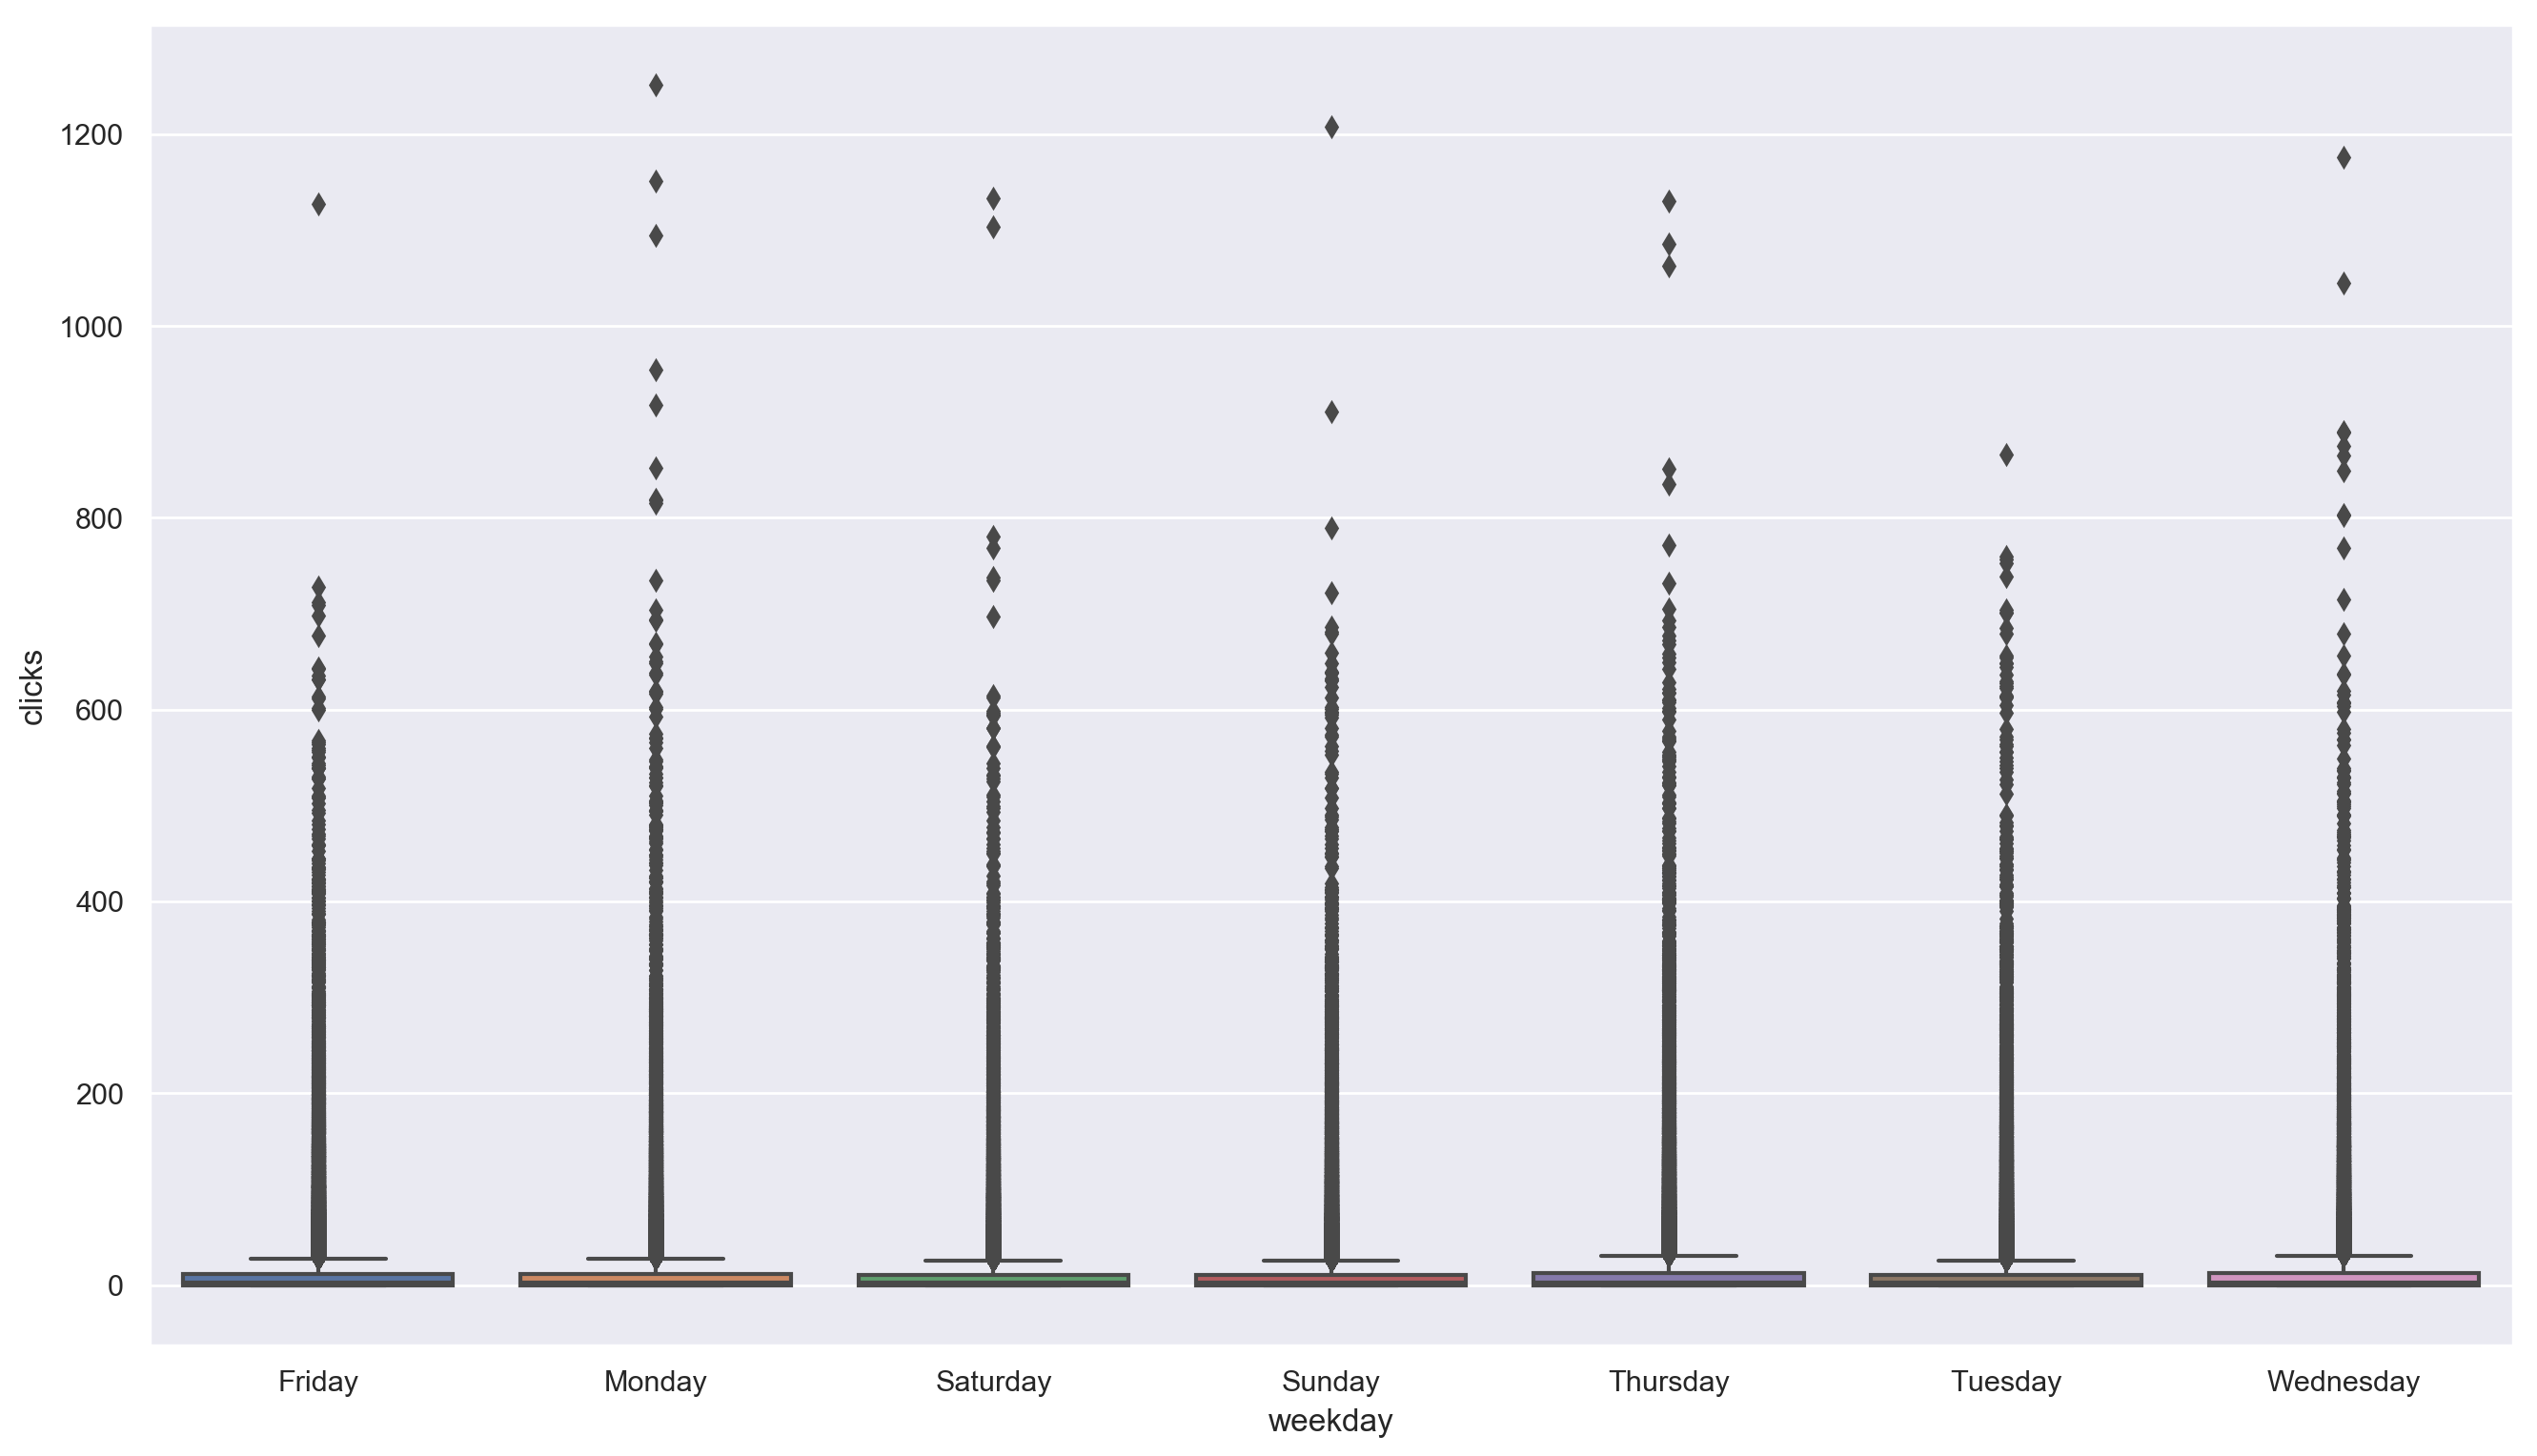

In [209]:
# Which days got more clicks
sns.boxplot(x="weekday", y="clicks", data=df)

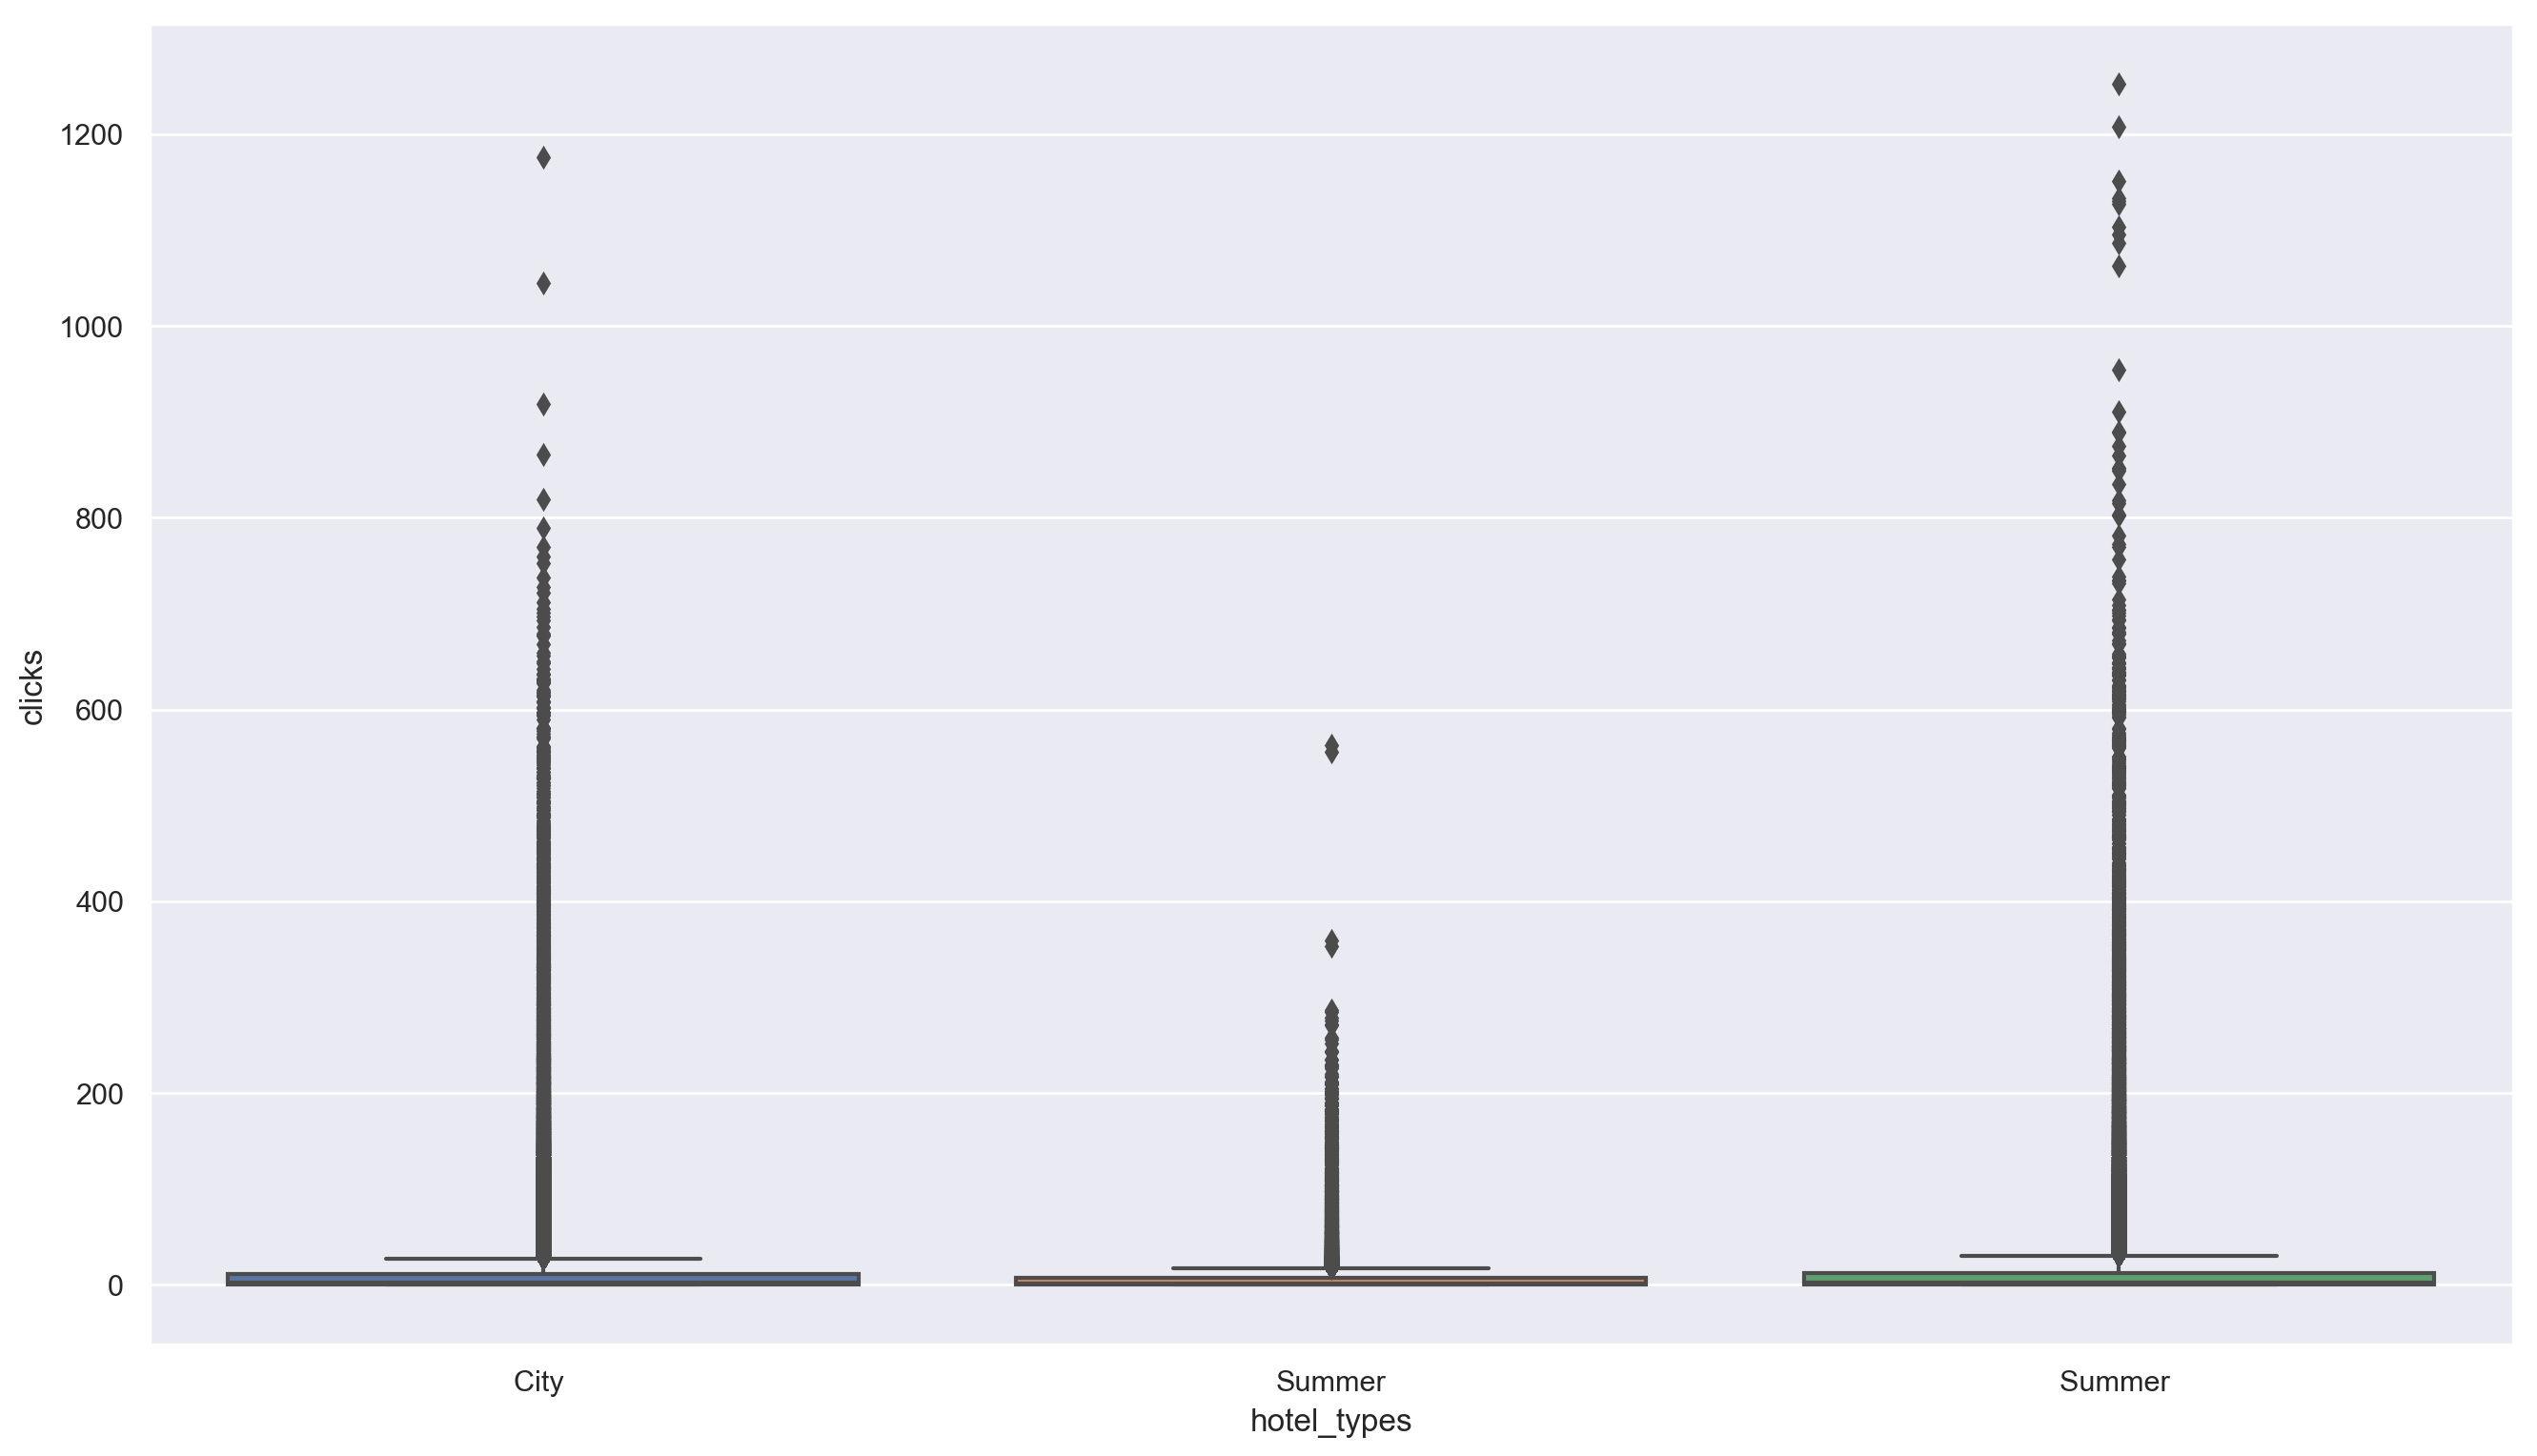

In [211]:
# Which hotel types got more click
sns.boxplot(x="hotel_types", y="clicks", data=df)

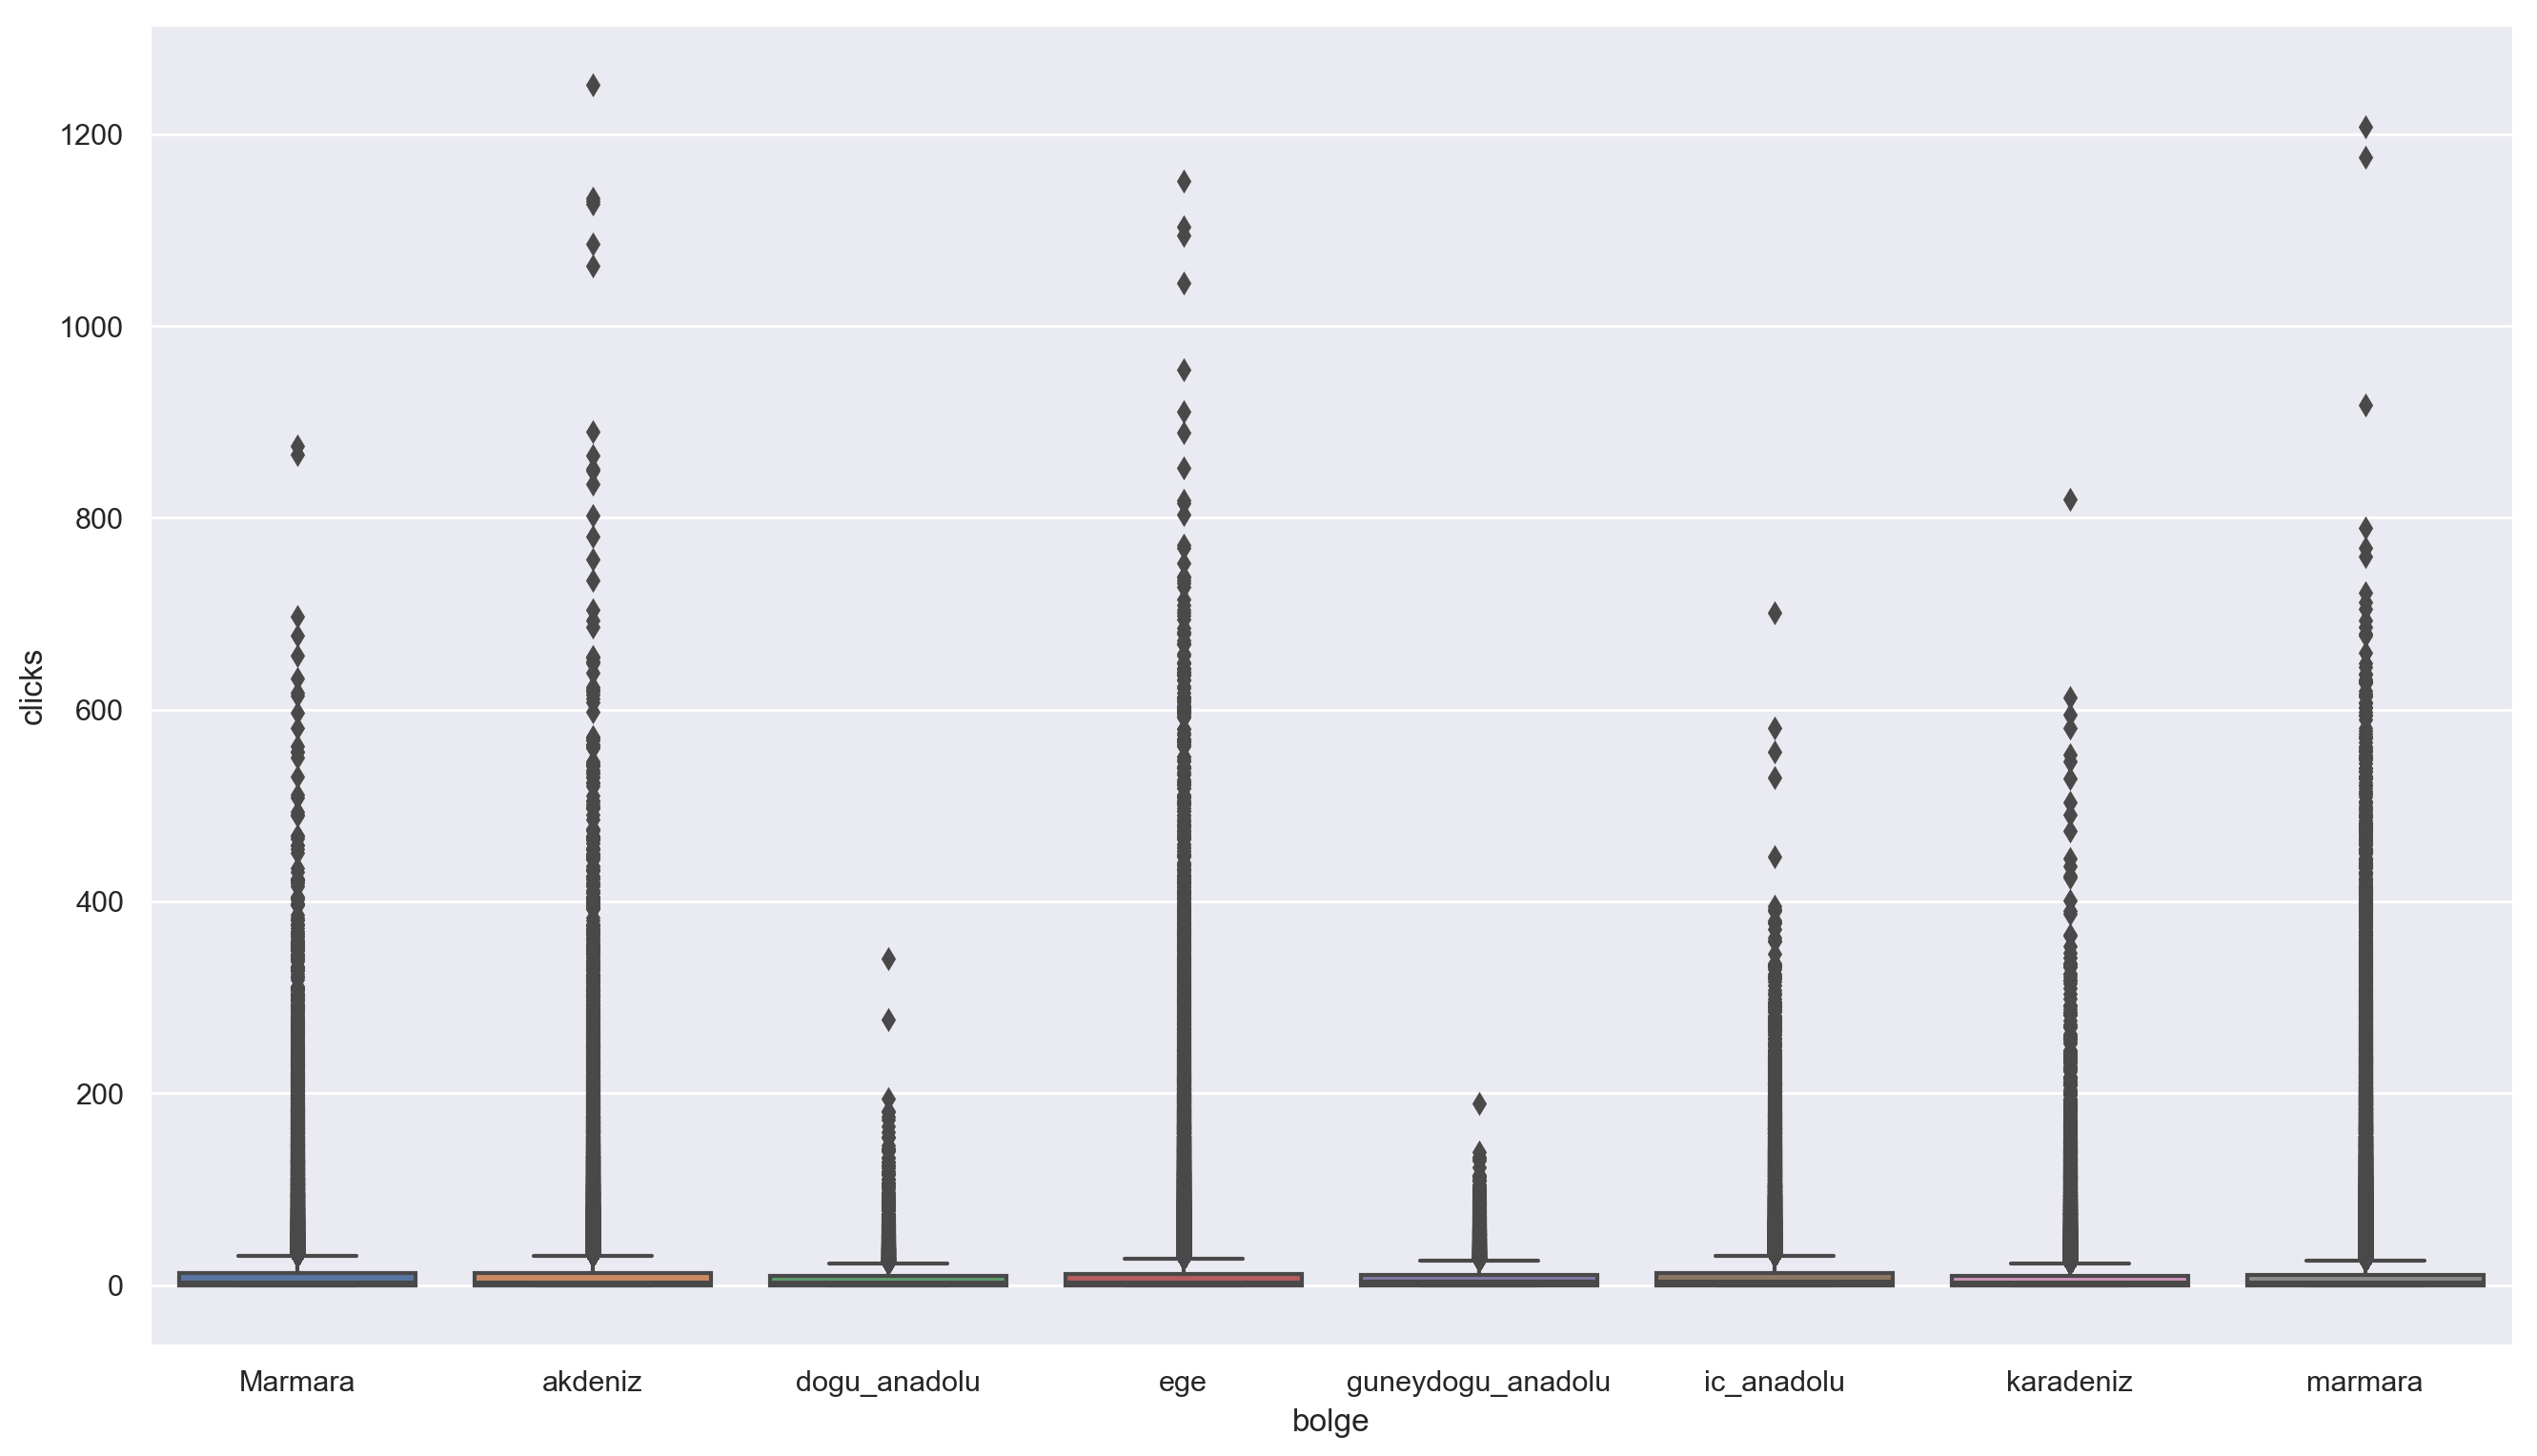

In [213]:
# Is there any raletion betweeen bolge and clicks?
sns.boxplot(x="bolge",y="clicks", data=df)

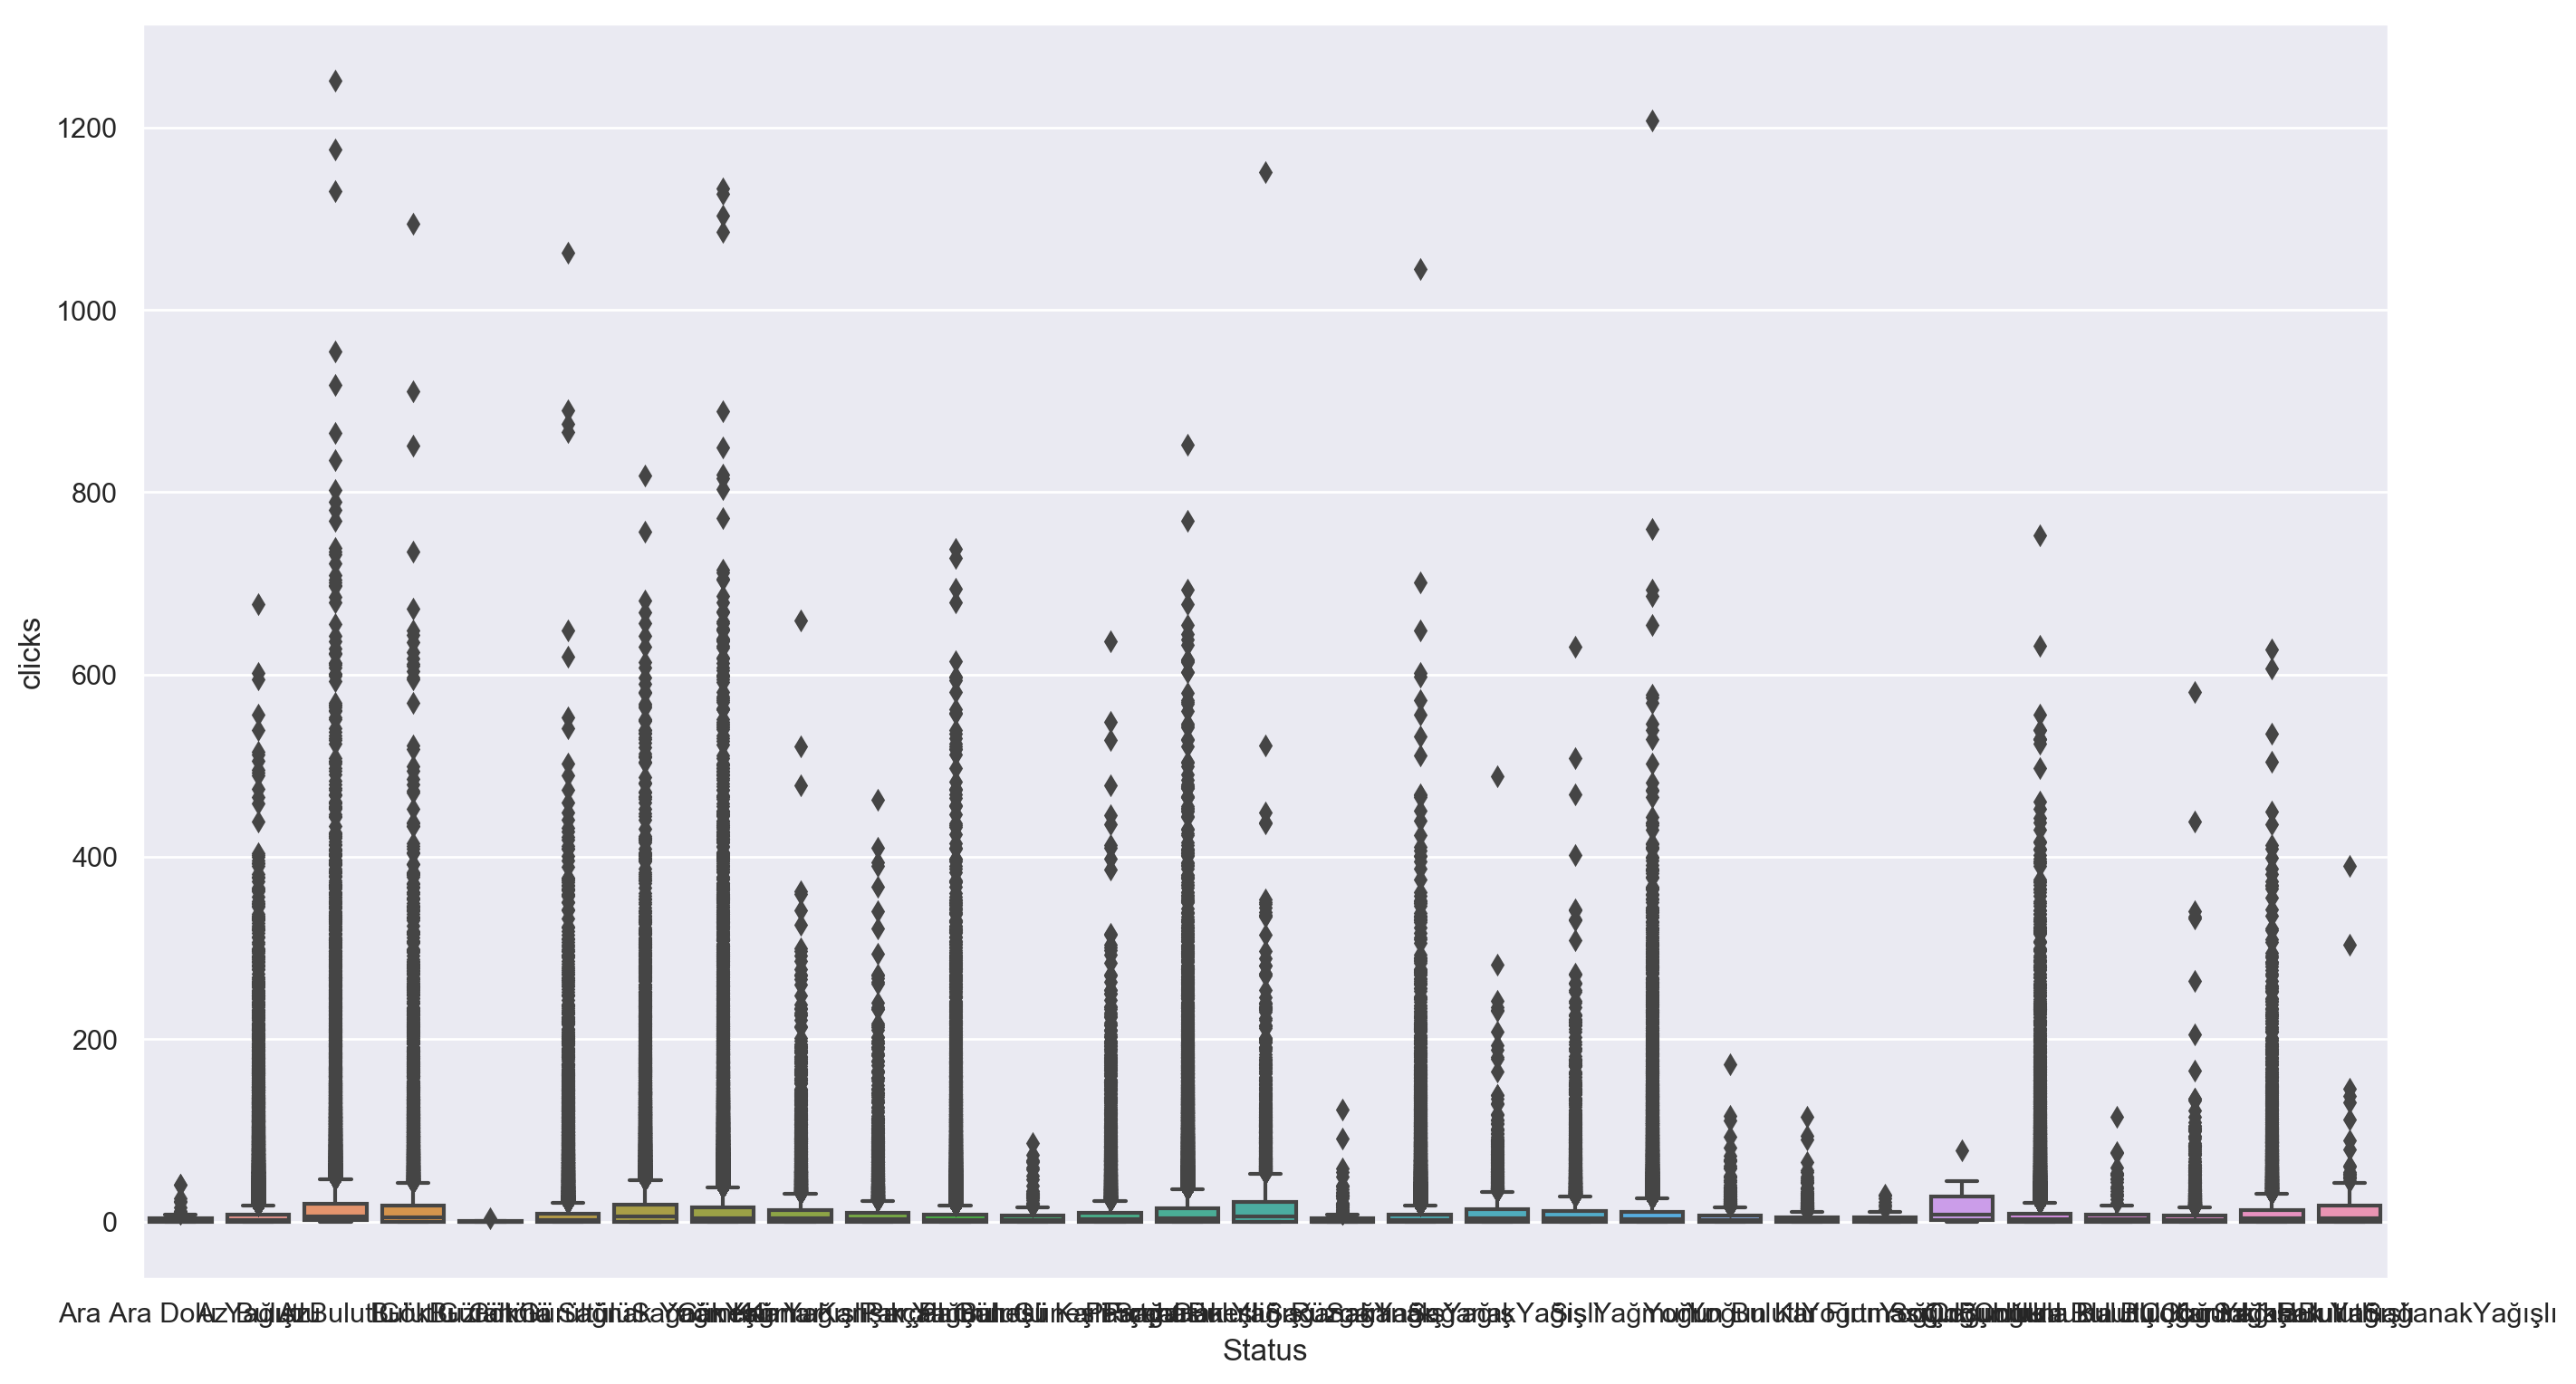

In [214]:
# Is there any raletion betweeen Status and clicks?
sns.boxplot(x="Status",y="clicks", data=df)

In [239]:
## Interaction Between Variables ##

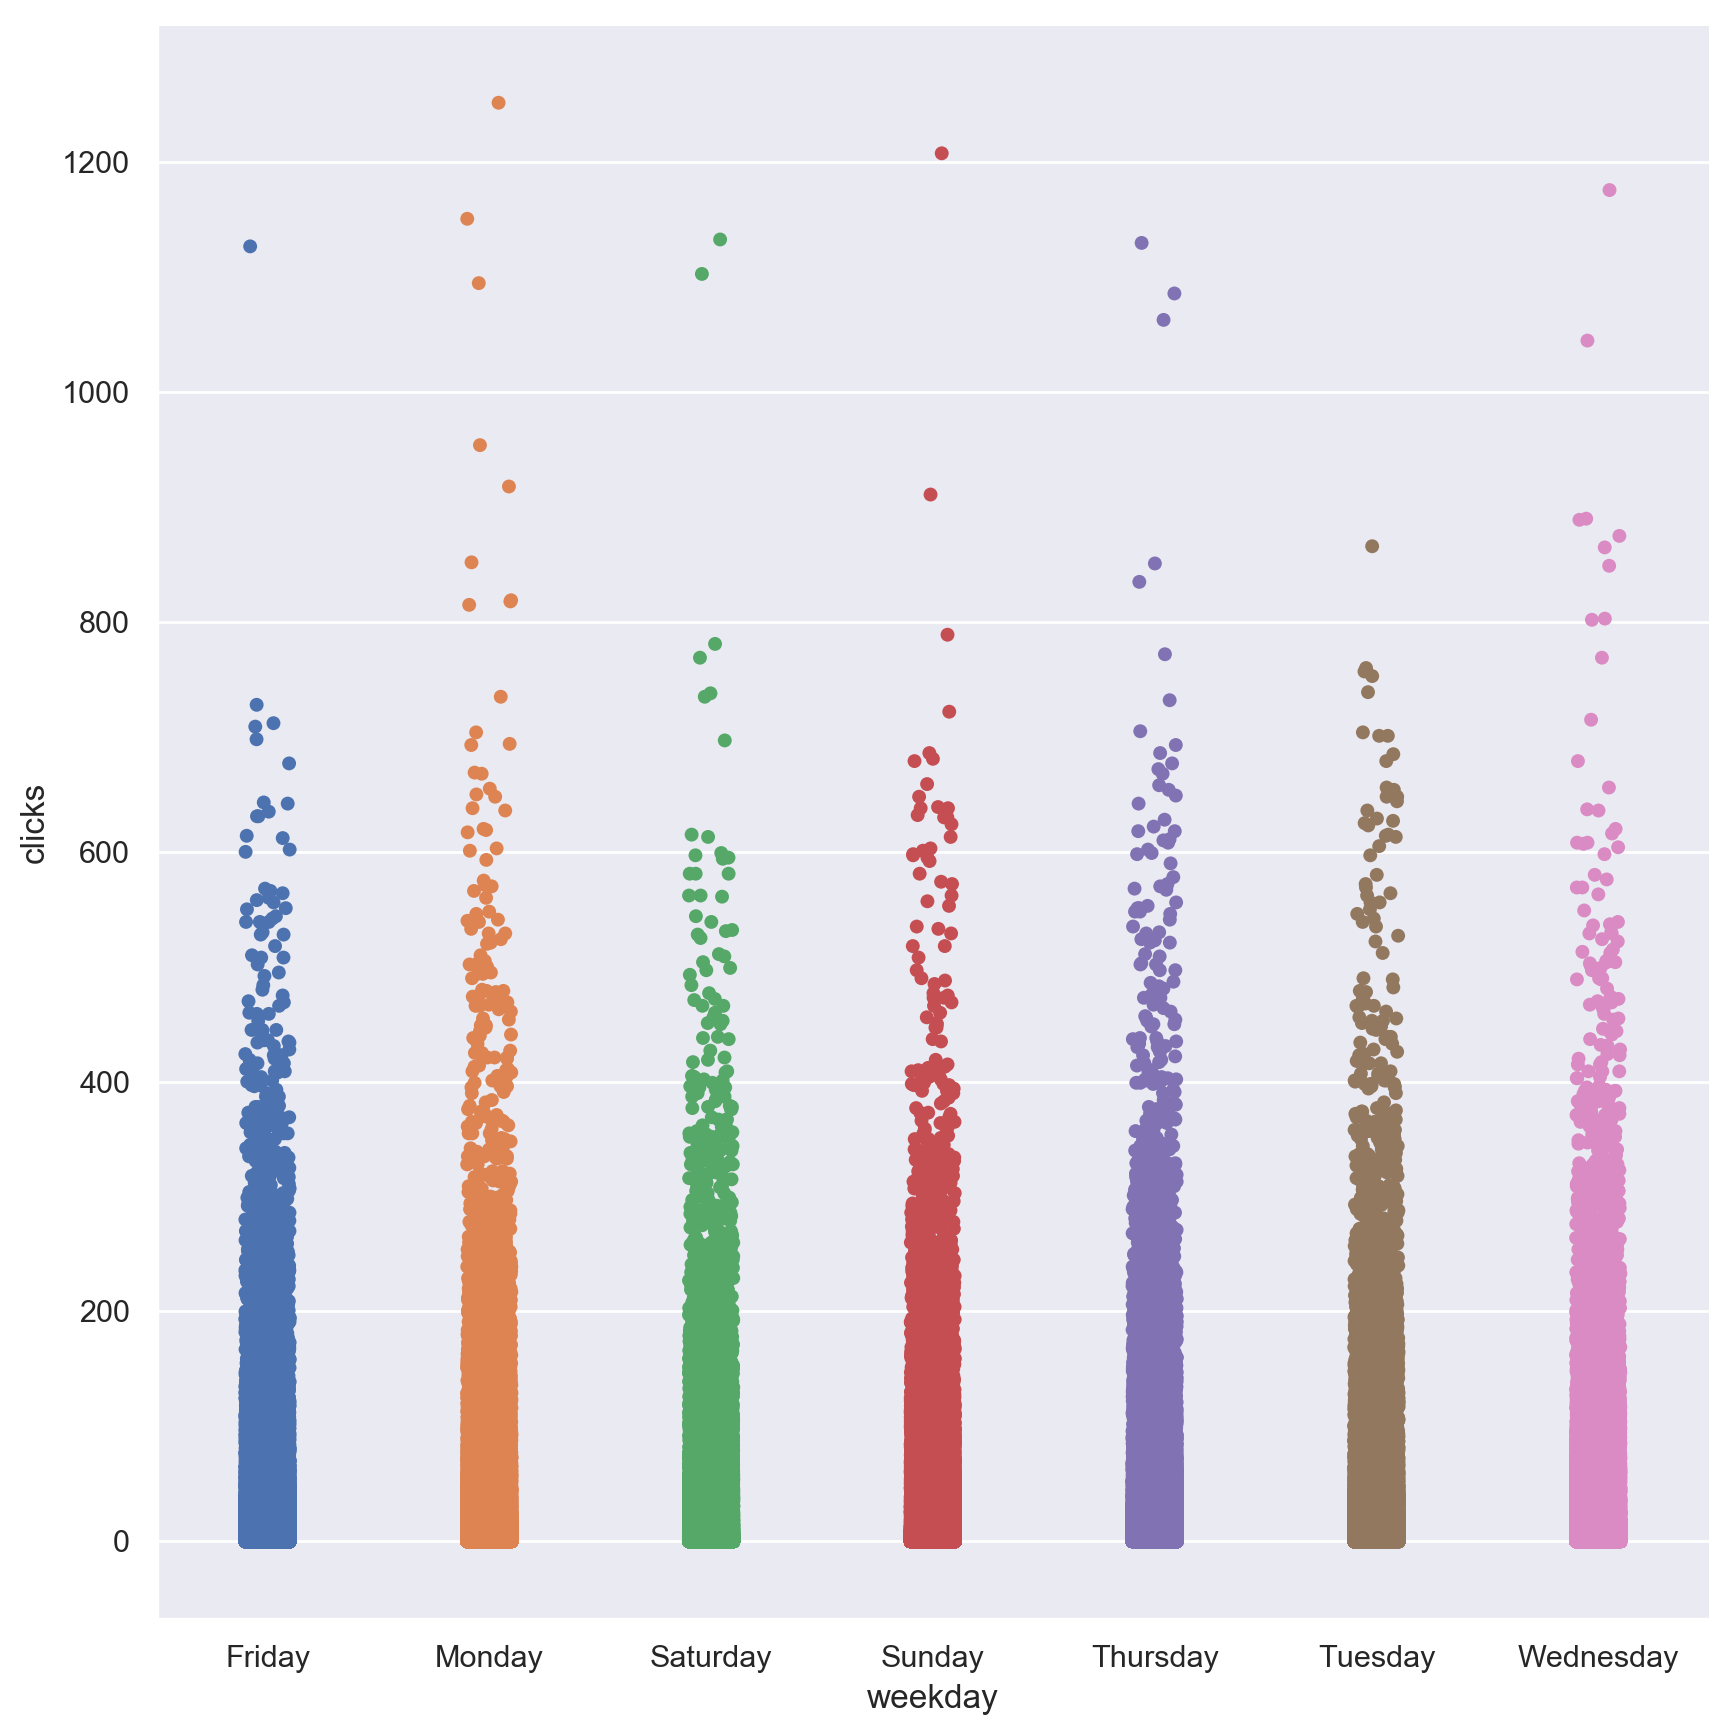

In [237]:
sns.catplot(x="weekday",y="clicks", data = df,height = 10)

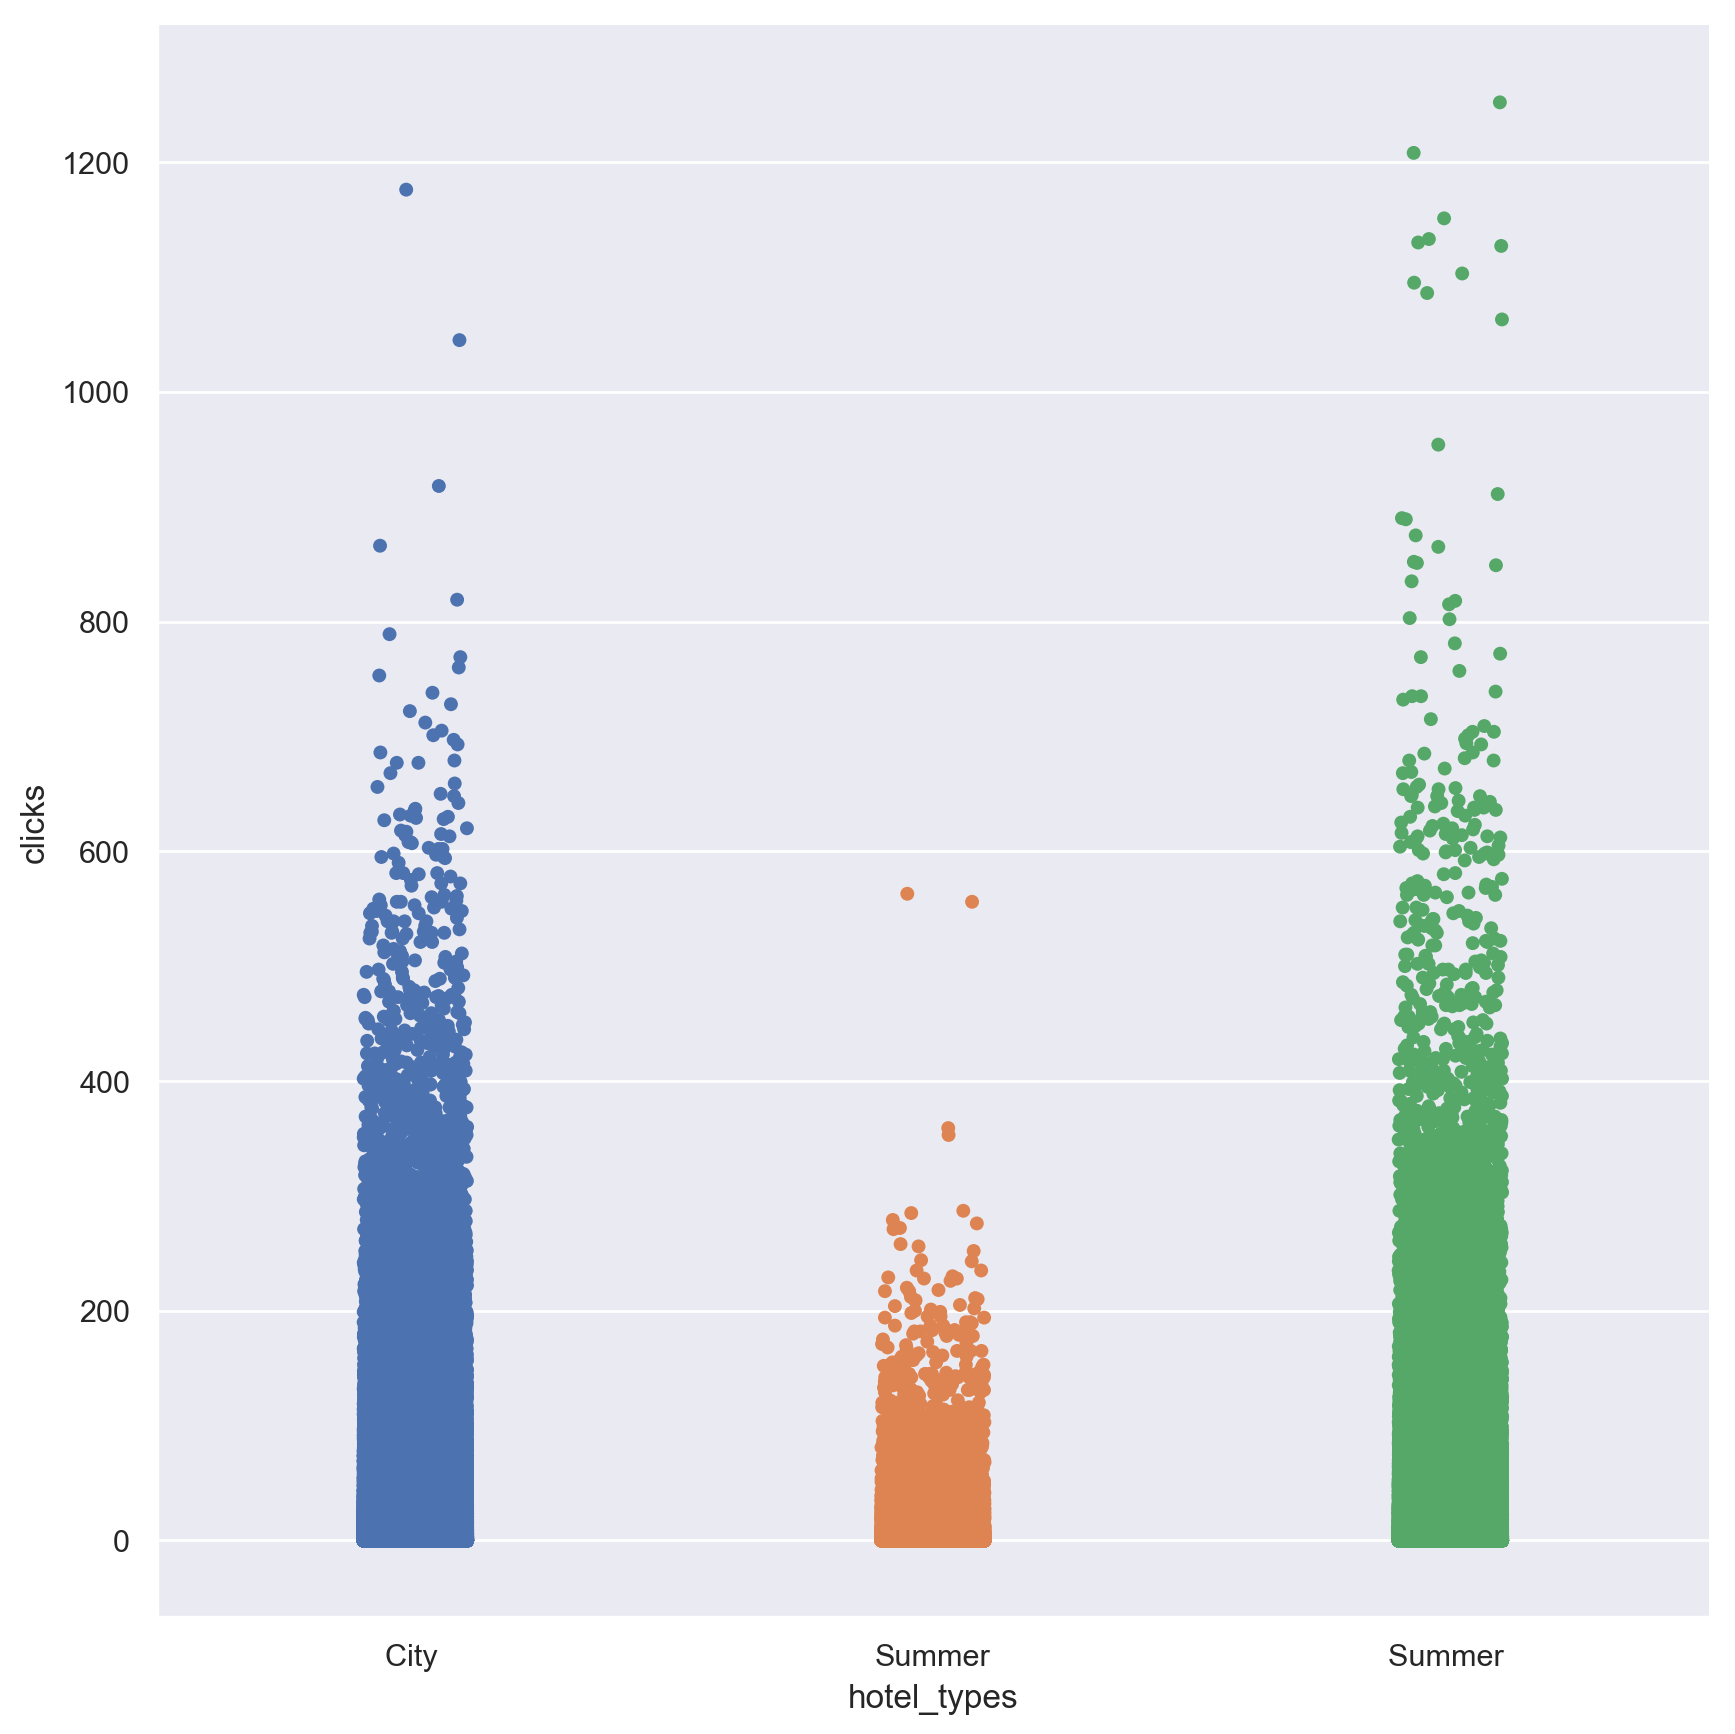

In [222]:
sns.catplot(x="hotel_types",y="clicks", data = df,height = 10)

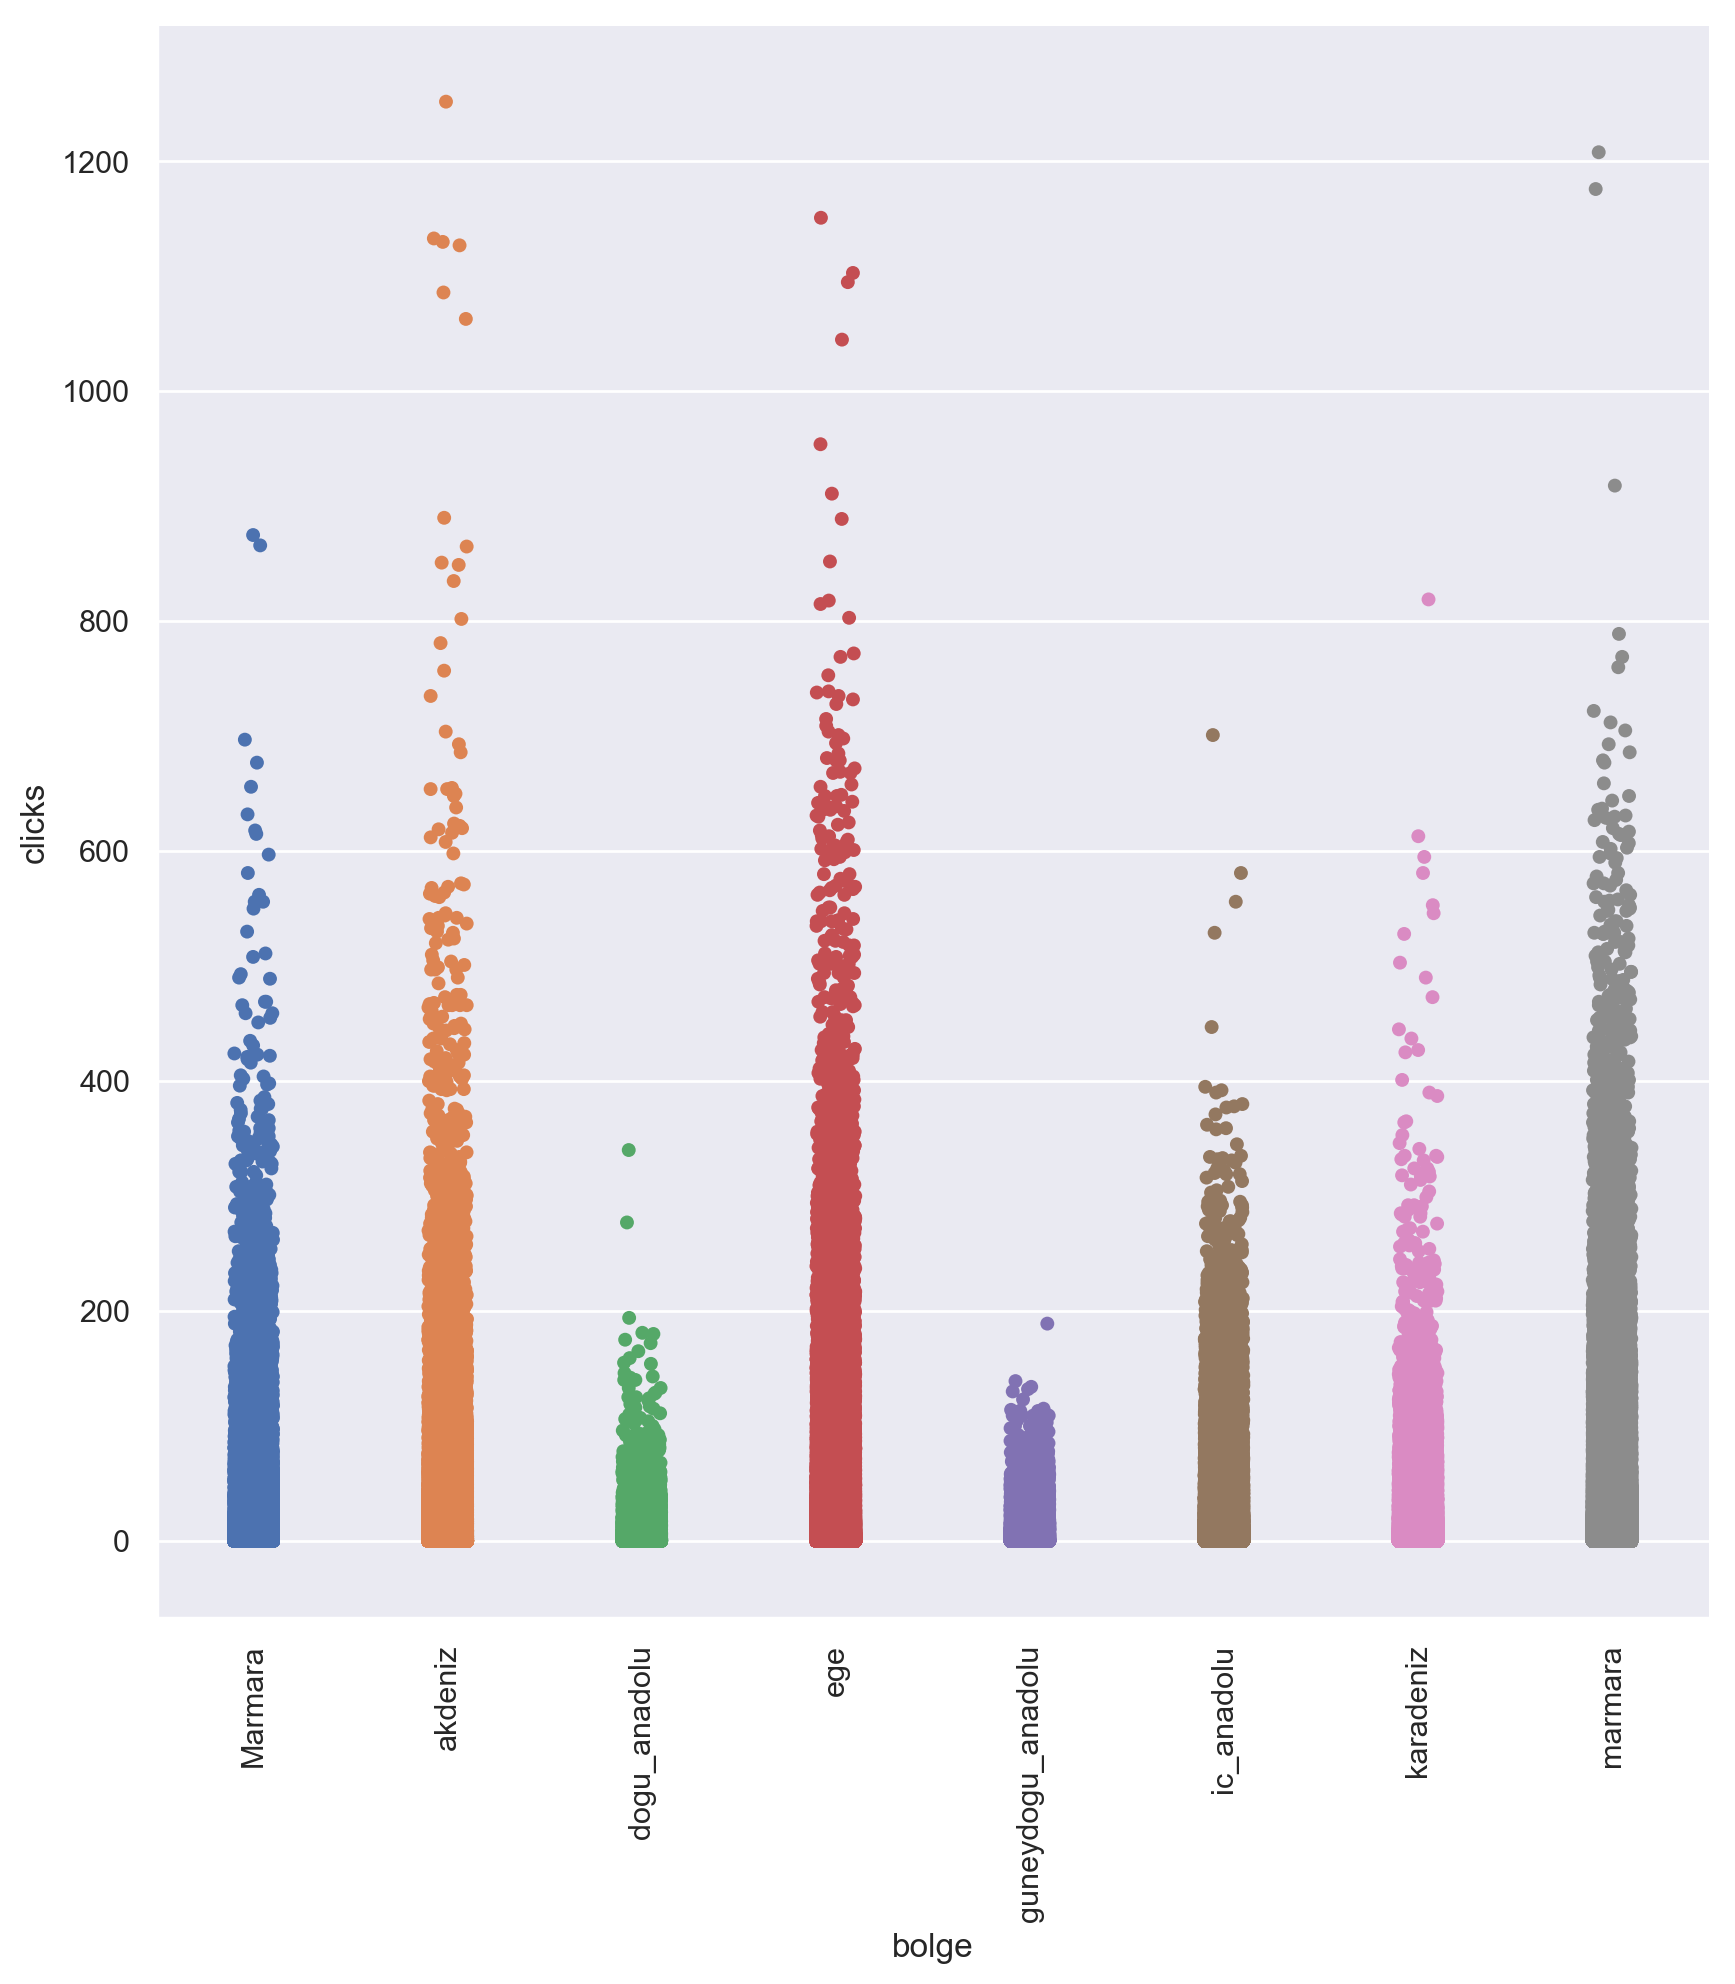

In [238]:
g = sns.catplot(x="bolge",y="clicks", data = df,height = 10)
g.set_xticklabels(rotation=90)

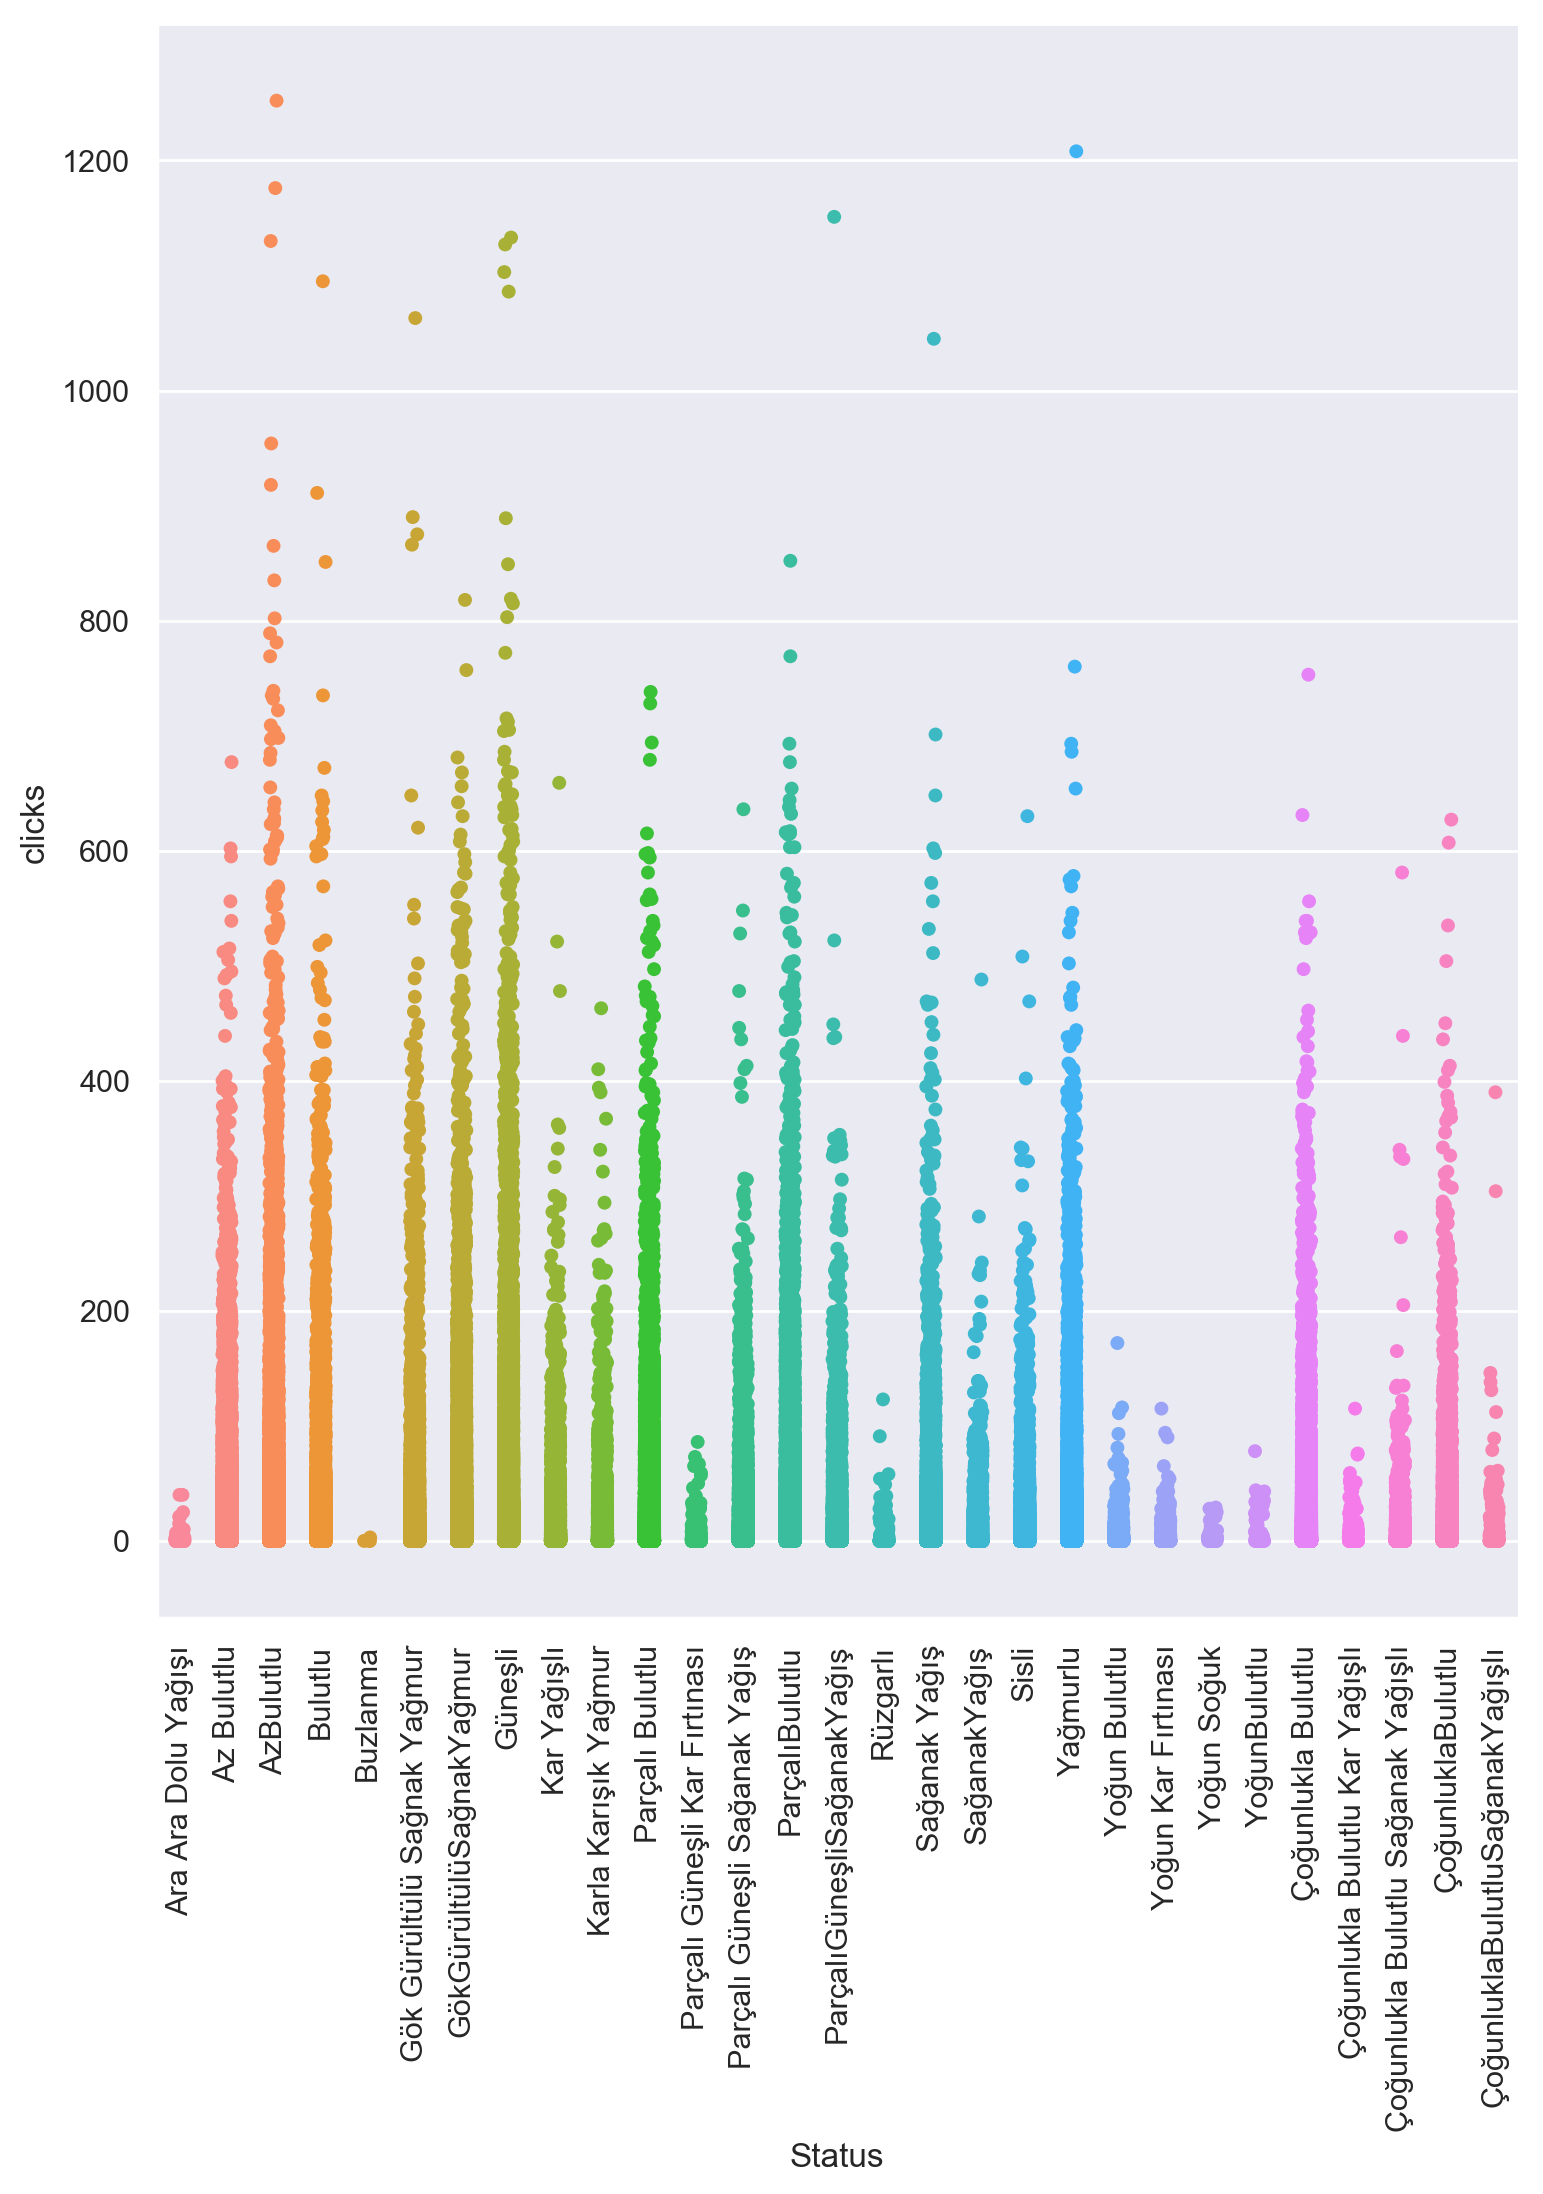

In [233]:
g = sns.catplot(x="Status",y="clicks", data = df,height = 10)
g.set_xticklabels(rotation=90)

In [ ]:
## Distrubution Plots ##

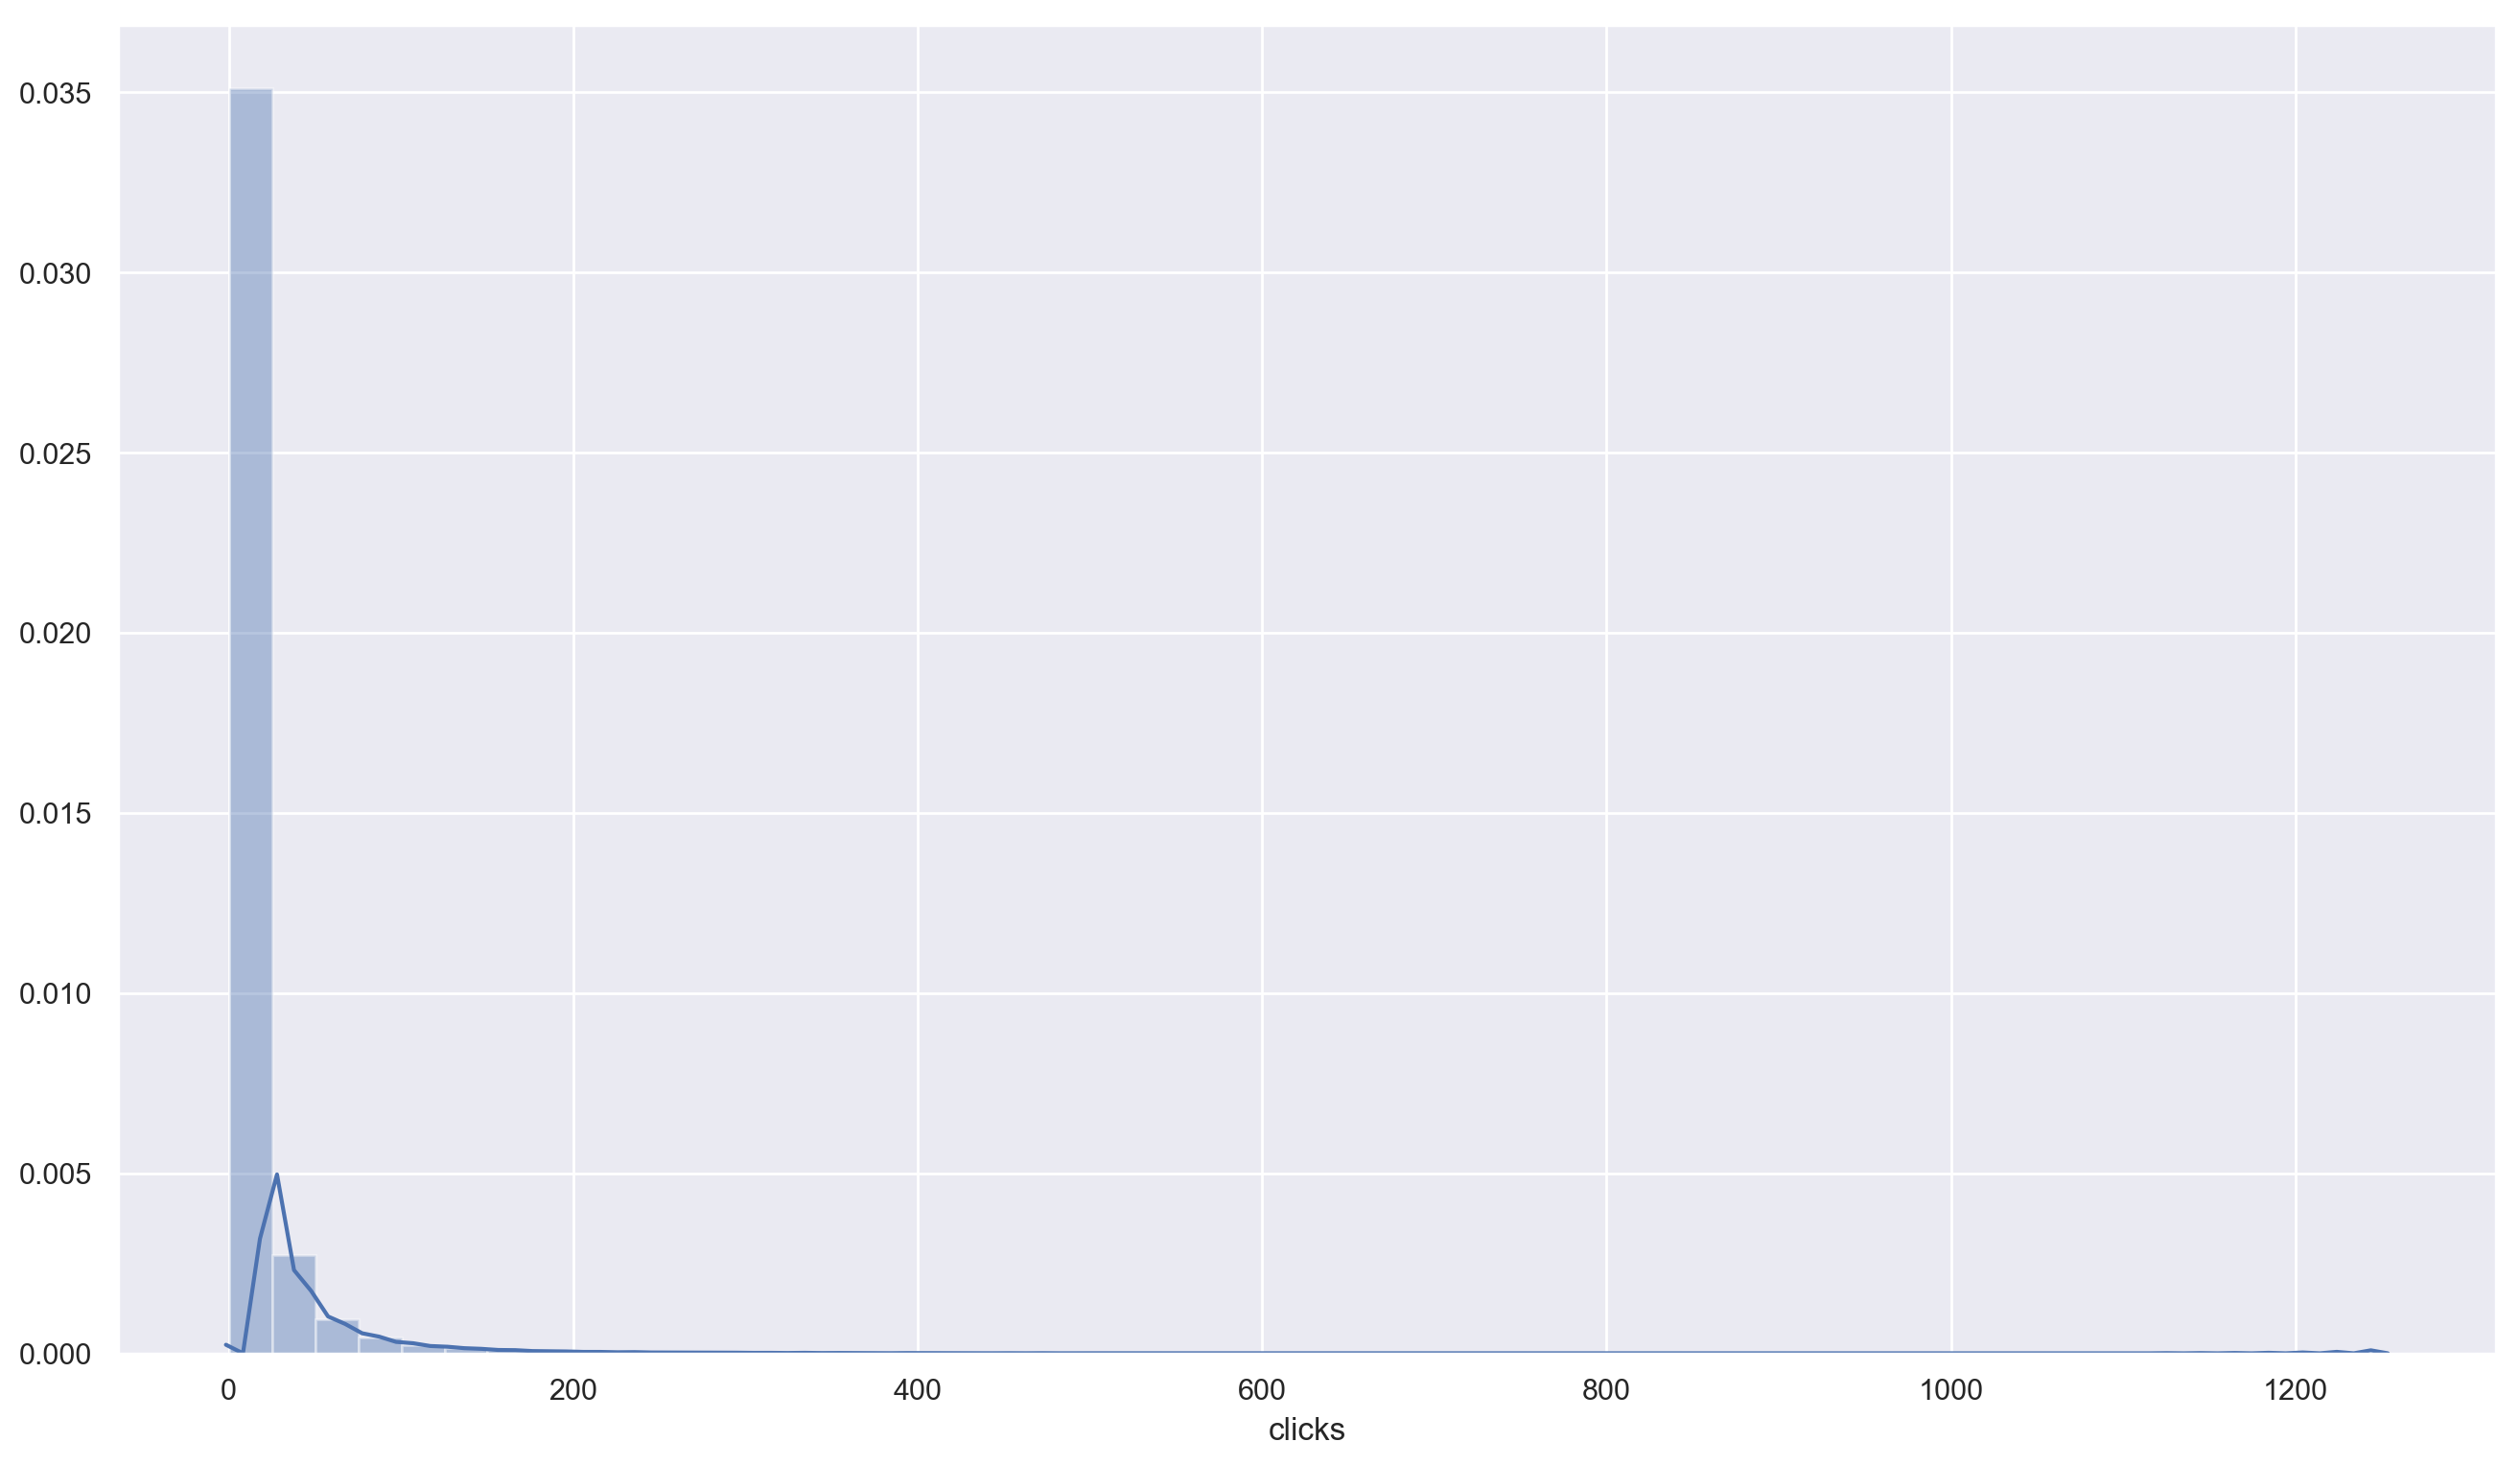

In [225]:
sns.distplot(df["clicks"])

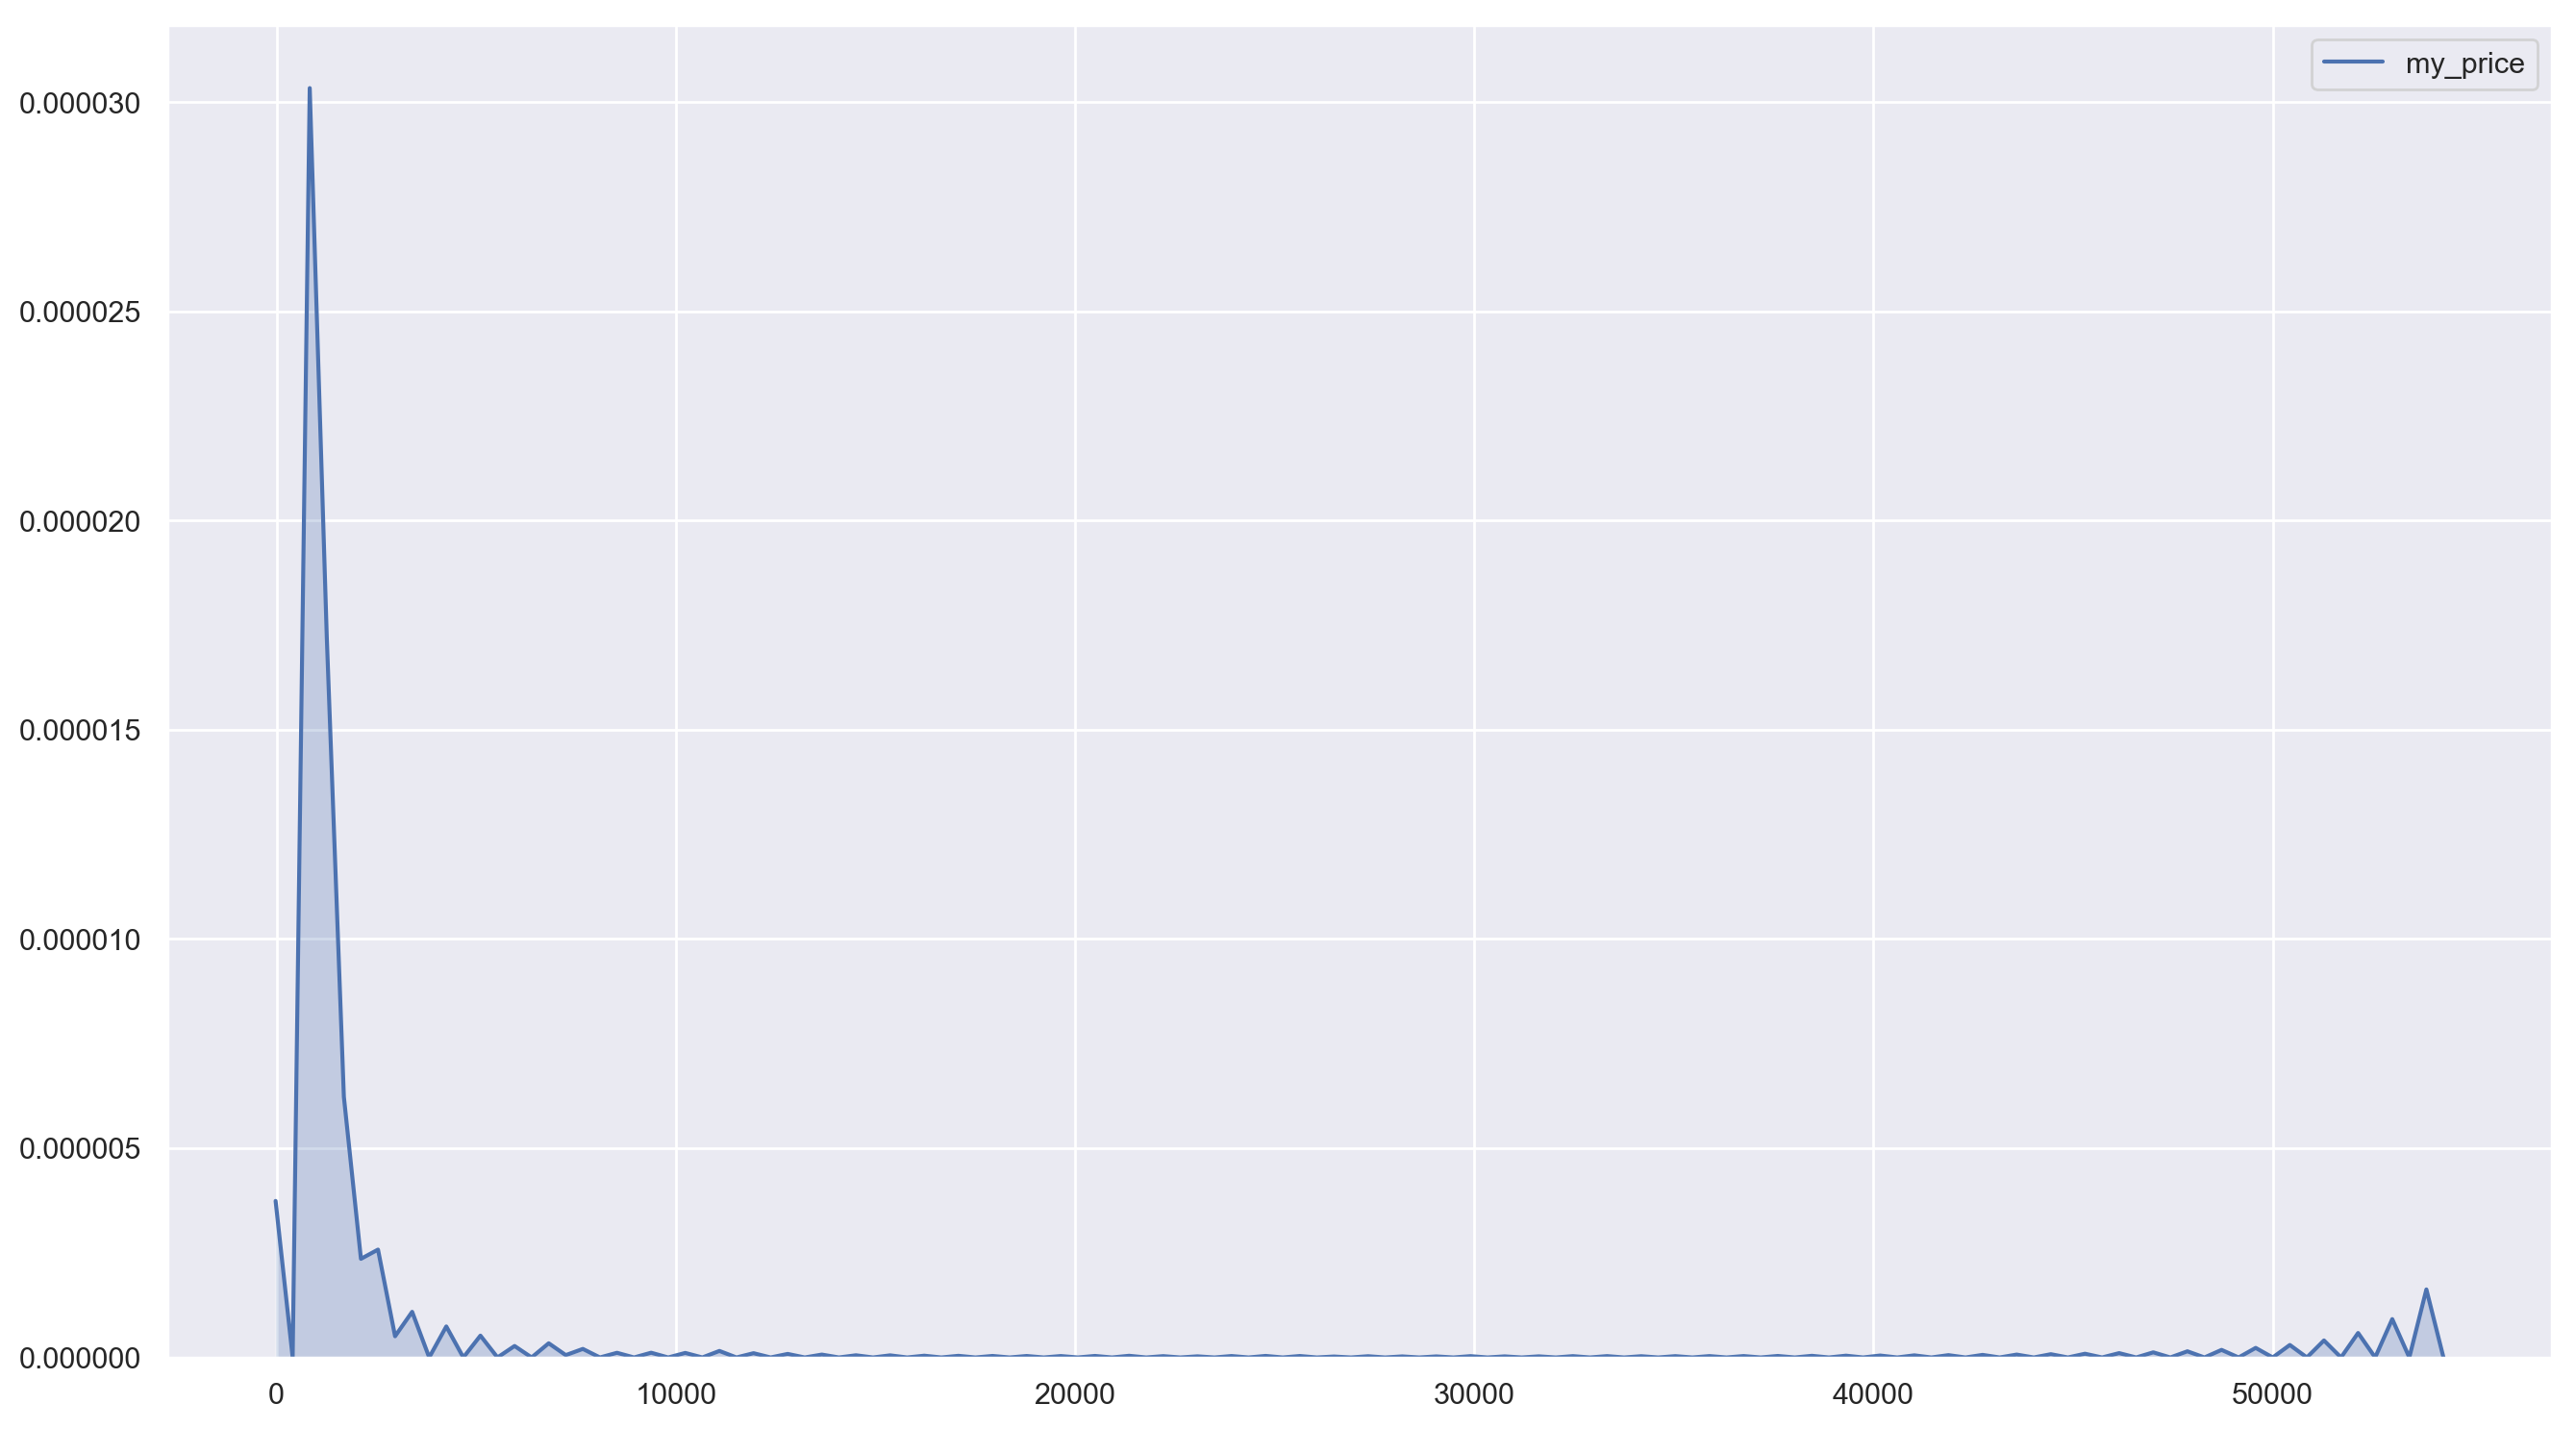

In [232]:
sns.kdeplot(df["my_price"],shade =True)

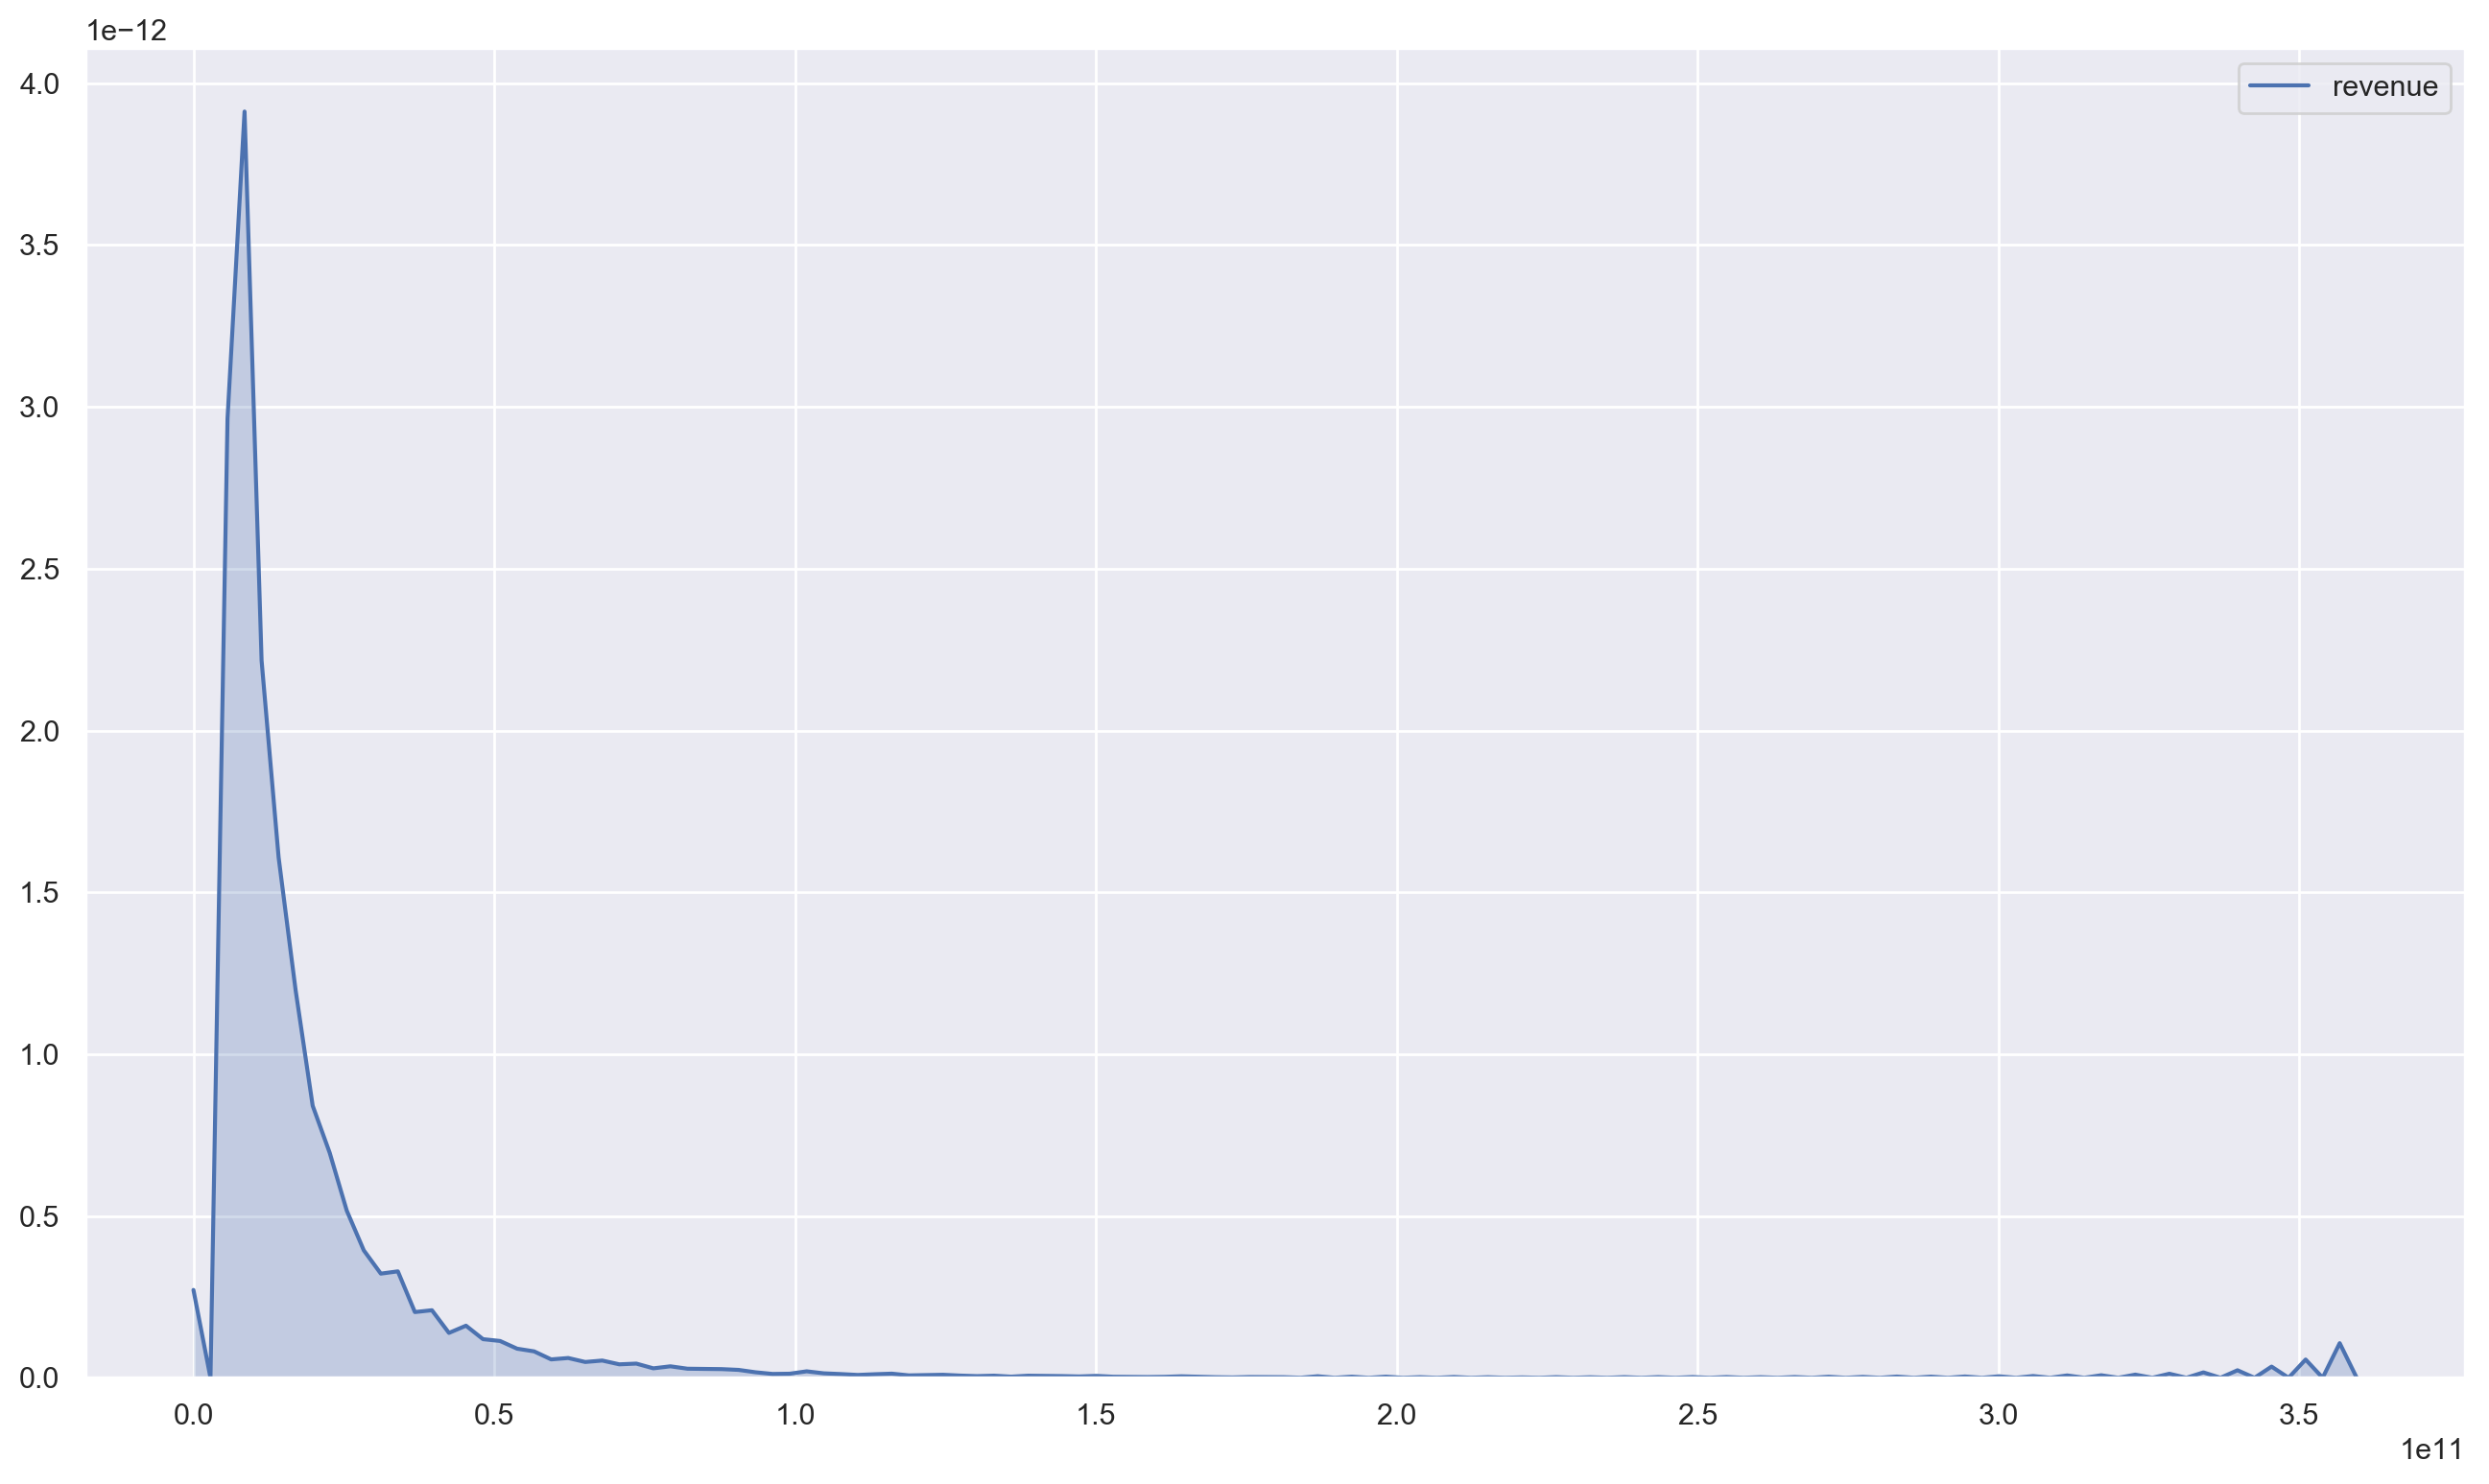

In [230]:
sns.kdeplot(df["revenue"],shade =True)

## Korelasyon Grafigi

In [48]:
## Heatmap ##

In [41]:
df2 = df.pivot_table(values='clicks', index=['weekday'],columns=['log_date'], aggfunc=np.sum,fill_value=0); df2

log_date   2018-05-02  2018-05-03  2018-05-04  2018-05-06  2018-05-07  \
weekday                                                                 
Friday              0           0       25495           0           0   
Monday              0           0           0           0       29546   
Saturday            0           0           0           0           0   
Sunday              0           0           0       28965           0   
Thursday            0       29573           0           0           0   
Tuesday             0           0           0           0           0   
Wednesday       31219           0           0           0           0   

log_date   2018-05-08  2018-05-09  2018-05-10  2018-05-11  2018-05-12  \
weekday                                                                 
Friday              0           0           0       23212           0   
Monday              0           0           0           0           0   
Saturday            0           0           0           0       16778   
Sunday              0           0           0           0           0   
Thursday            0           0       19398           0           0   
Tuesday         15821           0           0           0           0   
Wednesday           0       26299           0           0           0   

log_date      ...      2019-01-22  2019-01-23  2019-01-24  2019-01-25  \
weekday       ...                                                       
Friday        ...               0           0           0       31135   
Monday        ...               0           0           0           0   
Saturday      ...               0           0           0           0   
Sunday        ...               0           0           0           0   
Thursday      ...               0           0       37082           0   
Tuesday       ...           29177           0           0           0   
Wednesday     ...               0       31595           0           0   

log_date   2019-01-26  2019-01-27  2019-01-28  2019-01-29  2019-01-30  \
weekday                                                                 
Friday              0           0           0           0           0   
Monday              0           0       27773           0           0   
Saturday        28552           0           0           0           0   
Sunday              0       29108           0           0           0   
Thursday            0           0           0           0           0   
Tuesday             0           0           0       26830           0   
Wednesday           0           0           0           0       29296   

log_date   2019-01-31  
weekday                
Friday              0  
Monday              0  
Saturday            0  
Sunday              0  
Thursday        25414  
Tuesday             0  
Wednesday           0  

[7 rows x 268 columns]

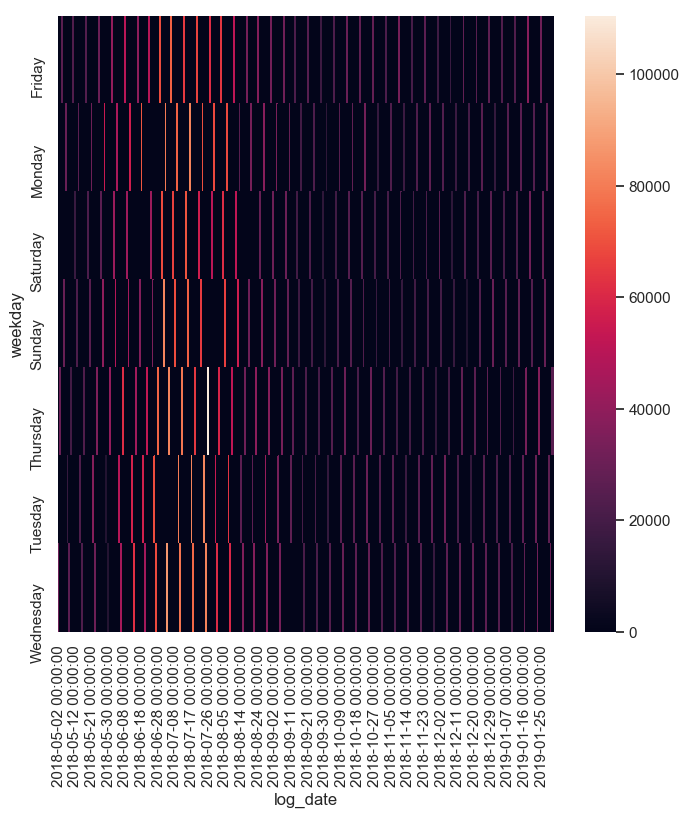

In [47]:
# Heatmap is used for letting out patterns in dataset. There is obvious clue that during the summer time clicks are increased.
sns.heatmap(df2)
sns.set(rc={"figure.figsize":(6,6)})

In [50]:
## Relation between variables : corr() ##

Text(0.5, 1.0, 'Heat map')

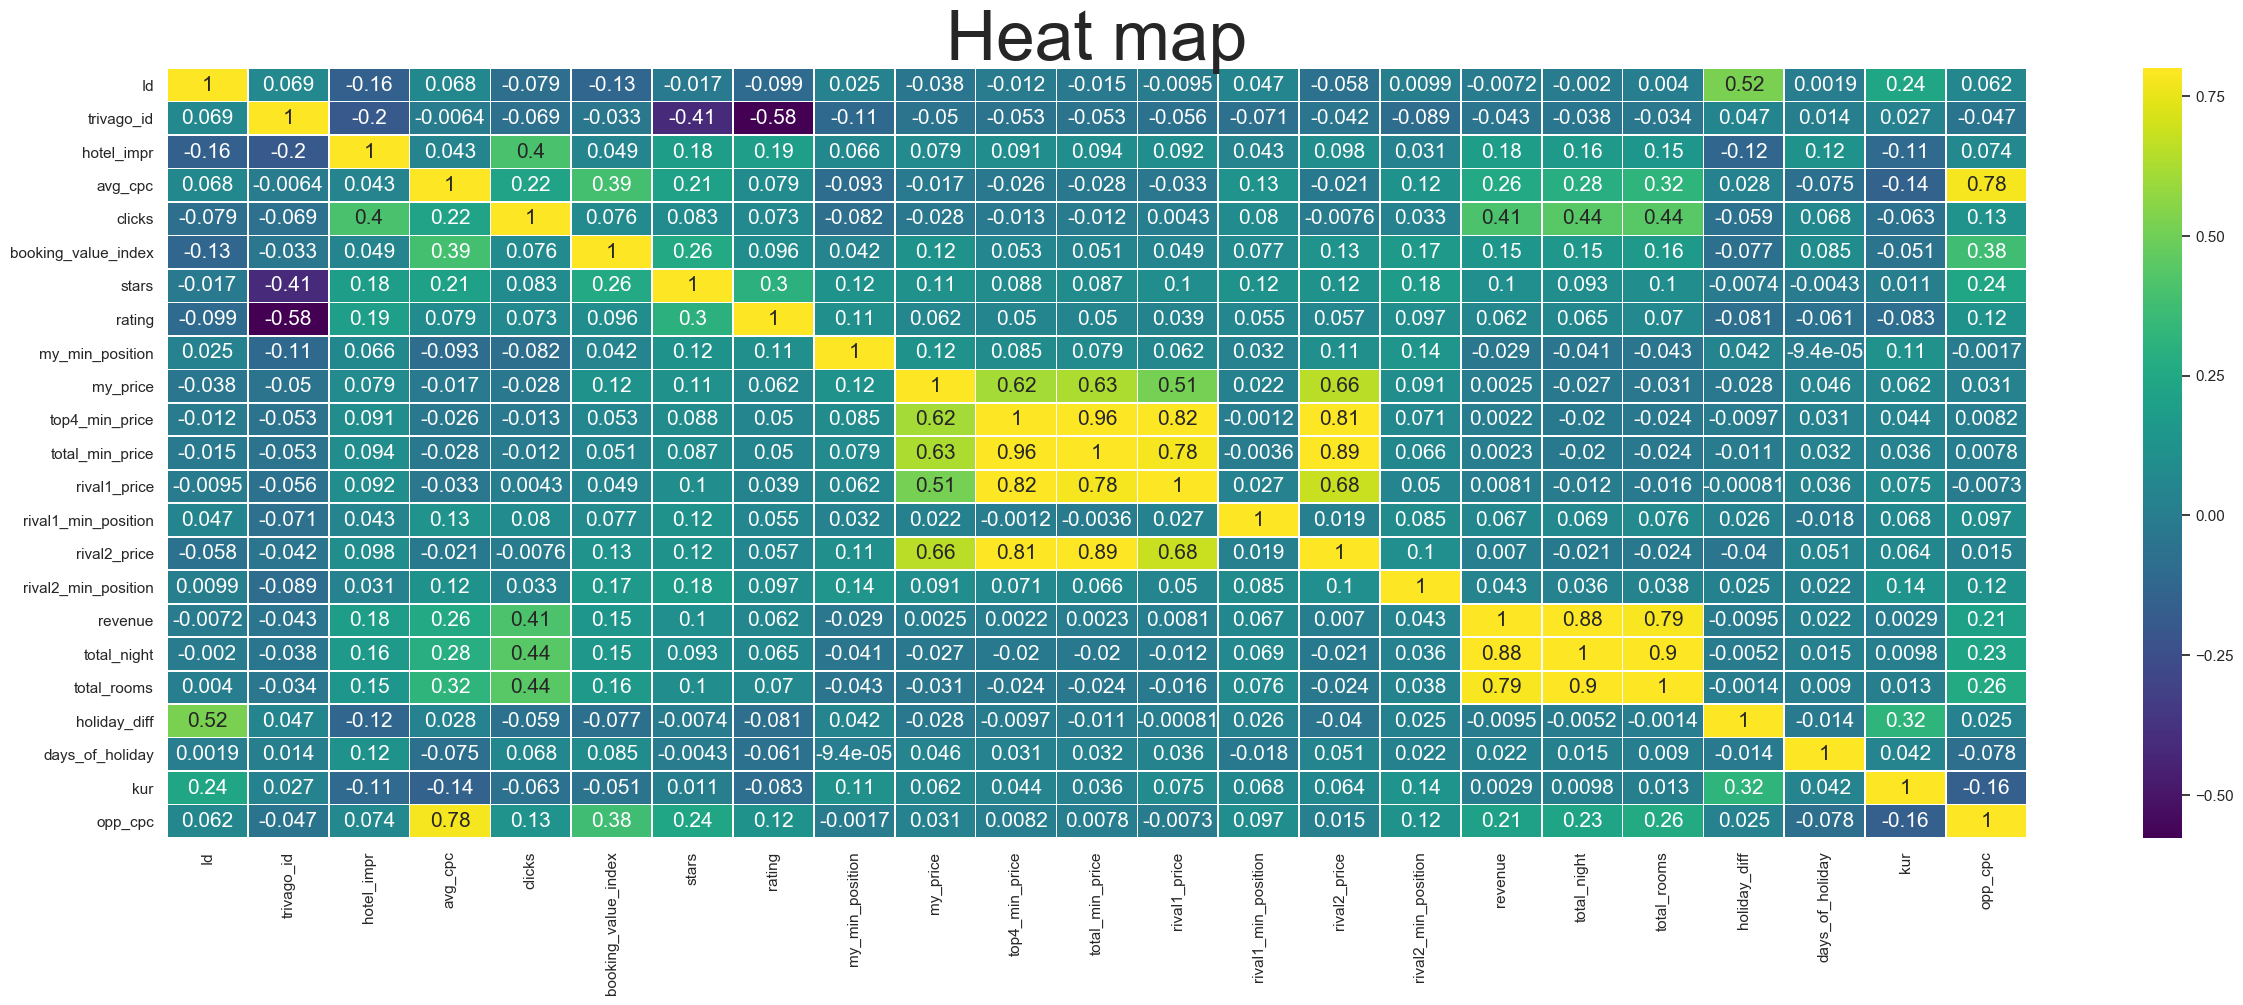

In [61]:
import matplotlib.pyplot as plt

corrmat = data.corr()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrmat, vmax=.8, square=False,annot=True, cmap="viridis", linewidths=0.5,annot_kws={'size':15})
plt.title("Heat map",fontsize=50)